In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# csv_file importation
application_train = pd.read_csv('application_train.csv', sep = ',')
bureau = pd.read_csv('bureau.csv', sep = ',')
bureau_balance = pd.read_csv('bureau_balance.csv', sep = ',')
credit_card_balance = pd.read_csv('credit_card_balance.csv', sep = ',')
installments_payments = pd.read_csv('installments_payments.csv', sep = ',')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv', sep = ',')
previous_application = pd.read_csv('previous_application.csv', sep = ',')
sample_submission = pd.read_csv('sample_submission.csv', sep = ',')
application_test = pd.read_csv('application_test.csv', sep = ',')

In [3]:
""" Max display on columns """

pd.set_option('display.max_columns', 122)
application_train.head(6)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied          Working   
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   
5             -477          NaN           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   
5                 1           1           0        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2    

# 1) Nan approach

Geting the percentage of Nans per column

Text(0.5, 1.0, 'Nans proportion per column')

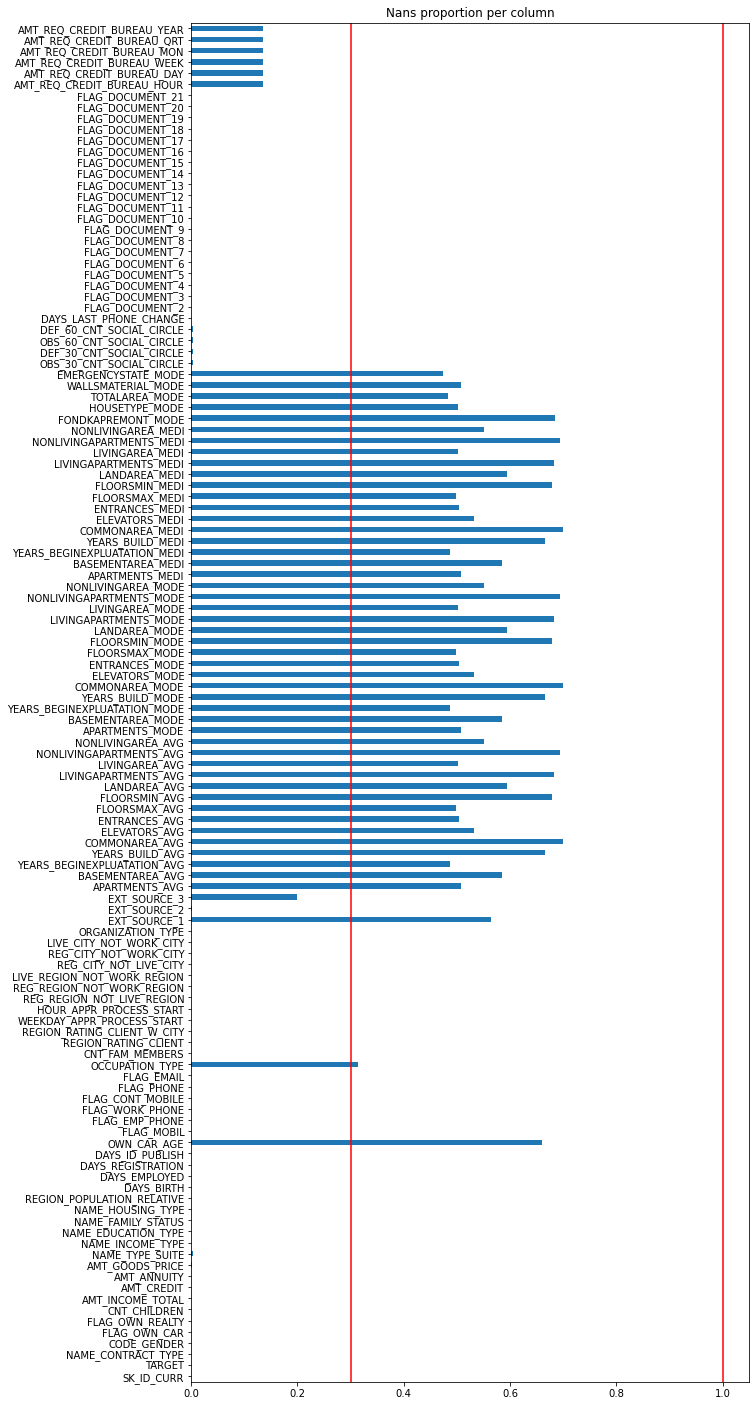

In [4]:
"""Plotting Nans proportion per column"""

plt.figure(figsize=(10, 25))
application_train.isnull().mean(axis=0).plot.barh()
plt.axvline(x=1, ymin=0, ymax=1,c = 'r')
plt.axvline(x=0.3, ymin=0, ymax=1,c = 'r')
plt.title("Nans proportion per column")

Here, we have lots of columns with an high values of Nans.
Because we want to make a model, we must have a little percentage by column, I mean less than 30% should be fine

In [5]:
''' Let's have a look at columns with more than 30% of Nans'''

data_lot_nan = application_train[application_train.columns[application_train.isnull().mean(axis=0)>=0.3]]

In [6]:
data_lot_nan.columns

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

all informations with suffix 'MODE' concerns habitation of the client... Floors, living area... I think it's not discriminating to classify someone for a defaut payment. Someone could live in a little surface in an only 2 floors' building and succeeding in all his credit payments. That's not discriminating.
Same thing for features ending with suffix 'AVG'..
Same Thing for cars age... Useless
Same thing for habitation type.. Useless

## Dropping columns with a too high percentage of Nans(30%)

Here we create 2 new DataFrames...
- reduced_X_train our training set
- reduced_X_test our testing set

dropping useless columns

In [7]:
reduced_X_train = application_train.drop(data_lot_nan, axis = 1)
reduced_X_test = application_test.drop(data_lot_nan, axis = 1)

In [8]:
# Check
reduced_X_train.shape

(307511, 72)

In [9]:
# Check
reduced_X_test.shape

(48744, 71)

# 2) Object columns

In [10]:
''' Object columns'''
s = (reduced_X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [11]:
reduced_X_train.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [12]:
reduced_X_train.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

Categorical features are not simple to use in order to make a model.
We should keep numerical features... For exemple, knowing that one person lives with his parents in a flat ,and that she owns a car, and she works as maid can't permit us to conclude... It seems to be speculative.

Nevertheless, knowing her incomes, her annuity amount and her credit amount seems to be more relevant ... 
We drop these categorical features.

In [13]:
reduced_X_train = reduced_X_train.drop(object_cols, axis=1)
reduced_X_test = reduced_X_test.drop(object_cols, axis=1)

In [14]:
# Check
reduced_X_train.shape

(307511, 61)

In [15]:
# Check
reduced_X_test.shape

(48744, 60)

In [16]:
""" Max display on columns """

pd.set_option('display.max_columns', 122)
reduced_X_train.head(6)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   
5      100008       0             0           99000.0    490495.5   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   
5      27517.5         454500.0                    0.035792      -16941   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0           -637            -3648.0            -2120           1   
1          -1188            -1186.0             -291           1   
2           -225            -4260.0            -2531           1   
3          -3039            -9833.0            -2437           1   
4          -3038            -4311.0            -3458           1   
5          -1588            -4970.0             -477           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   
5               1                1                 1           1           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   
5              2.0                     2                            2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCL

Here we've 60 features and that's too much to discriminate a defaut payment.
To understand features which could explain a defaut payment, we split our DataFrame:

- Consumers who had at least a late payment (target 1) during the loan
- Consumers without any late payment

In [17]:
X_train_1 = reduced_X_train[reduced_X_train['TARGET']==1]
X_train_0 = reduced_X_train[reduced_X_train['TARGET']==0]

In [18]:
# Number of consumers without late payment
X_train_0.shape[0]

282686

In [19]:
# Number of consumers with at least one late payment
X_train_1.shape[0]

24825

In [20]:
# Percentage of consumers with at least one late payment
X_train_1.shape[0] / (X_train_0.shape[0] + X_train_1.shape[0])*100

8.072881945686495

# 3) Statistics

In [21]:
X_train_1_desc = X_train_1.describe()
X_train_1_desc 

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   24825.000000  24825.0  24825.000000      2.482500e+04  2.482500e+04   
mean   277449.167936      1.0      0.463807      1.656118e+05  5.577785e+05   
std    102383.123458      0.0      0.756903      7.466770e+05  3.464332e+05   
min    100002.000000      1.0      0.000000      2.565000e+04  4.500000e+04   
25%    189555.000000      1.0      0.000000      1.125000e+05  2.844000e+05   
50%    276291.000000      1.0      0.000000      1.350000e+05  4.975200e+05   
75%    366050.000000      1.0      1.000000      2.025000e+05  7.333155e+05   
max    456254.000000      1.0     11.000000      1.170000e+08  4.027680e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   24825.000000     2.480400e+04                24825.000000   
mean    26481.744290     4.889724e+05                    0.019131   
std     12450.676999     3.116365e+05                    0.011905   
min      2722.500000     4.500000e+04                    0.000533   
25%     17361.000000     2.385000e+05                    0.009630   
50%     25263.000000     4.500000e+05                    0.018634   
75%     32976.000000     6.750000e+05                    0.025164   
max    149211.000000     3.600000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  24825.000000   24825.000000       24825.000000     24825.000000   
mean  -14884.828077   42394.675448       -4487.127009     -2732.099617   
std     4192.844583  119484.634253        3299.650241      1516.975313   
min   -25168.000000  -16069.000000      -22928.000000     -6207.000000   
25%   -18037.000000   -2156.000000       -6646.000000     -4119.000000   
50%   -14282.000000   -1034.000000       -4056.000000     -2797.000000   
75%   -11396.000000    -379.000000       -1671.000000     -1392.000000   
max    -7678.000000  365243.000000           0.000000         0.000000   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count     24825.0    24825.000000     24825.000000      24825.000000   
mean          1.0        0.879517         0.237825          0.998187   
std           0.0        0.325532         0.425760          0.042538   
min           1.0        0.000000         0.000000          0.000000   
25%           1.0        1.000000         0.000000          1.000000   
50%           1.0        1.000000         0.000000          1.000000   
75%           1.0        1.000000         0.000000          1.000000   
max           1.0        1.000000         1.000000          1.000000   

         FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  24825.000000  24825.000000     24825.000000          24825.000000   
mean       0.244955      0.055347         2.181269              2.153635   
std        0.430069      0.228662         0.951327              0.505052   
min        0.000000      0.000000         1.000000              1.000000   
25%        0.000000      0.000000         2.000000              2.000000   
50%        0.000000      0.000000         2.000000              2.000000   
75%        0.000000      0.000000         3.000000              2.000000   
max        1.000000      1.000000        13.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                 24825.000000             24825.000000   
mean                      2.134824                11.797100   
std                       0.499909                 3.284299   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000                12.000000   
75%                       2.000000                14.000000   
max                       3.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                24825.000000         

In [22]:
X_train_0_desc = X_train_0.describe()
X_train_0_desc 

SK_ID_CURR    TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  282686.000000  282686.0  282686.000000      2.826860e+05  2.826860e+05   
mean   278244.744536       0.0       0.412946      1.690777e+05  6.026483e+05   
std    102825.776954       0.0       0.718843      1.104763e+05  4.068459e+05   
min    100003.000000       0.0       0.000000      2.565000e+04  4.500000e+04   
25%    189103.250000       0.0       0.000000      1.125000e+05  2.700000e+05   
50%    278362.500000       0.0       0.000000      1.485000e+05  5.177880e+05   
75%    367241.500000       0.0       1.000000      2.025000e+05  8.100000e+05   
max    456255.000000       0.0      19.000000      1.800009e+07  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  282674.000000     2.824290e+05               282686.000000   
mean    27163.623349     5.427368e+05                    0.021021   
std     14658.307178     3.737855e+05                    0.013978   
min      1615.500000     4.050000e+04                    0.000290   
25%     16456.500000     2.385000e+05                    0.010006   
50%     24876.000000     4.500000e+05                    0.018850   
75%     34749.000000     6.885000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  282686.000000  282686.000000      282686.000000    282686.000000   
mean   -16138.176397   65696.146123       -5029.941065     -3017.219788   
std      4364.200856  142877.810161        3538.464478      1506.614090   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19793.750000   -2813.000000       -7550.000000     -4313.000000   
50%    -15877.000000   -1235.000000       -4544.000000     -3295.000000   
75%    -12536.000000    -278.000000       -2045.000000     -1755.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

          FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  282686.000000   282686.000000    282686.000000     282686.000000   
mean        0.999996        0.814653         0.195991          0.998129   
std         0.001881        0.388579         0.396963          0.043219   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        1.000000         0.000000          1.000000   
50%         1.000000        1.000000         0.000000          1.000000   
75%         1.000000        1.000000         0.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  282686.000000  282686.000000    282684.000000         282686.000000   
mean        0.284238       0.056840         2.150154              2.043578   
std         0.451051       0.231538         0.906984              0.508422   
min         0.000000       0.000000         1.000000              1.000000   
25%         0.000000       0.000000         2.000000              2.000000   
50%         0.000000       0.000000         2.000000              2.000000   
75%         1.000000       0.000000         3.000000              2.000000   
max         1.000000       1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                282686.000000            282686.000000   
mean                      2.022449                12.086807   
std                       0.501971                 3.263173   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000                12.000000   
75%                       2.000000                14.000000   
max                       3.000000                23.000000   

       REG_REGION_NOT_LIVE_REGION  

Here, to have a better look at features which can discriminate both consumers categories, it could be better to visualize with histogram distribution of both categories (0 and 1) in function of all features.
Let's start with an exemple here.
It probably makes no sense to considerate that total amount could discriminate both categories

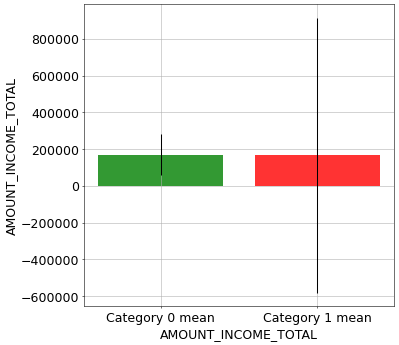

In [23]:
fig = plt.figure(figsize=(8, 8), dpi = 50)
plt.rcParams["font.size"] = 18
plt.grid(True)

plt.xlabel("AMOUNT_INCOME_TOTAL")
plt.ylabel("AMOUNT_INCOME_TOTAL")

# Histograms of total income for all consumers
# Plotting histograms of the 2 categories (0 and 1)
# We plot according to the mean and we make appear stud
plt.bar(['Category 0 mean', 'Category 1 mean'] ,[X_train_0_desc['AMT_INCOME_TOTAL']['mean'],X_train_1_desc['AMT_INCOME_TOTAL']['mean']], 
        yerr = [X_train_0_desc['AMT_INCOME_TOTAL']['std'],X_train_1_desc['AMT_INCOME_TOTAL']['std']], color = ['green', 'red'], alpha = 0.8)
plt.title('')
plt.show()


As we can see, defaut payment is not a question of total income, but maybe more a question of annuity divided per credit amount for exemple.. Or many others reasons.
So at this point, before creating new features more relevant, we visualize all features distributions with the same method.

## Features distributions visualizing

Here, we just create 2 functions to visualize.
We need, as above, our 2 DataFrames (0 and 1) and our 2 statistics Frames (0 and 1)

In [24]:
def plot_hist_mean(X_train_0,X_train_1,X_train_0_desc,X_train_1_desc):
    
    for column in X_train_0.columns:
        plot_hist_mean_every_column(X_train_0,X_train_1,X_train_0_desc,X_train_1_desc,column)

In [25]:
def plot_hist_mean_every_column(X_train_0,X_train_1,X_train_0_desc,X_train_1_desc,column):

    # 2 columns for figure
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(25,5),facecolor='w')
    
    plt.rcParams["font.size"] = 18

    #fig = plt.figure(figsize=(15, 10), dpi=50)
    axL.set_yscale('log')  # a logarithmic scale is appropriate
    axL.set_xlabel(column, fontsize=18)
    axL.set_ylabel('count',fontsize=18)

    axL.grid(True)
    axL.hist(X_train_0[column],alpha=0.5, color='green',bins=50, density=True)
    axL.hist(X_train_1[column],alpha=0.5, color='red',bins=50, density=True)
    
    # Grid
    axR.grid(True)

    axR.set_ylabel("AMT_INCOME_TOTAL")

    # Plotting means and stud with yerr
    x0 = 'Category 0 mean'
    x1 = 'Category 1 mean'

    axR.bar([x0, x1] ,[X_train_0_desc[column]['mean'],X_train_1_desc[column]['mean']], 
            yerr = [X_train_0_desc[column]['std'],X_train_1_desc[column]['std']], color = ['blue', 'red'], alpha = 0.9)
    fig.show()

<ipython-input-25-f4357207a7c0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-25-f4357207a7c0>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (axL, axR) = plt.subplots(ncols=2, figsize=(25,5),facecolor='w')


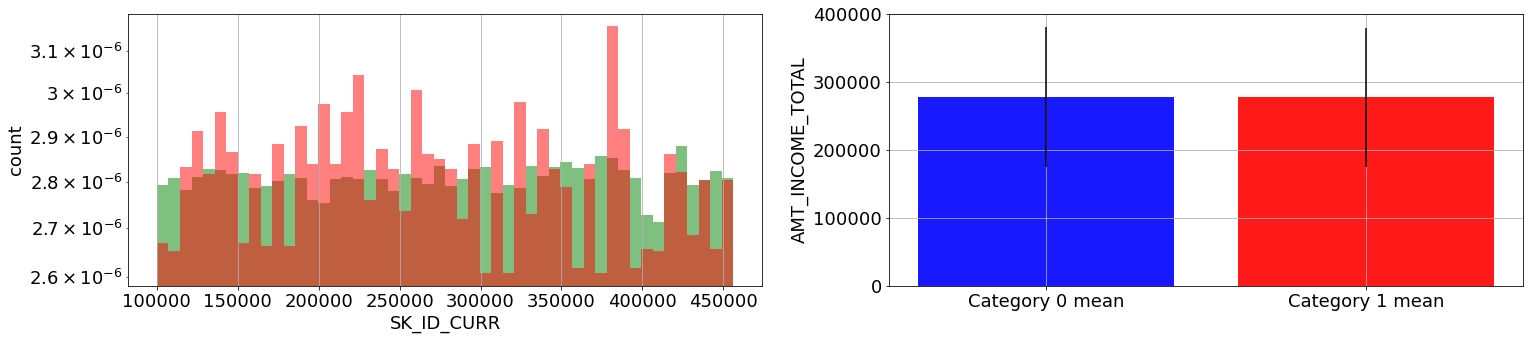

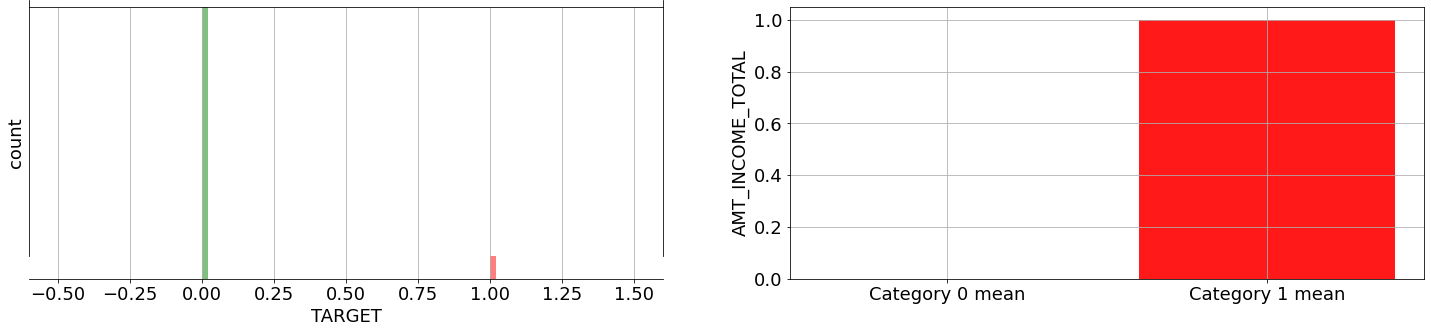

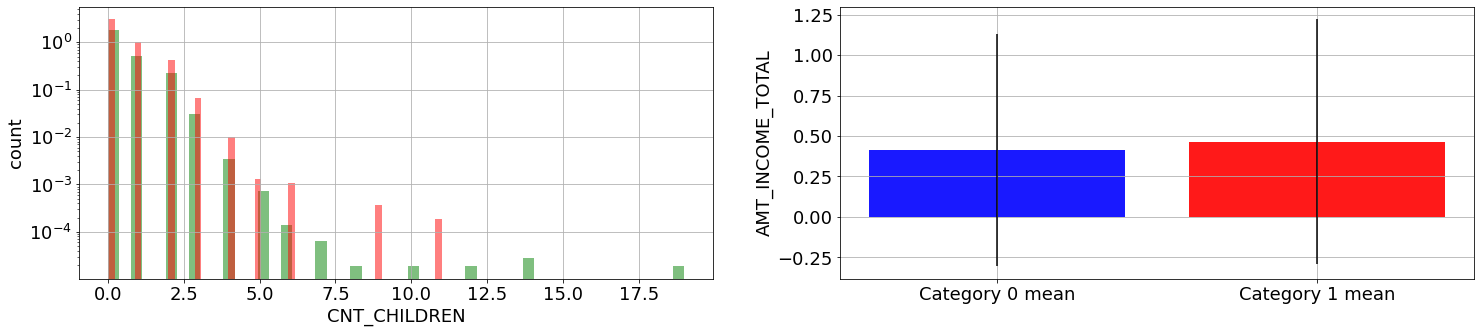

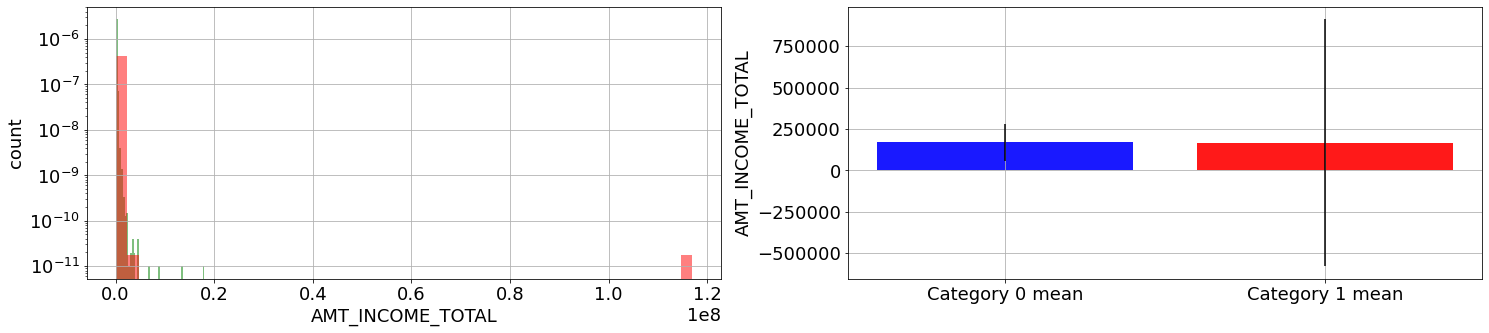

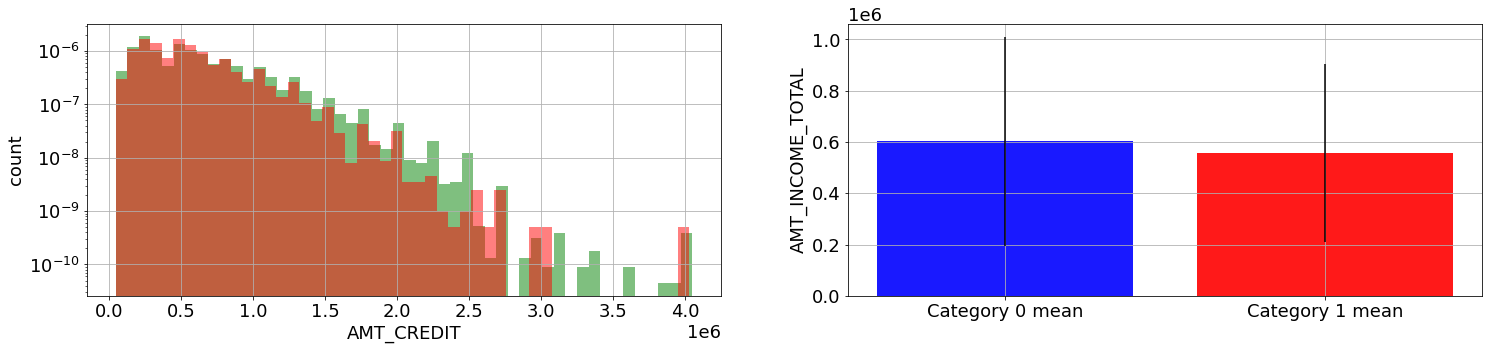

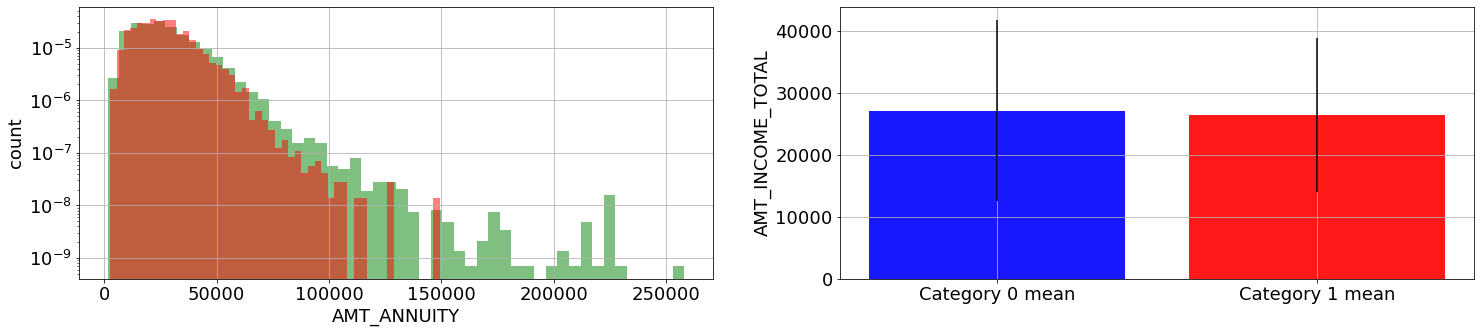

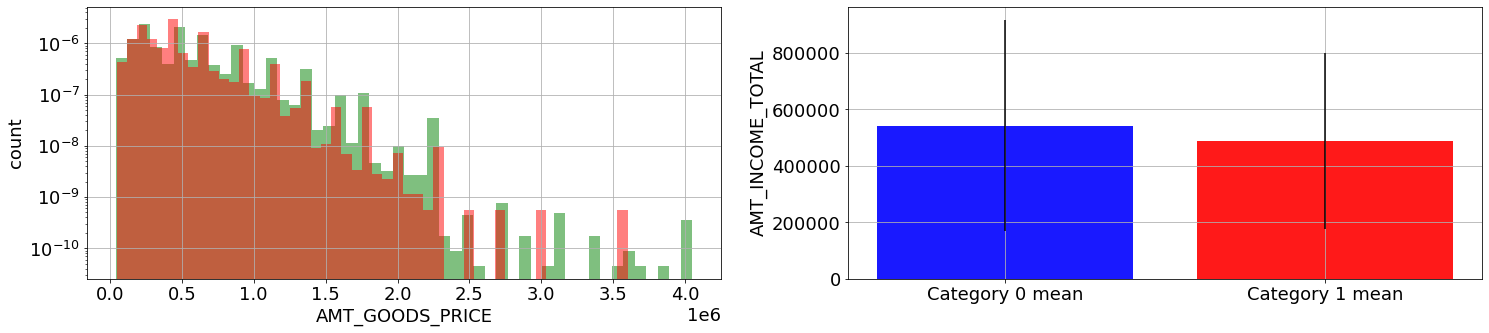

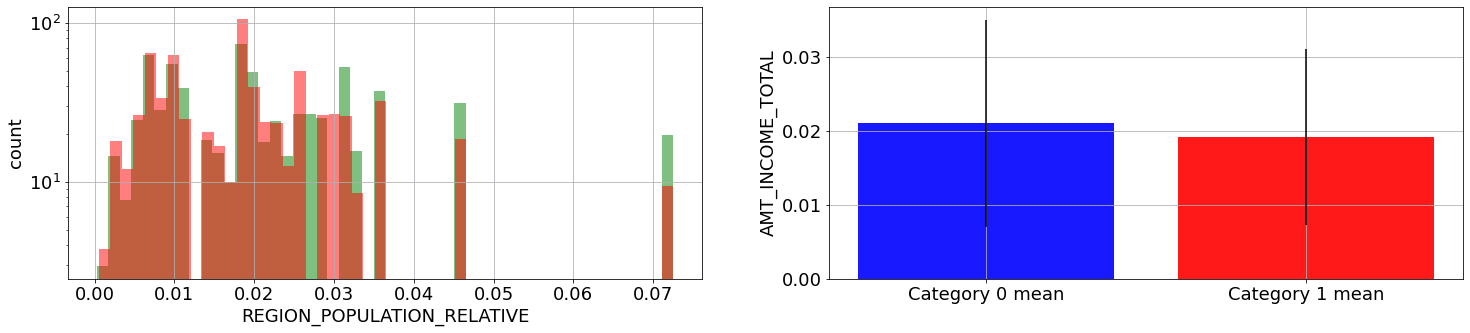

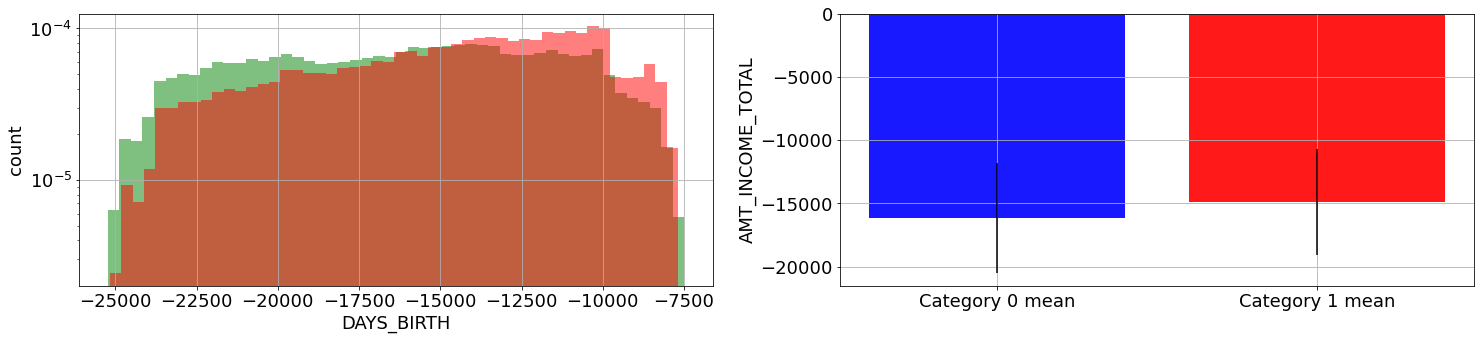

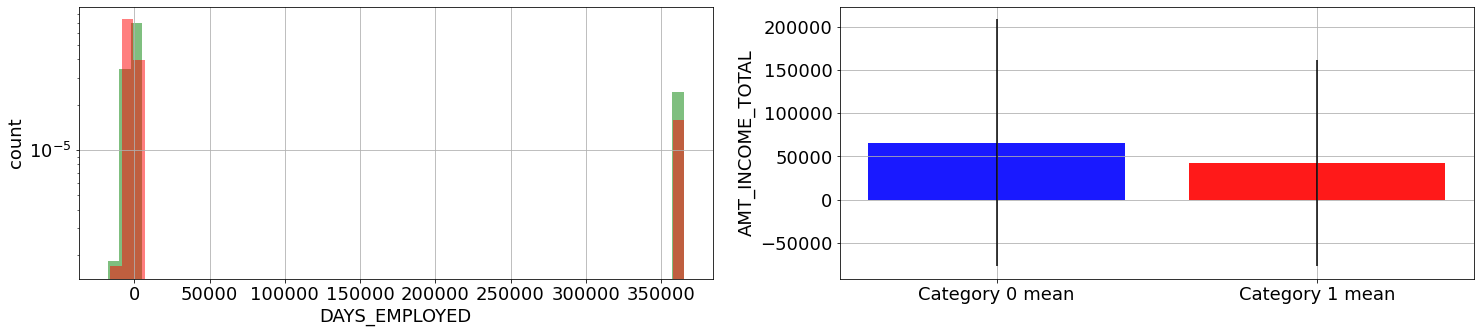

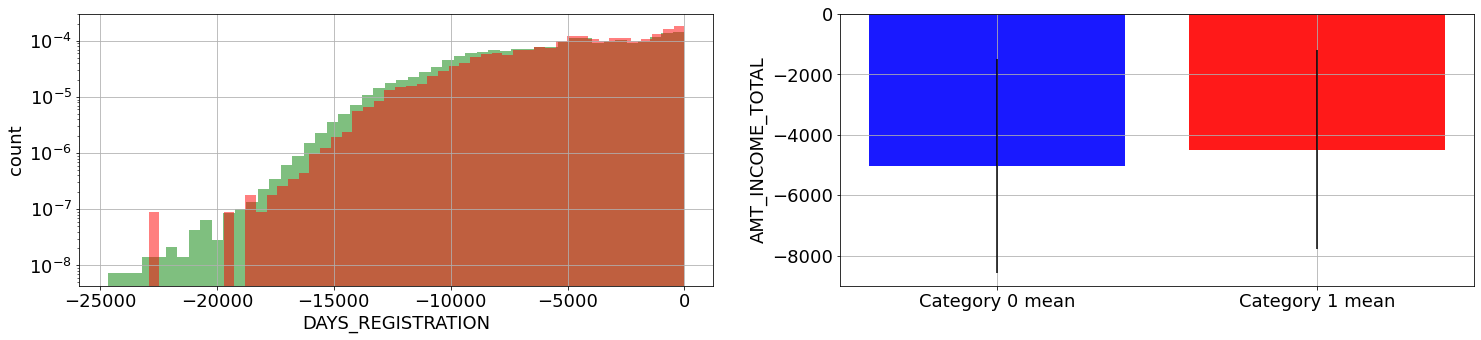

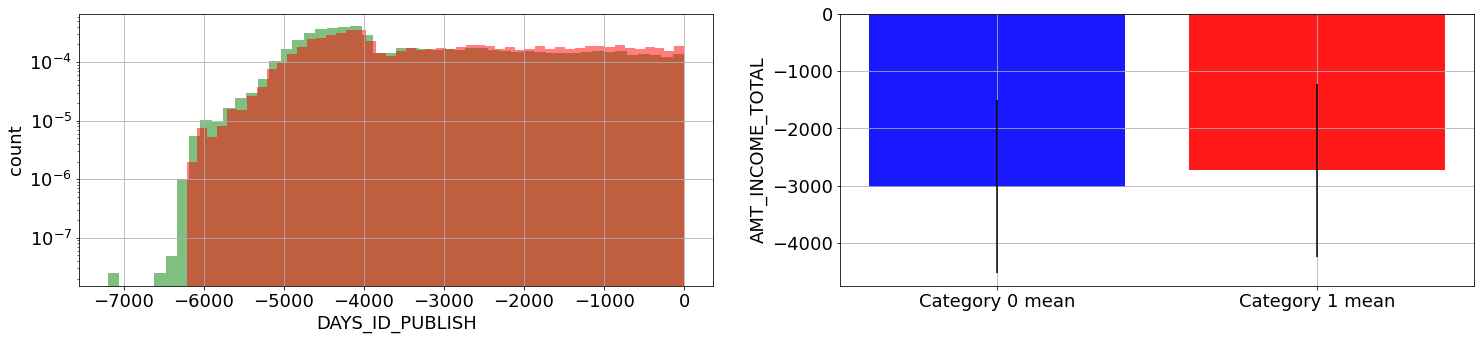

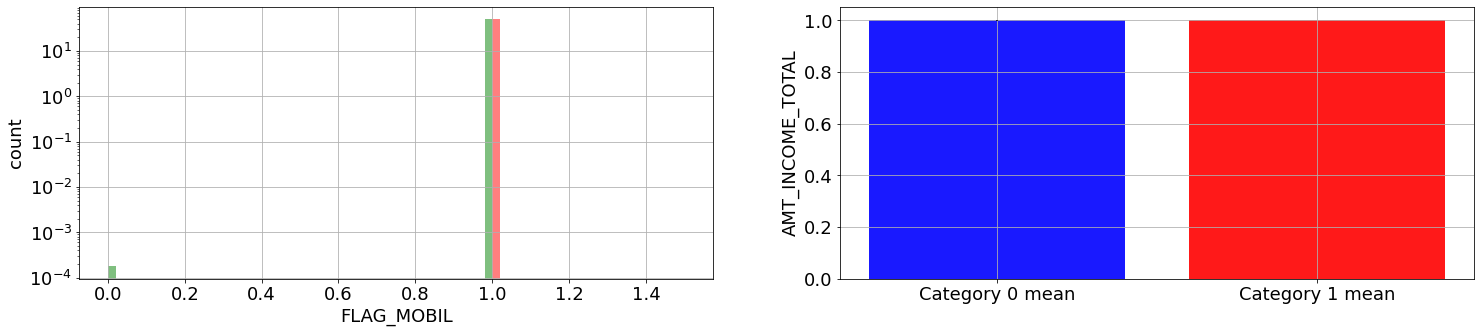

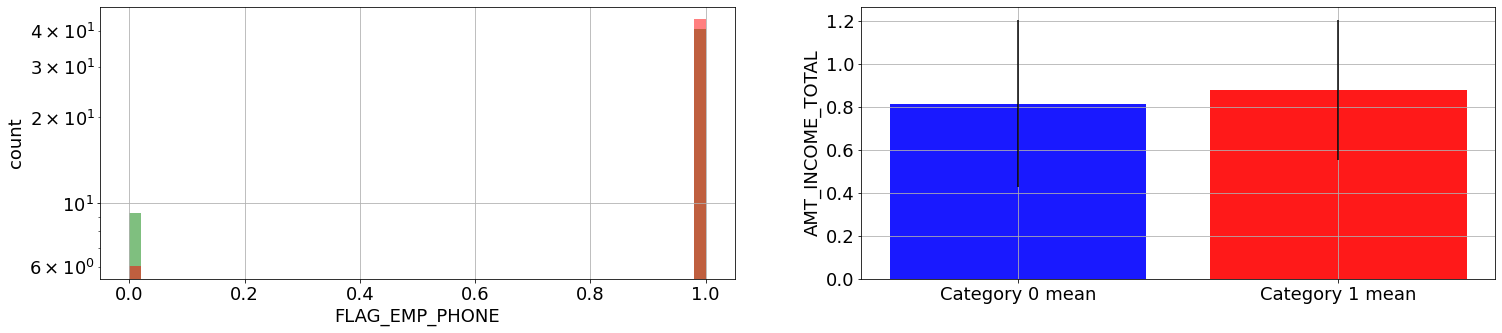

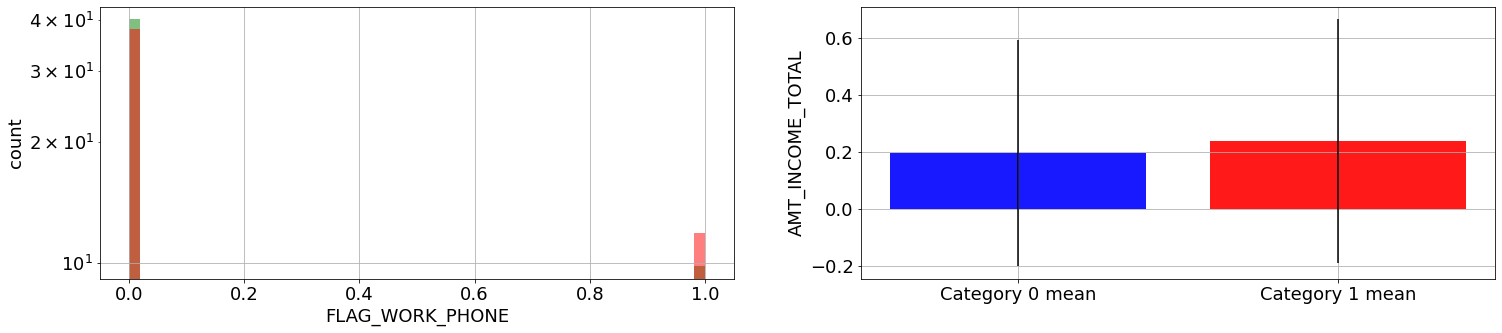

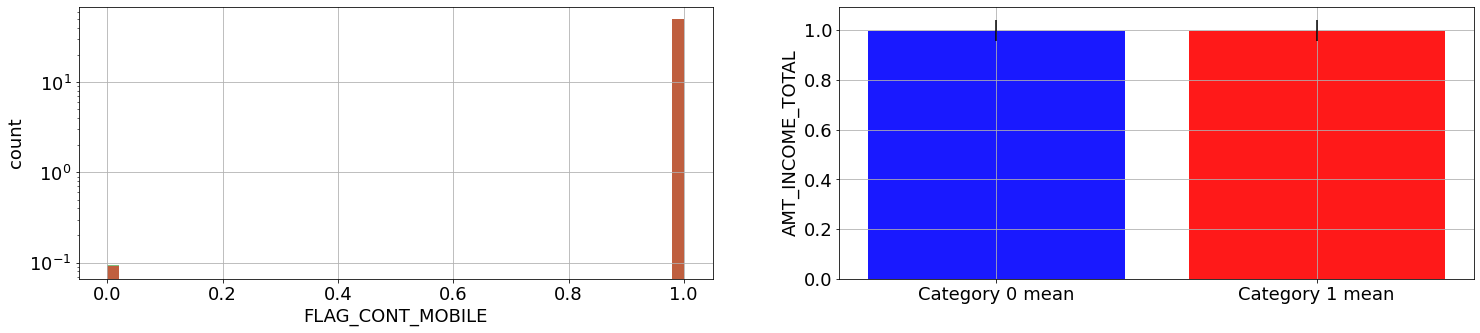

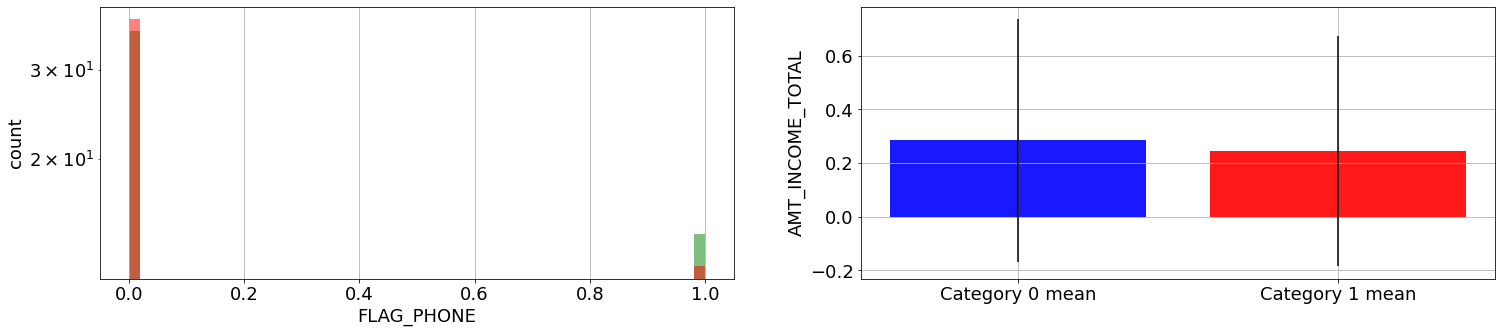

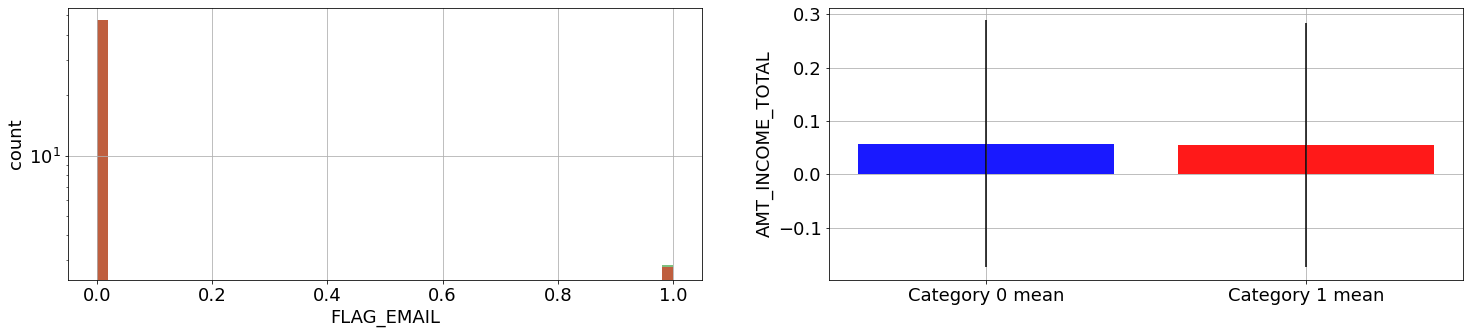

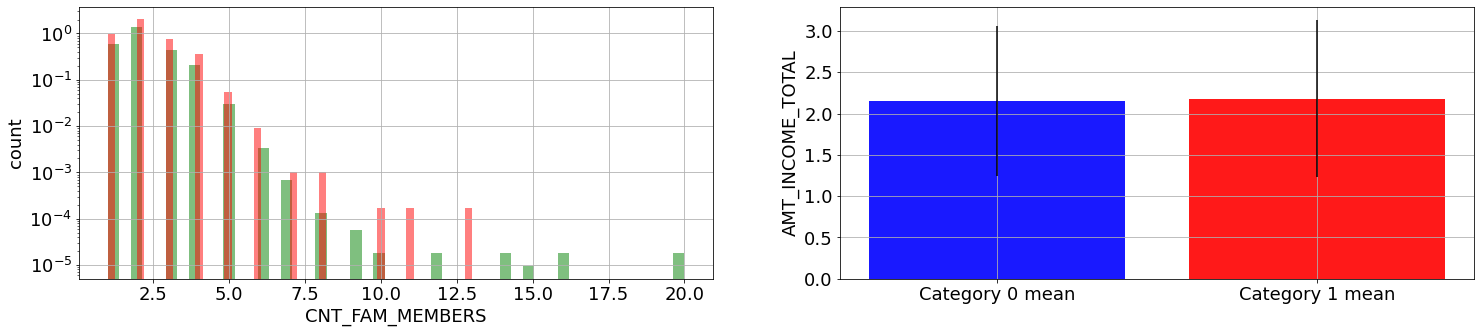

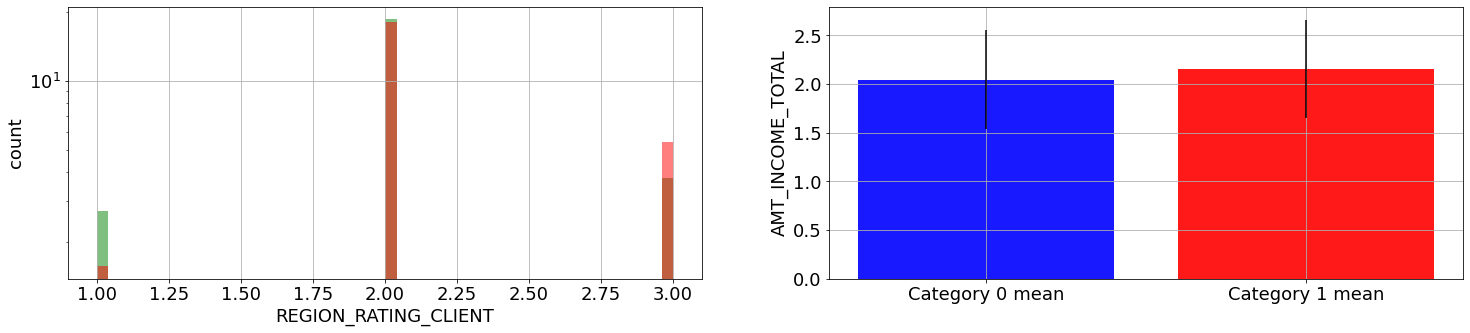

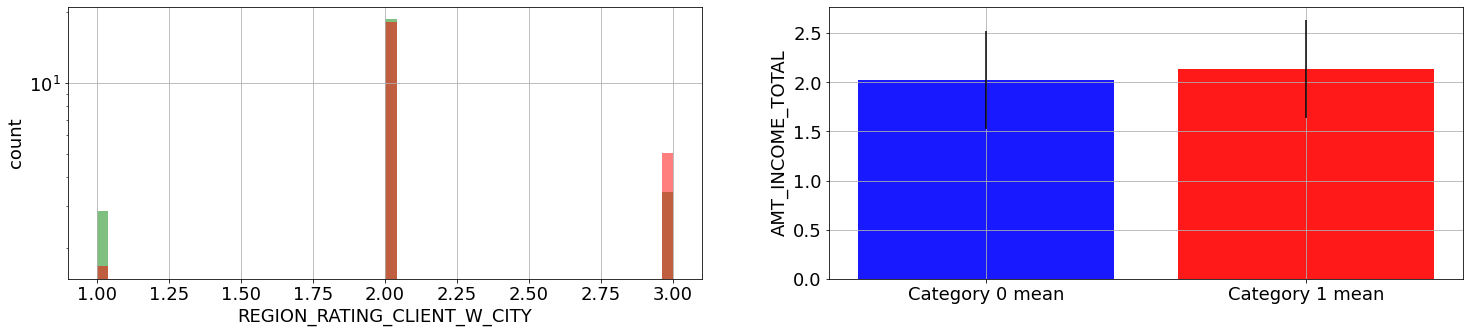

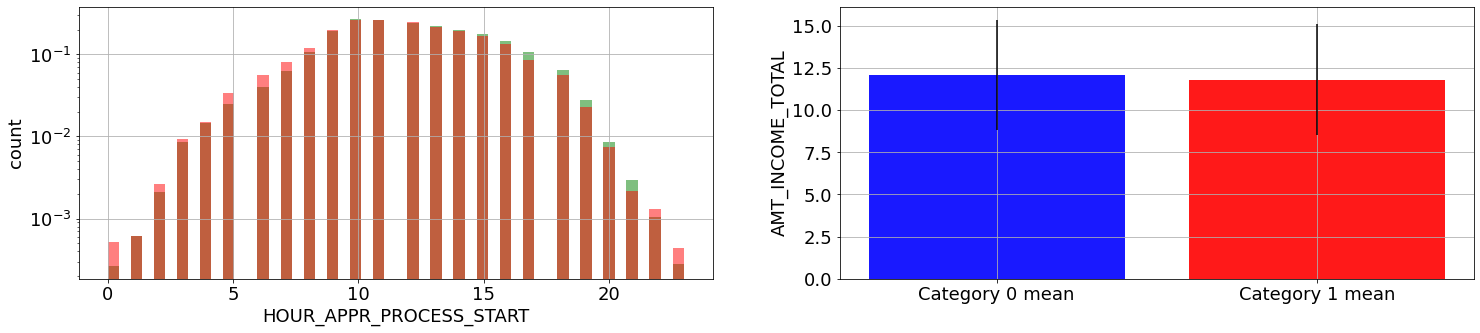

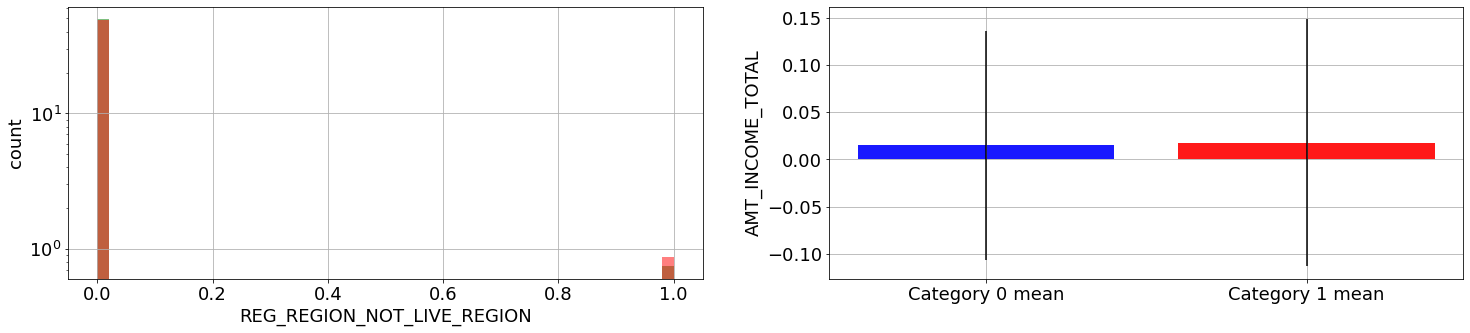

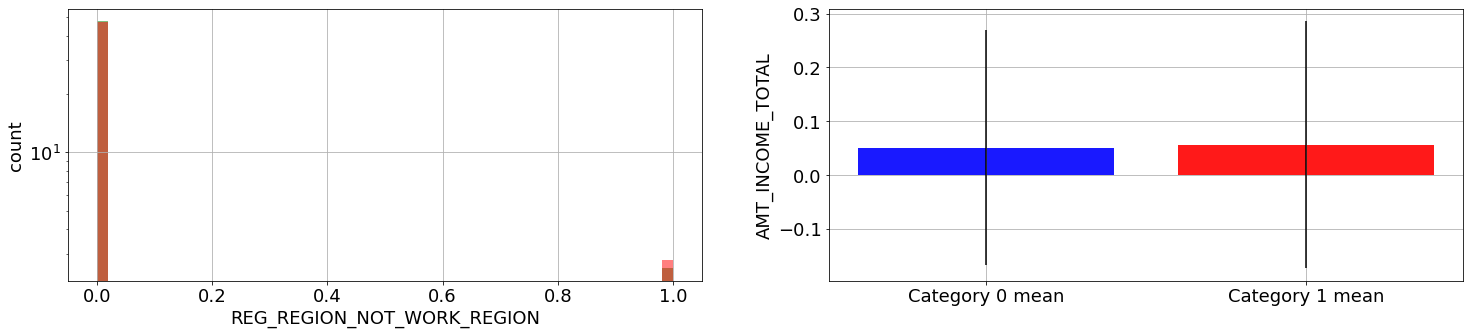

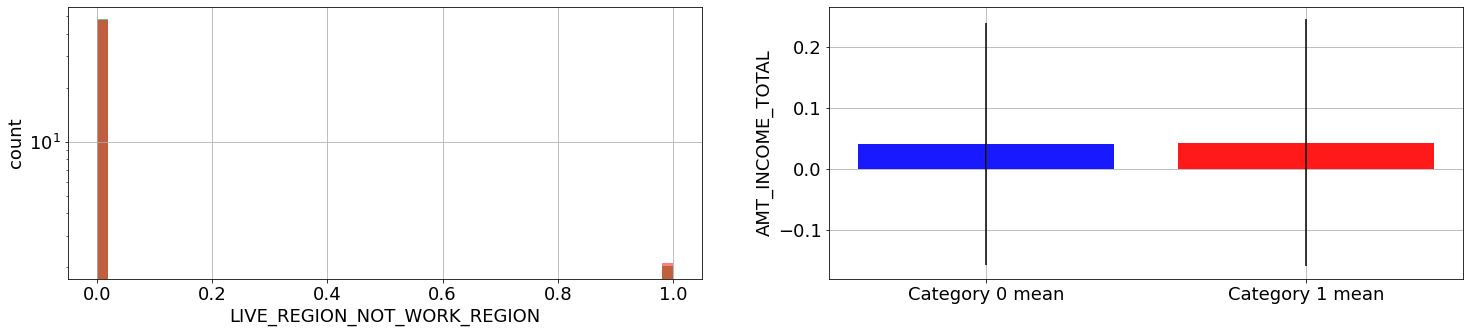

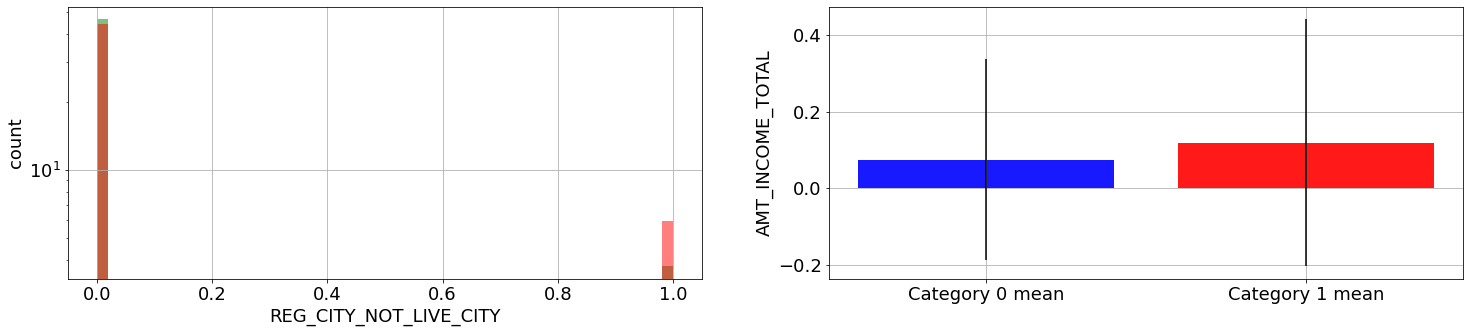

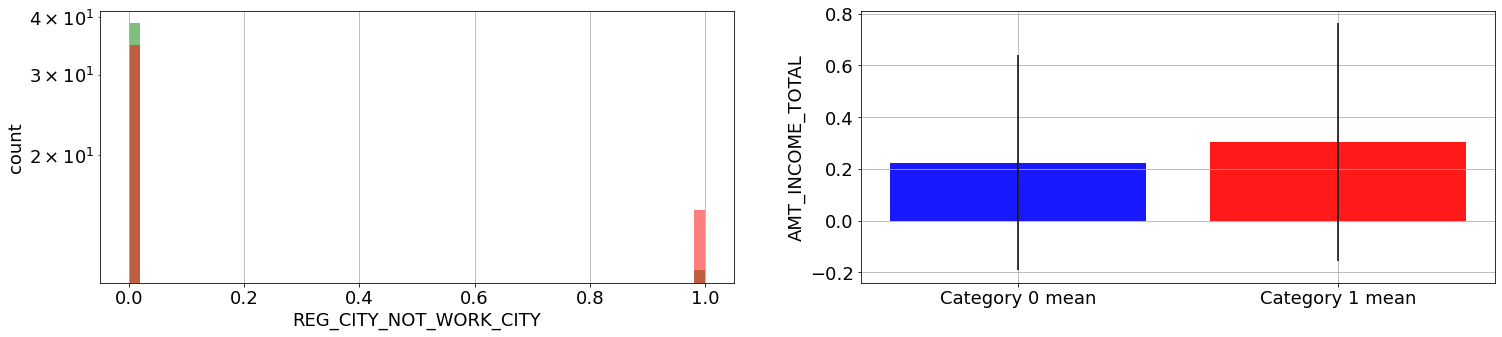

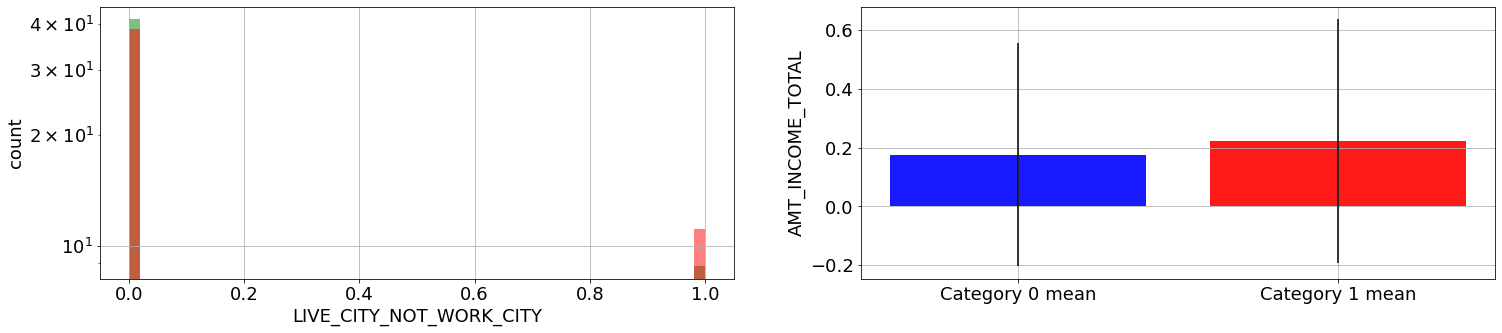

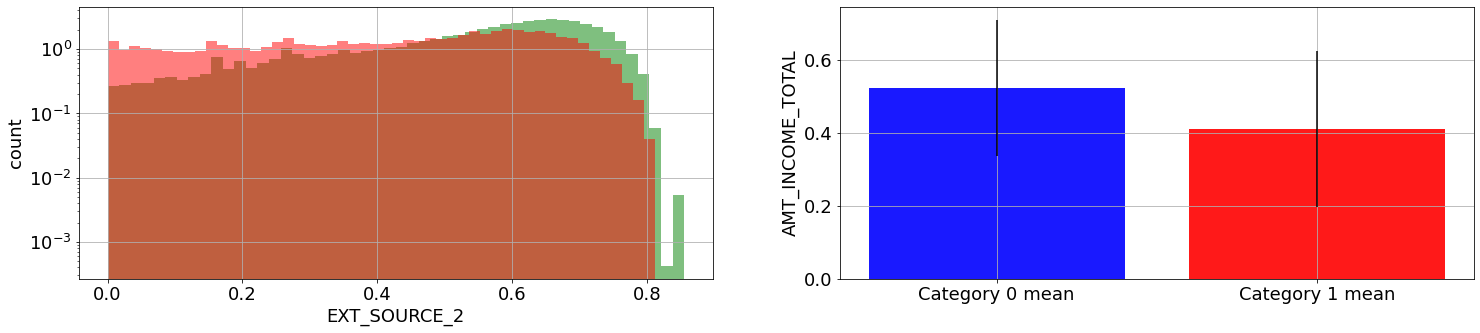

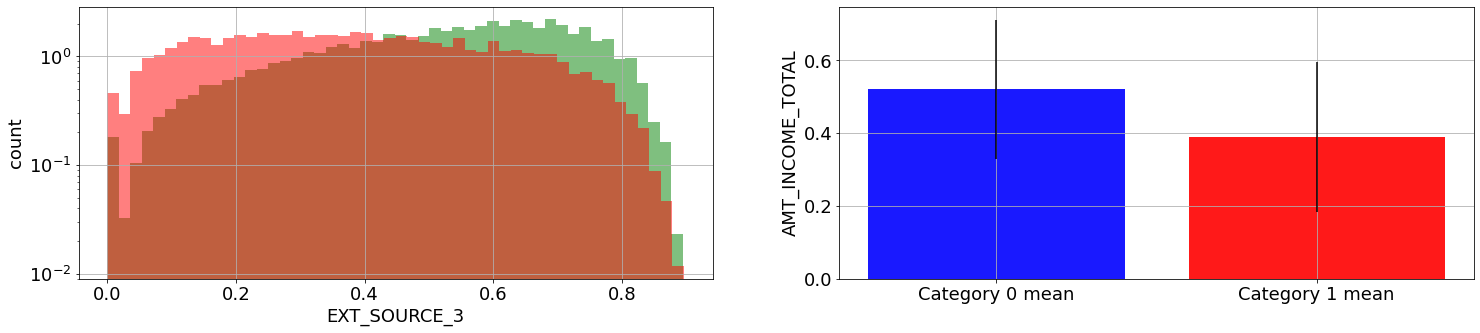

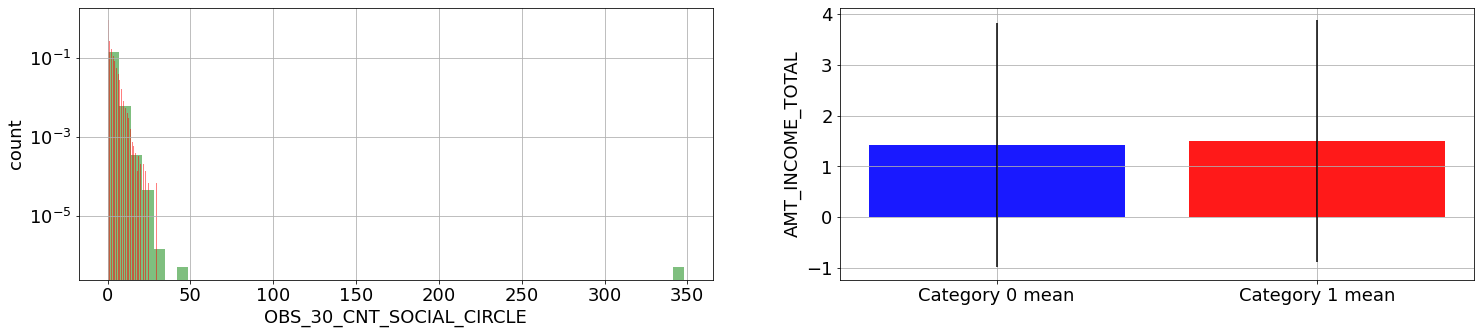

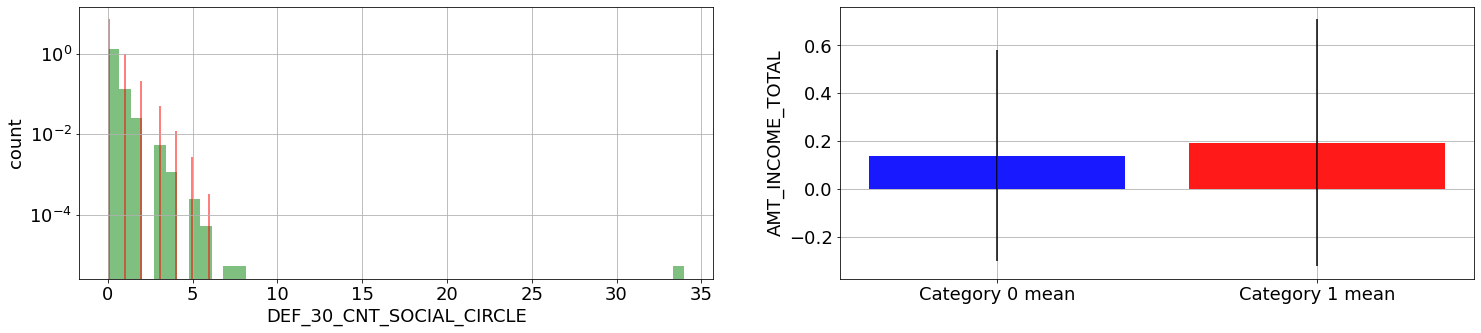

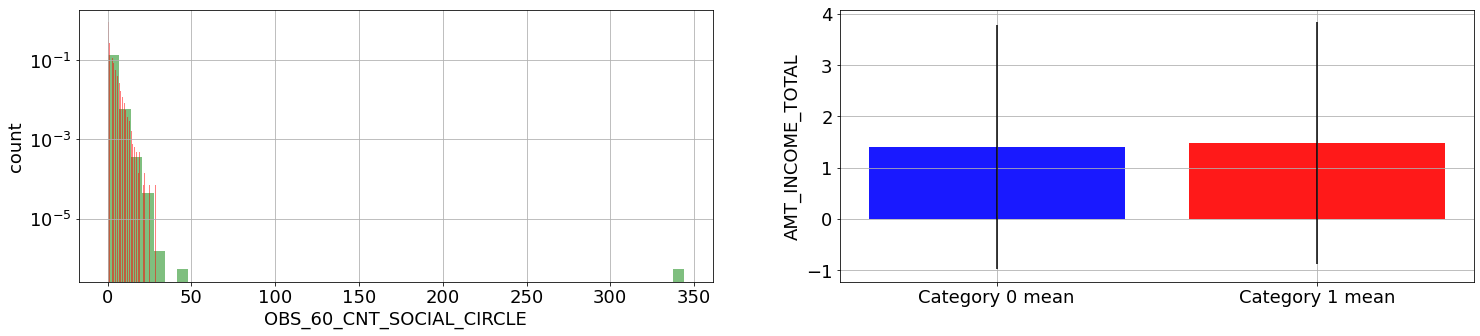

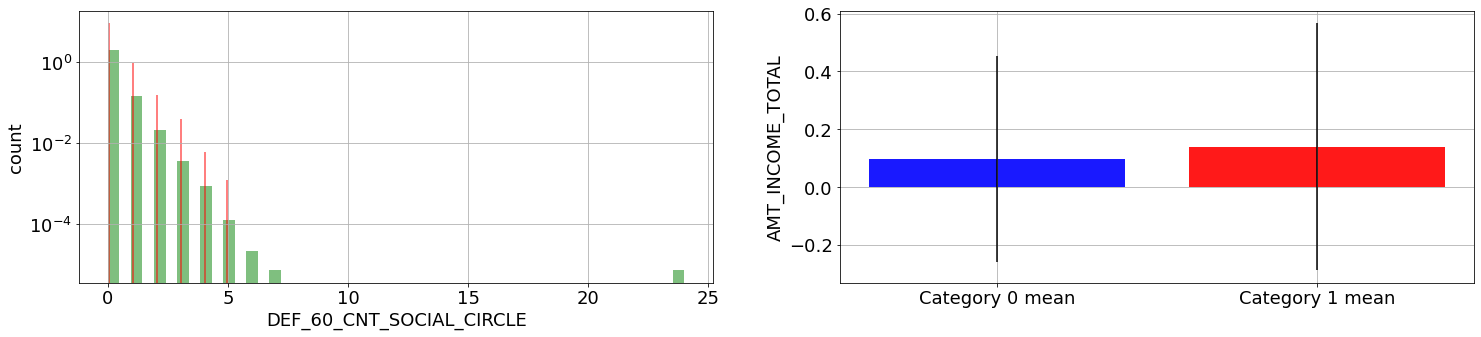

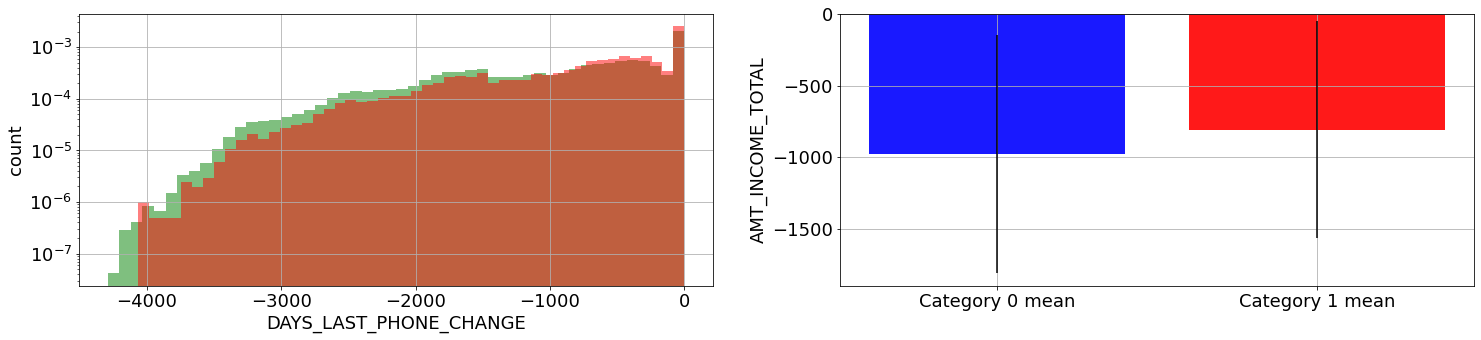

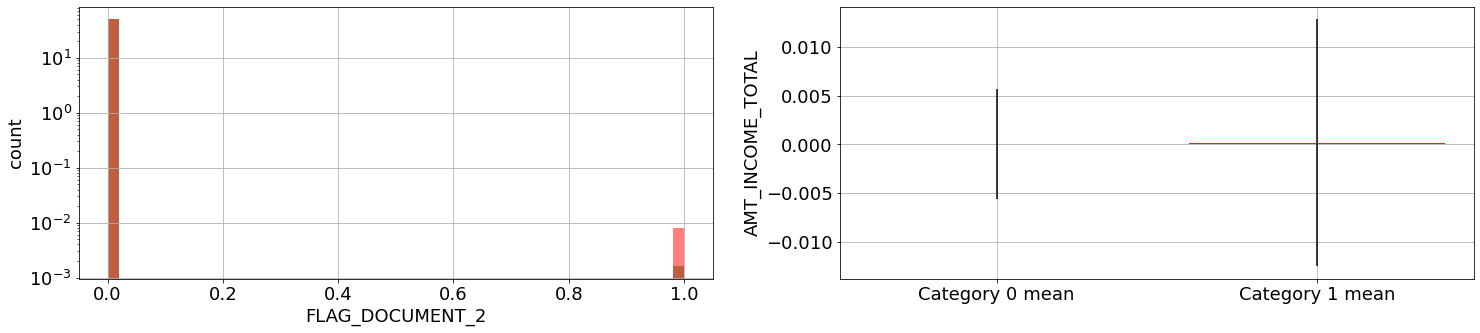

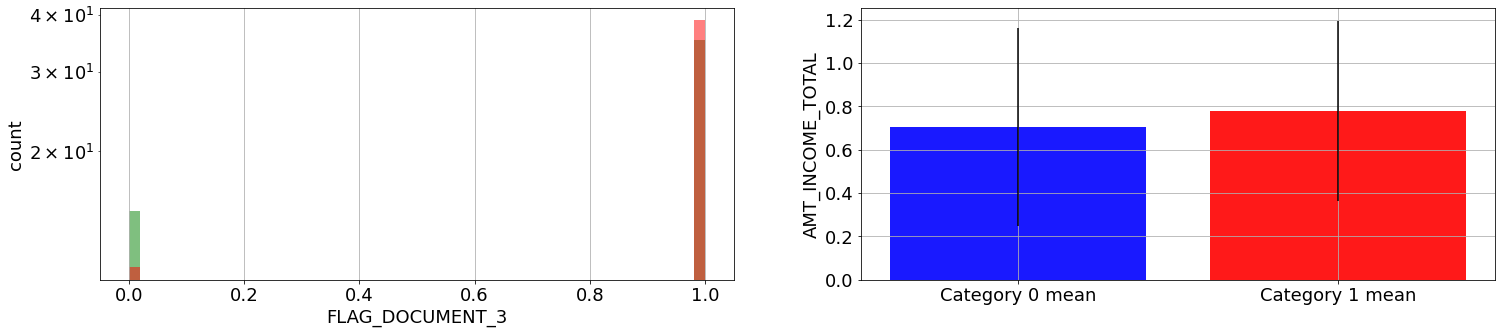

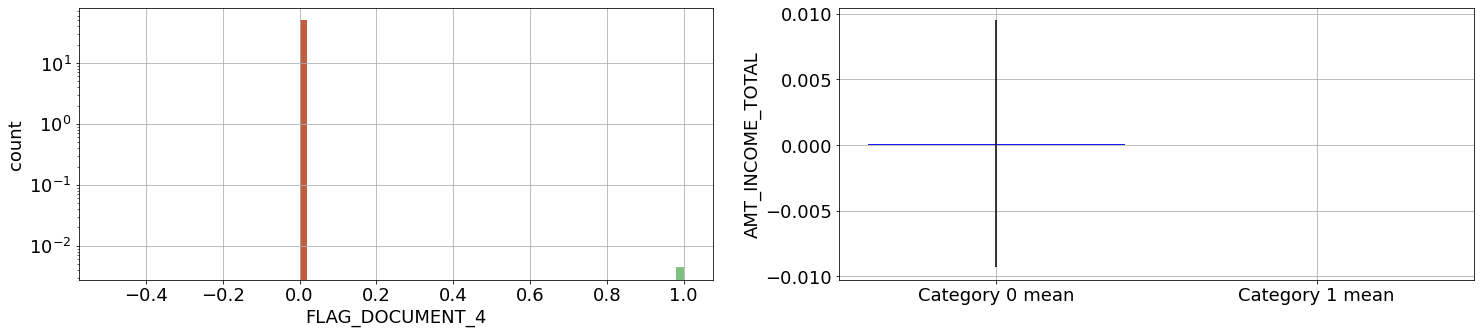

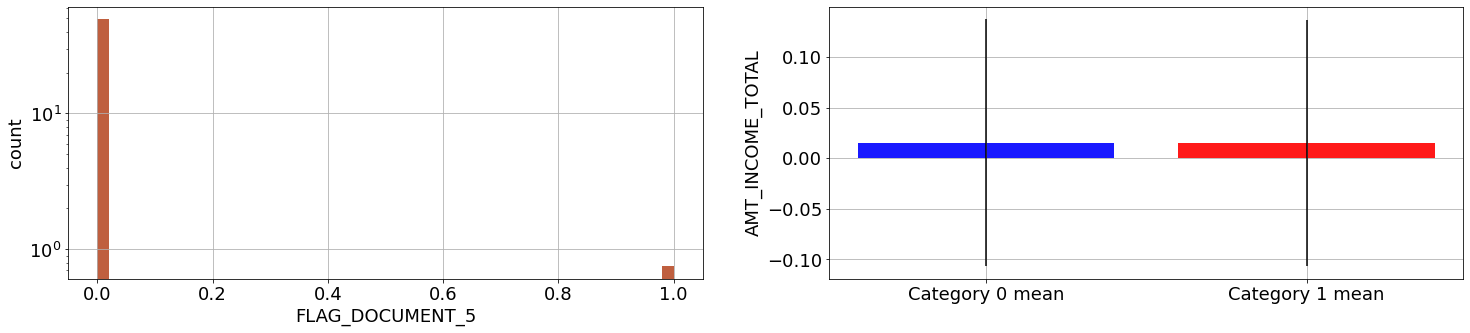

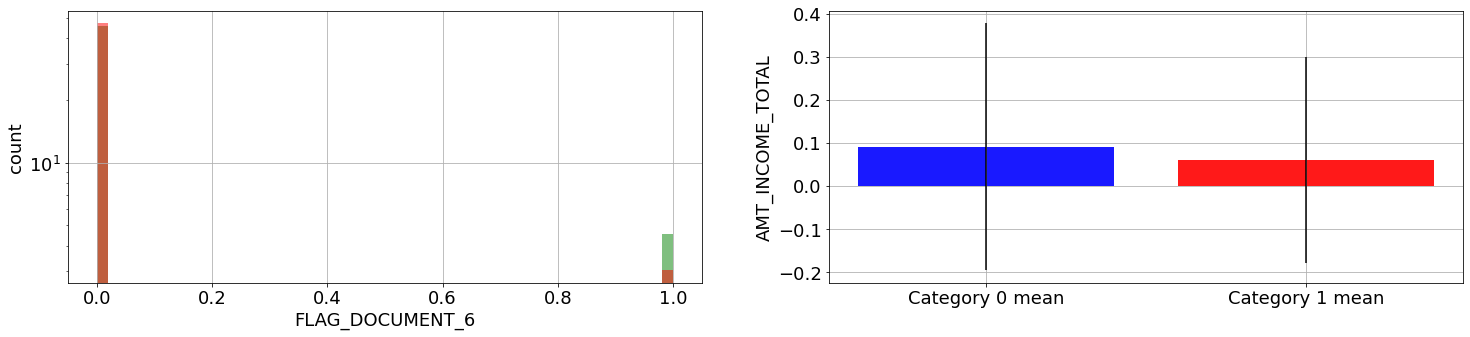

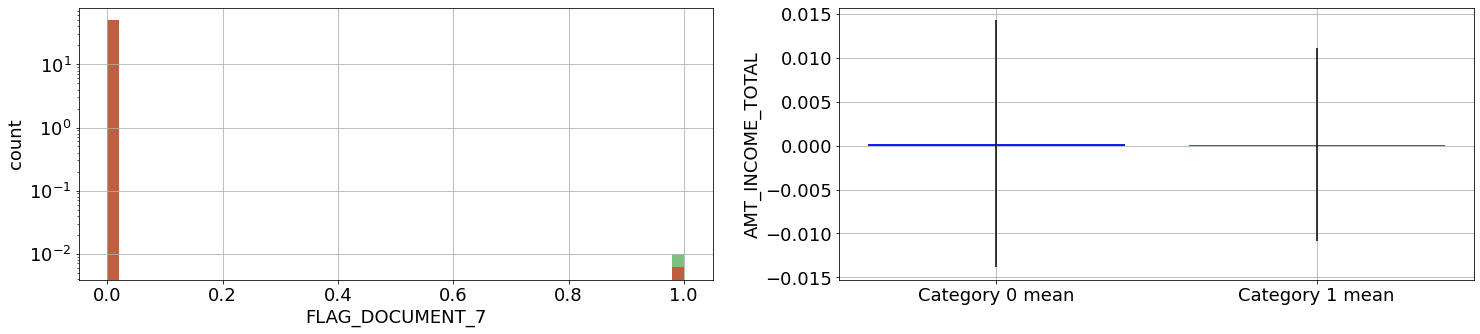

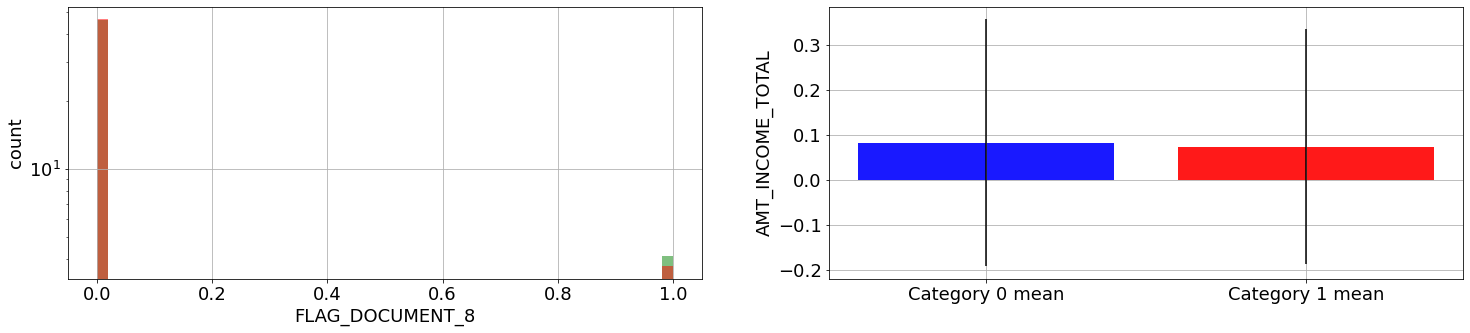

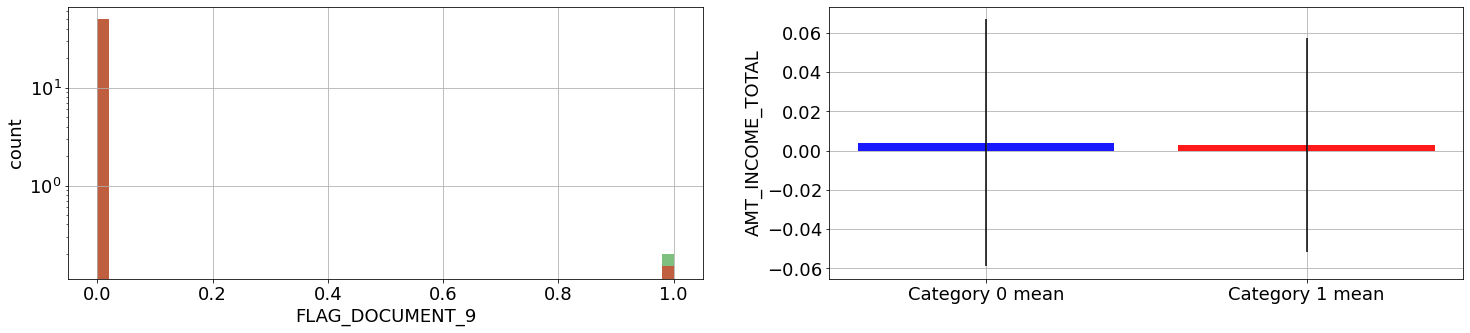

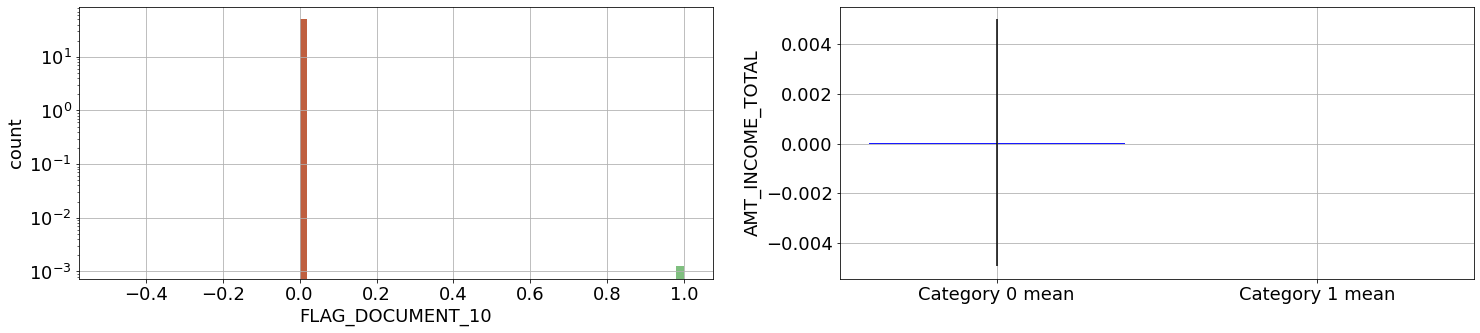

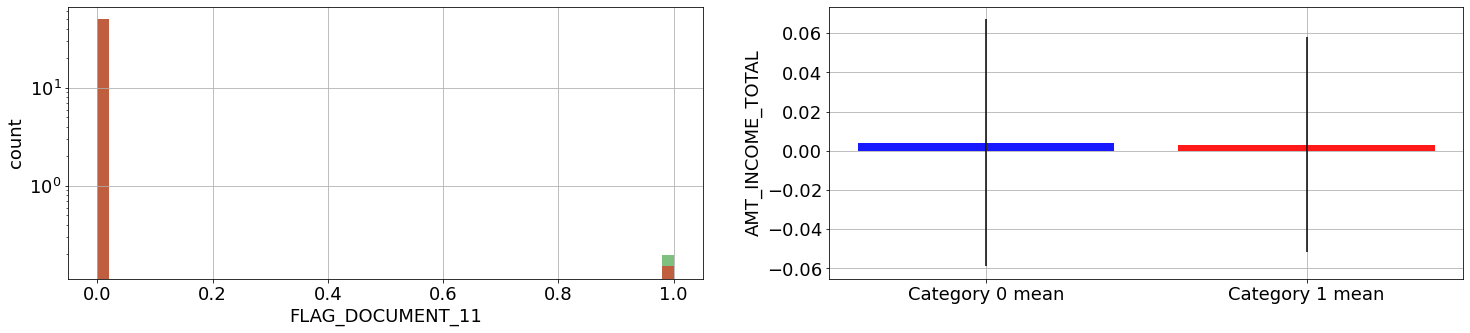

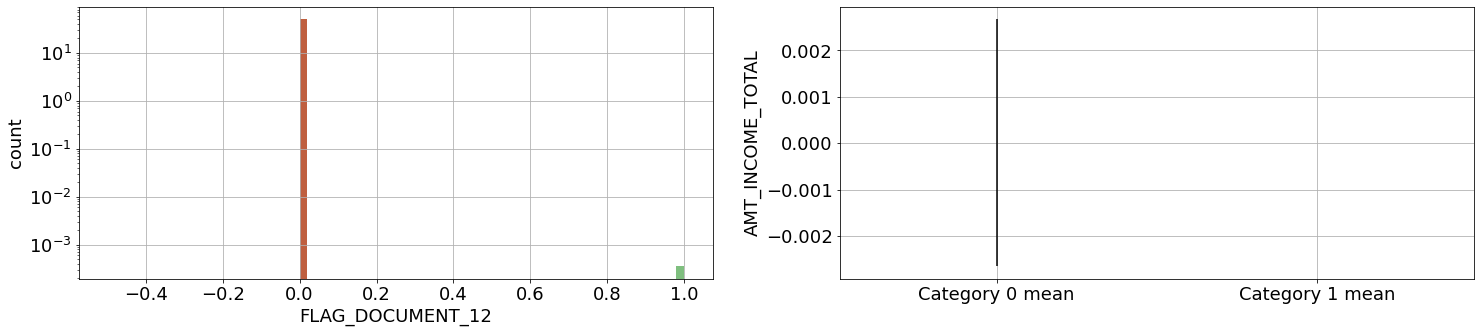

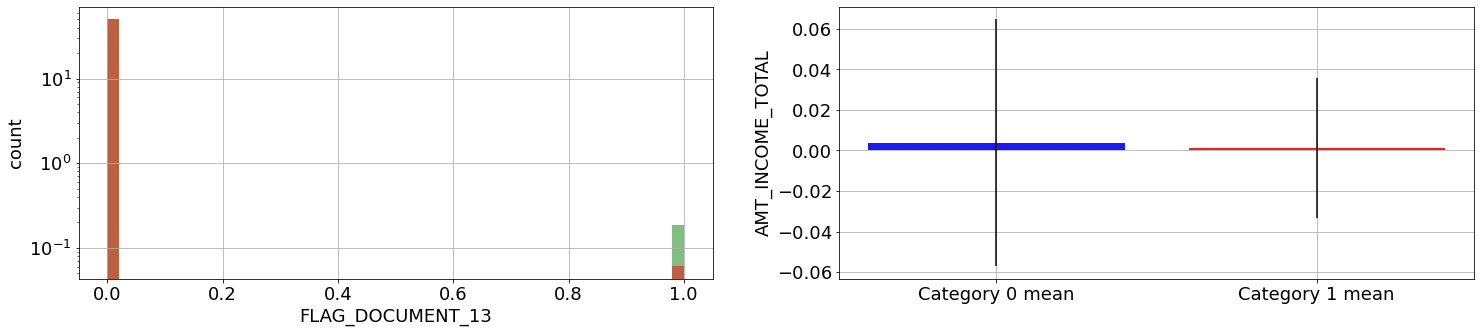

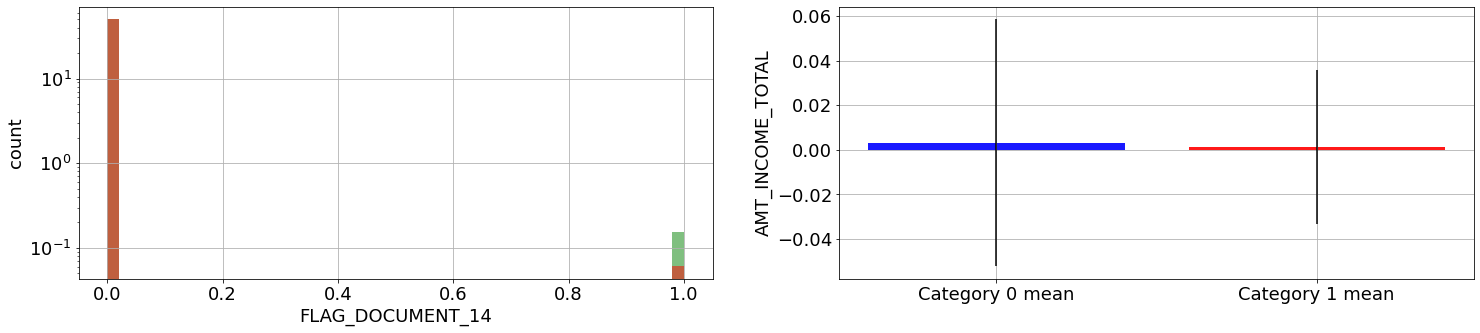

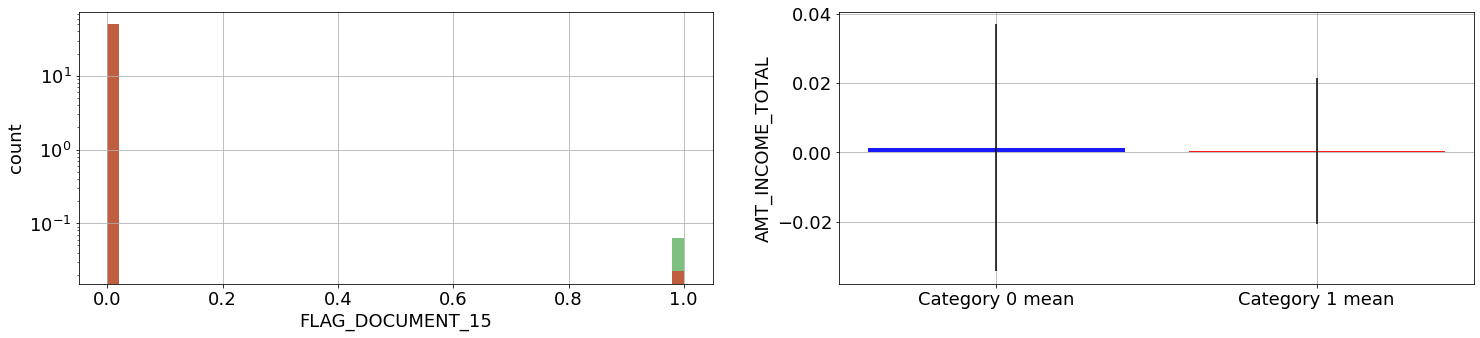

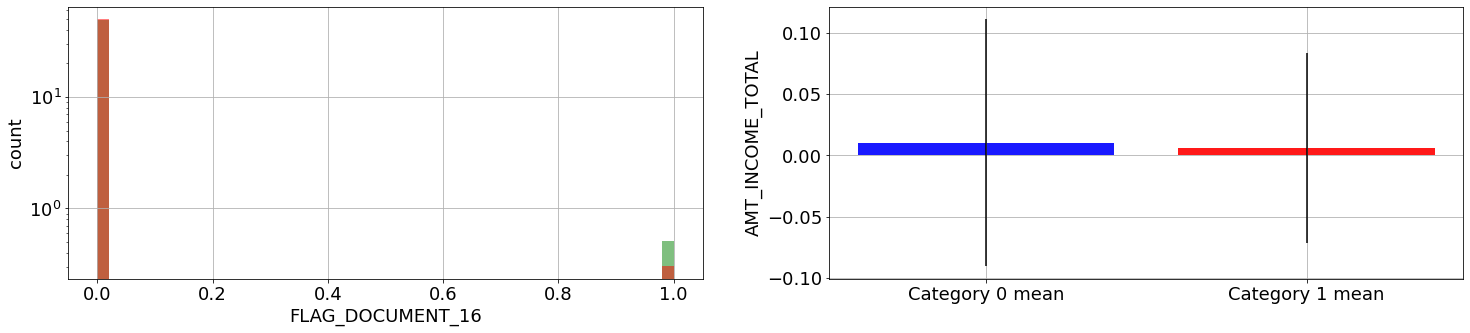

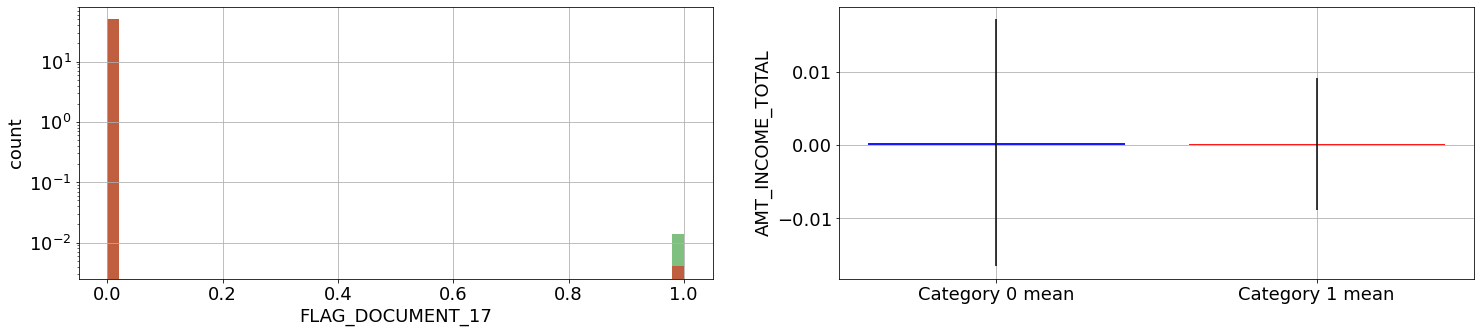

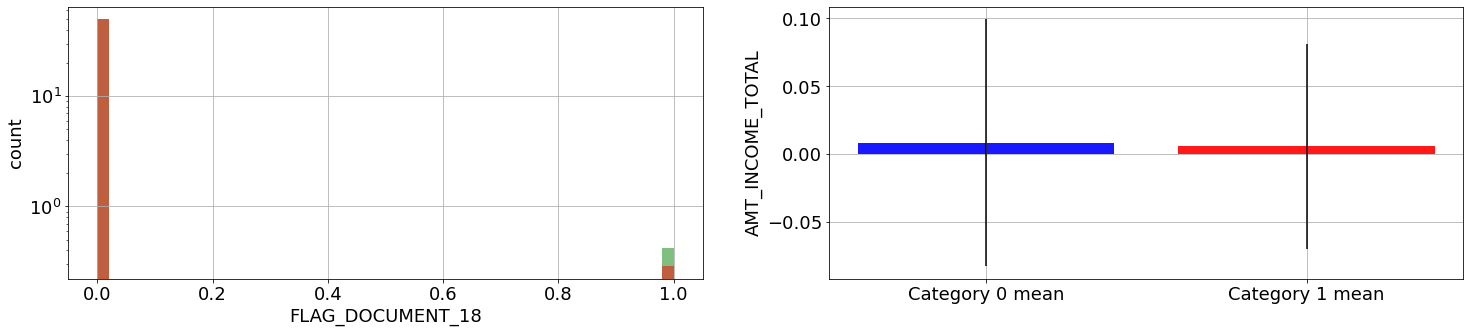

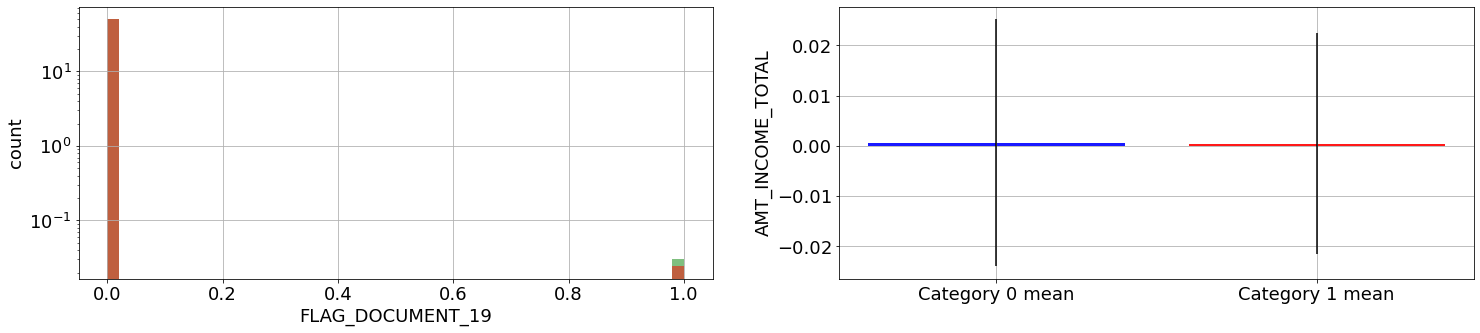

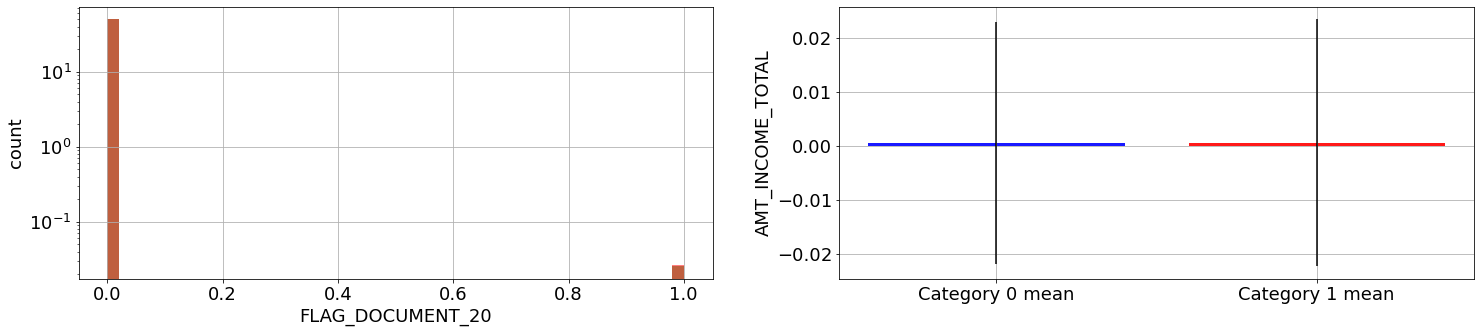

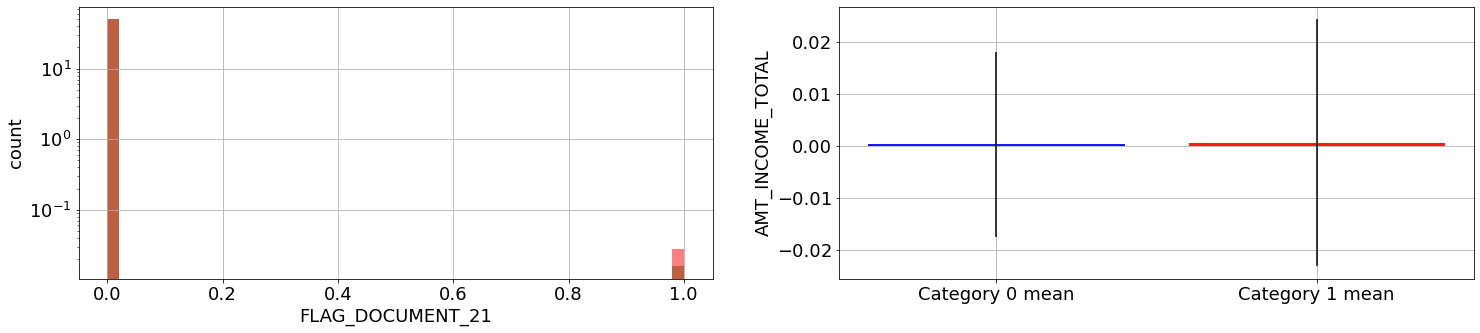

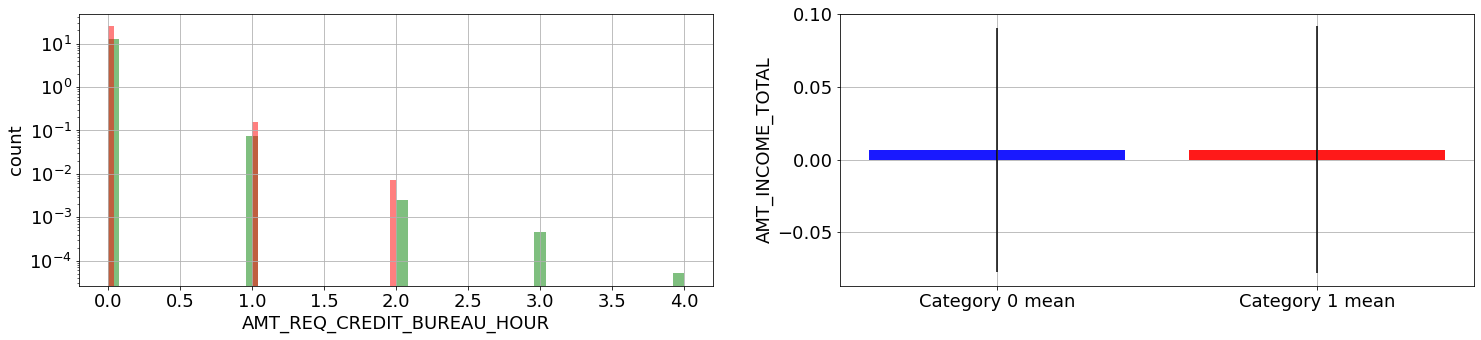

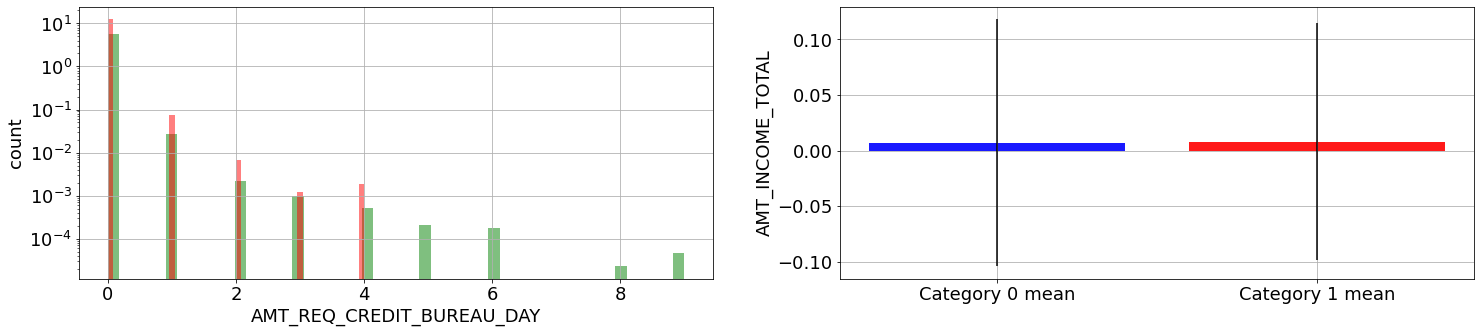

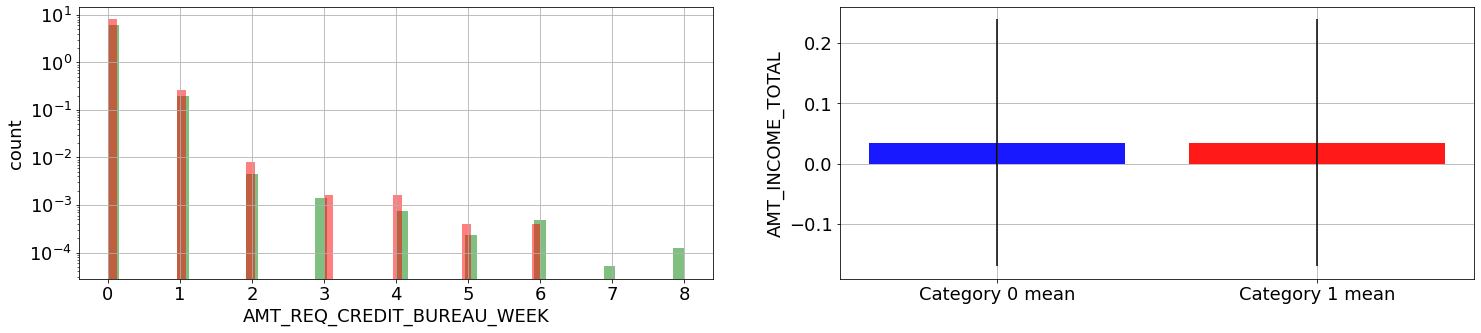

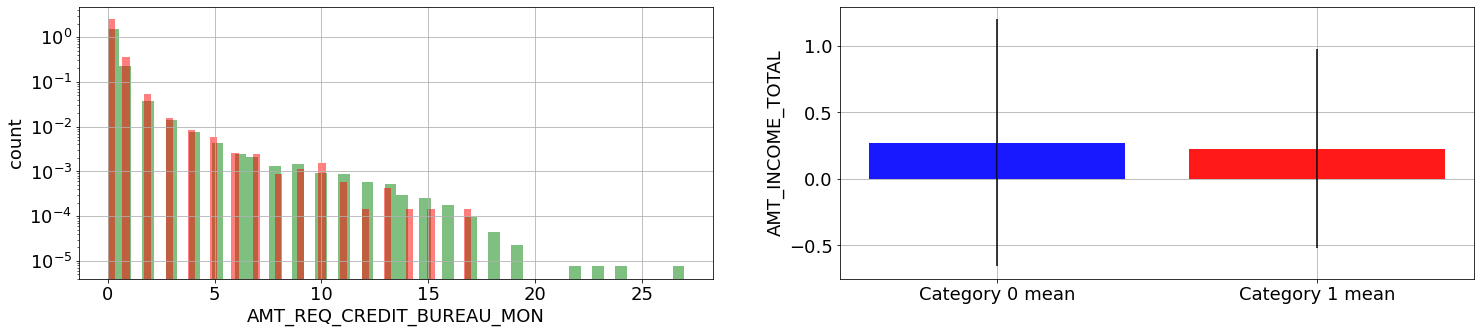

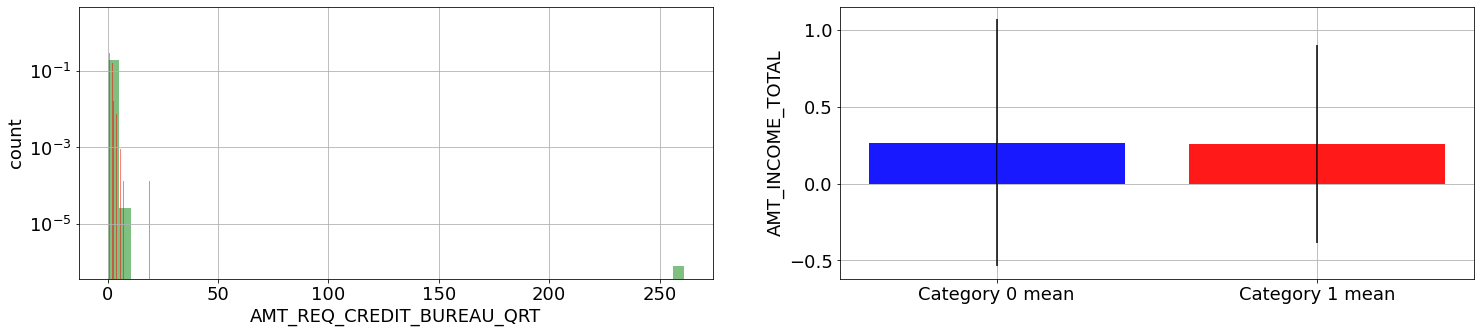

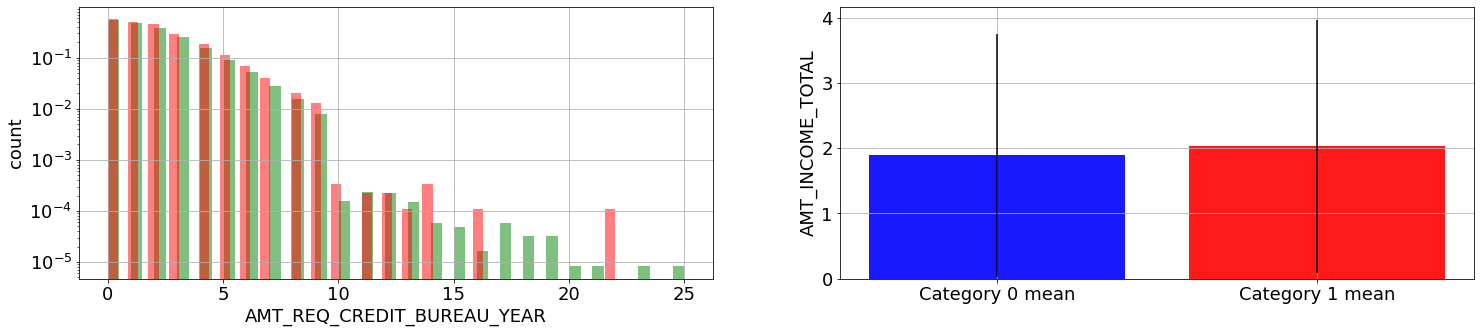

In [26]:
plot_hist_mean(X_train_0,X_train_1,X_train_0_desc,X_train_1_desc)

## Useless columns

Ok, I don't think that the fact that a consumer provide each or each document could be discrimant. So we drop these features.

In [27]:
# Dropping on X_train_0
X_train_0.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
              axis = 1, inplace = True)

C:\Users\vanes\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
# Check
X_train_0.shape[1]

41

In [29]:
# Dropping on X_train_1
X_train_1.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
              axis = 1, inplace = True)

In [30]:
# Check
X_train_1.shape[1]

41

In [31]:
# Dropping on testing set
reduced_X_test.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
              axis = 1, inplace = True)

In [32]:
# Check
reduced_X_test.shape[1]

40

#####################################################################################################################""

I don't think the fact that clients provide work phone, cell phone, email, or the fact that cell is reachable could be relevant for us.
So we drop these features.

In [33]:
# Dropping on X_train_0
X_train_0.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                'FLAG_PHONE', 'FLAG_EMAIL'], 
                axis = 1, inplace = True)

In [34]:
X_train_0.shape[1]

35

In [35]:
# Dropping on X_train_1
X_train_1.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                'FLAG_PHONE', 'FLAG_EMAIL'], 
                axis = 1, inplace = True)

In [36]:
X_train_0.shape[1]

35

In [37]:
# Dropping on reduced_X_test
reduced_X_test.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                'FLAG_PHONE', 'FLAG_EMAIL'], 
                axis = 1, inplace = True)

In [38]:
reduced_X_test.shape[1]

34

######################################################################################################################"

Rating city or region are not good features too. According to histograms, it even seems that the rating mean of clients in payment defaut is higher than the no problem clients'one.
Same reasonment for the application starting hour... Useless

So we drop.

In [39]:
# Dropping on X_train_0
X_train_0.drop(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START'], 
                axis = 1, inplace = True)

In [40]:
X_train_0.shape[1]

32

In [41]:
# Dropping on X_train_1
X_train_1.drop(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START'], 
                axis = 1, inplace = True)

In [42]:
X_train_1.shape[1]

32

In [43]:
# Dropping on reduced_X_test
reduced_X_test.drop(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START'], 
                axis = 1, inplace = True)

In [44]:
reduced_X_test.shape[1]

31

########################################################################################################################

Let's visualize remained columns at this point

In [45]:
""" Max display on columns """

pd.set_option('display.max_columns', 32)
X_train_0.head(3)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1          -1188            -1186.0             -291              2.0   
2           -225            -4260.0            -2531              1.0   
3          -3039            -9833.0            -2437              2.0   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1           NaN                       1.0                       0.0   
2      0.729567                       0.0                       0.0   
3           NaN                       2.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN

We continue. The fact that permanent adress matches with work adress given is not relevant.. Contact adress too...
We drop.

In [46]:
# Dropping on X_train_0
X_train_0.drop(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY'], 
                axis = 1, inplace = True)

C:\Users\vanes\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
X_train_0.shape[1]

26

In [48]:
# Dropping on X_train_1
X_train_1.drop(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY'], 
                axis = 1, inplace = True)

In [49]:
X_train_1.shape[1]

26

In [50]:
# Dropping on reduced_X_test
reduced_X_test.drop(['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY'], 
                axis = 1, inplace = True)

In [51]:
reduced_X_test.shape[1]

25

########################################################################################################################

Number of social's observation 30 or 60 days past due is not our problem yet.
Let's drop.

In [52]:
# Dropping on X_train_0
X_train_0.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                'DEF_60_CNT_SOCIAL_CIRCLE'], 
                axis = 1, inplace = True)

In [53]:
X_train_0.shape[1]

22

In [54]:
# Dropping on X_train_1
X_train_1.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                'DEF_60_CNT_SOCIAL_CIRCLE'], 
                axis = 1, inplace = True)

In [55]:
X_train_1.shape[1]

22

In [56]:
# Dropping on reduced_X_test
reduced_X_test.drop(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                'DEF_60_CNT_SOCIAL_CIRCLE'], 
                axis = 1, inplace = True)

In [57]:
reduced_X_test.shape[1]

21

#################################################################################################################

Number of requiries to bureau credit about the client seems to always be the same... And it doesn't depend on time before application.
Days last phone change is useless too
We can drop.

In [58]:
# Dropping on X_train_0
X_train_0.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'DAYS_LAST_PHONE_CHANGE'], 
                axis = 1, inplace = True)

In [59]:
X_train_0.shape[1]

15

In [60]:
# Dropping on X_train_1
X_train_1.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'DAYS_LAST_PHONE_CHANGE'], 
                axis = 1, inplace = True)

In [61]:
X_train_1.shape[1]

15

In [62]:
# Dropping on reduced_X_test
reduced_X_test.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON',
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'DAYS_LAST_PHONE_CHANGE'], 
                axis = 1, inplace = True)

In [63]:
reduced_X_test.shape[1]

14

#########################################################################################################################

In [64]:
""" Max display on columns """

pd.set_option('display.max_columns', 15)
X_train_0.head(3)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   

   DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1          -1188            -1186.0             -291              2.0   
2           -225            -4260.0            -2531              1.0   
3          -3039            -9833.0            -2437              2.0   

   EXT_SOURCE_2  EXT_SOURCE_3  
1      0.622246           NaN  
2      0.555912      0.729567  
3      0.650442           NaN

<ipython-input-25-f4357207a7c0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


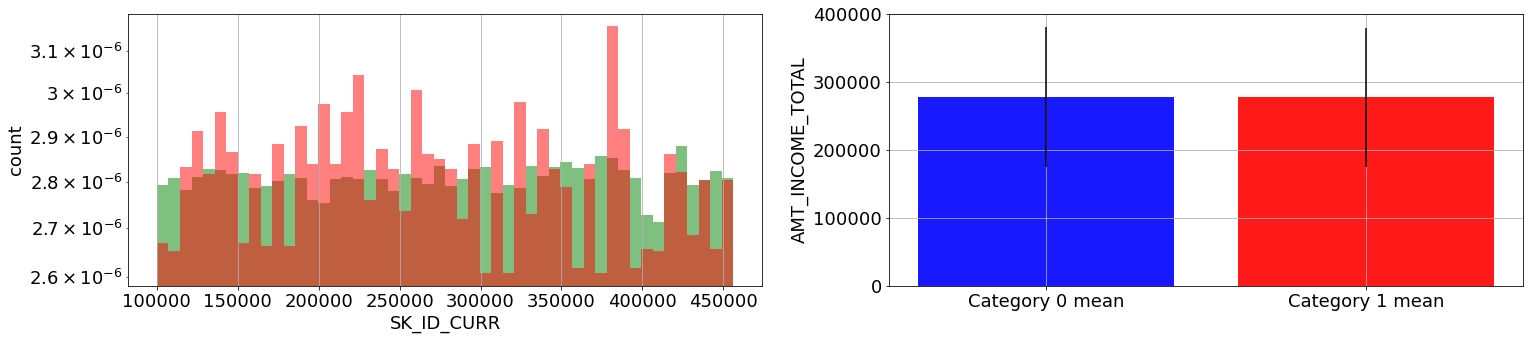

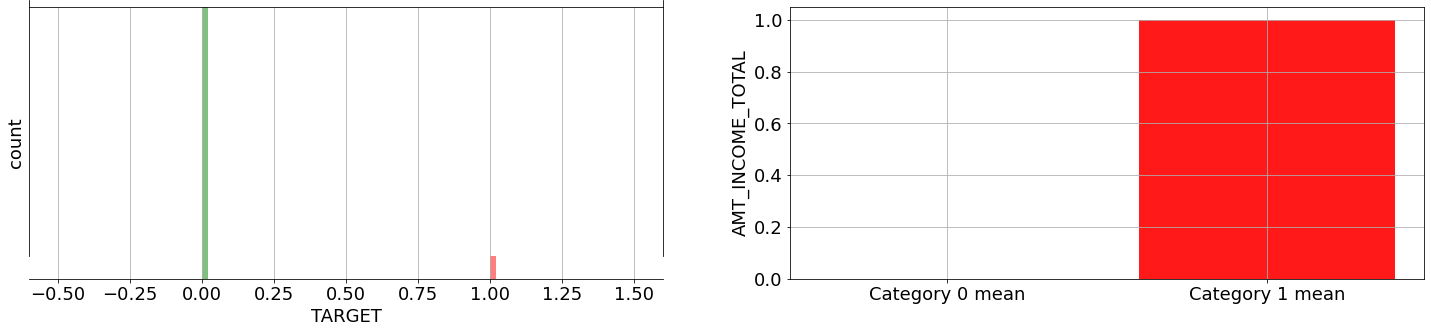

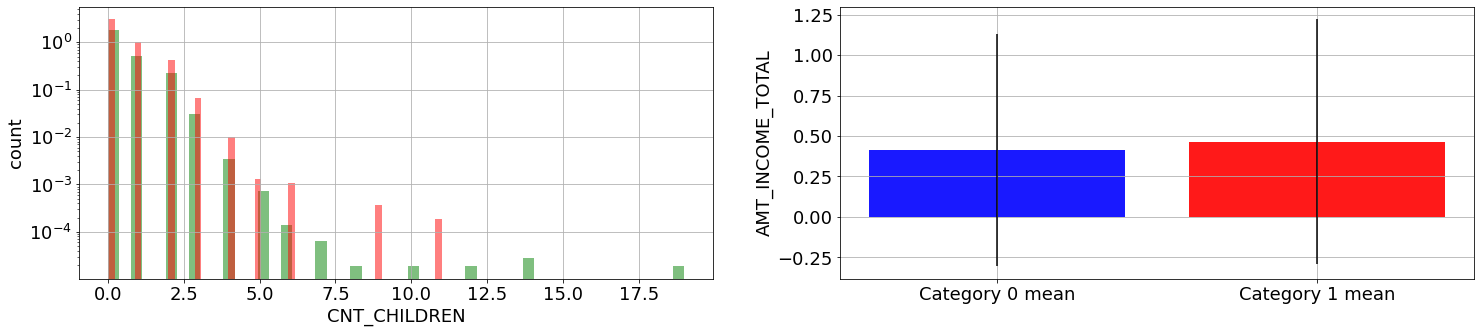

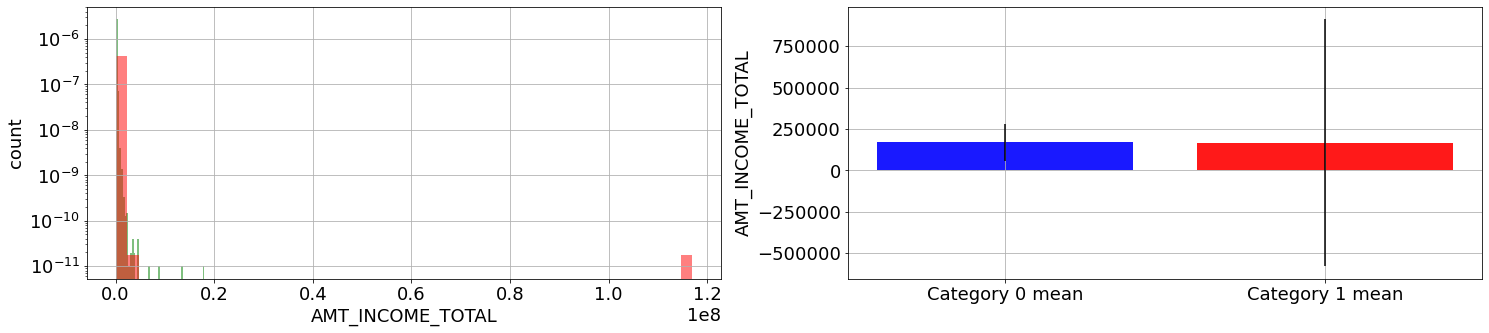

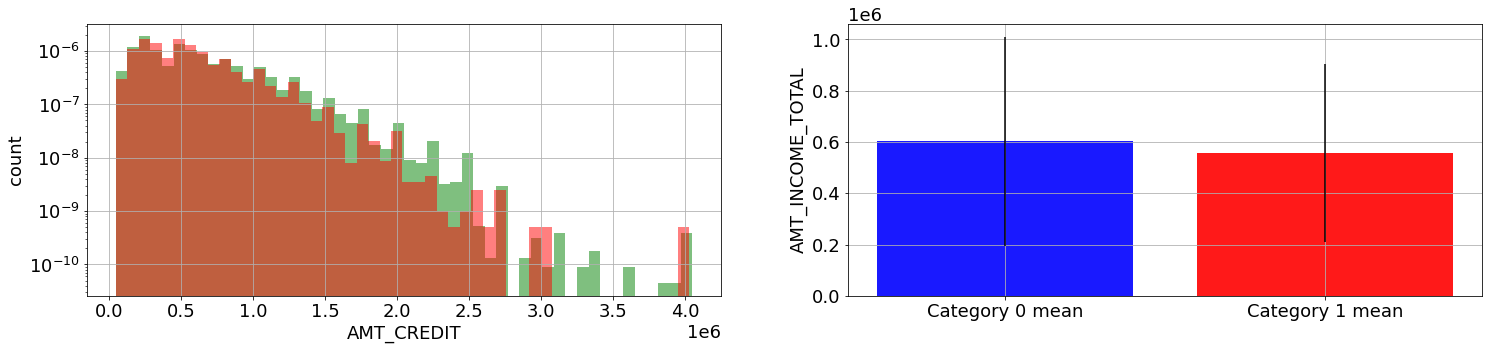

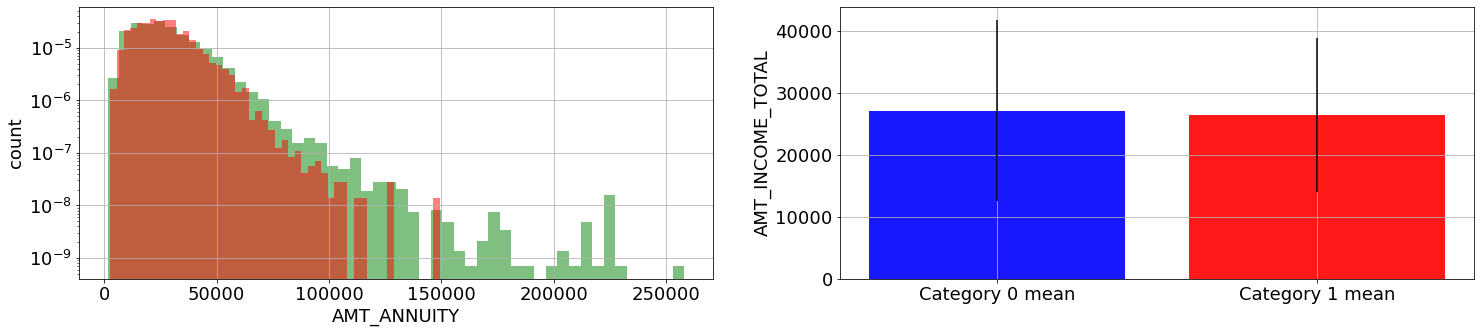

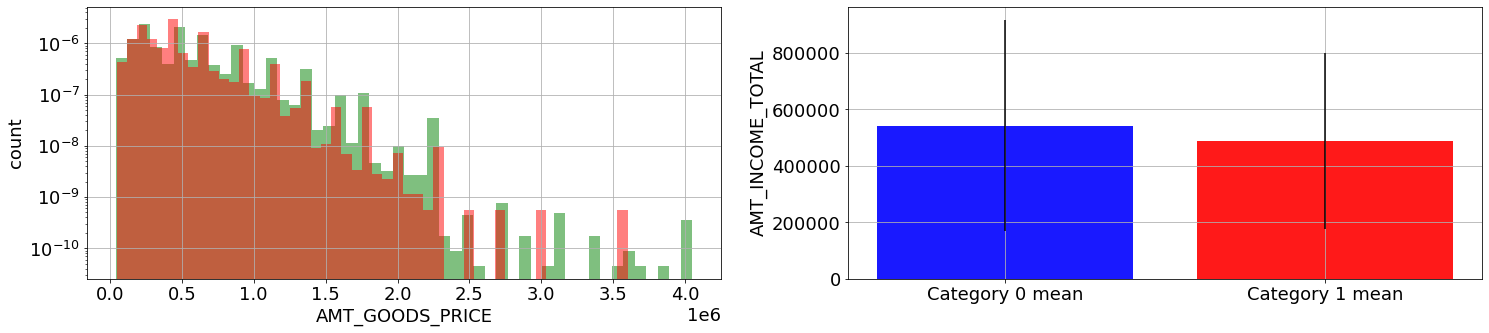

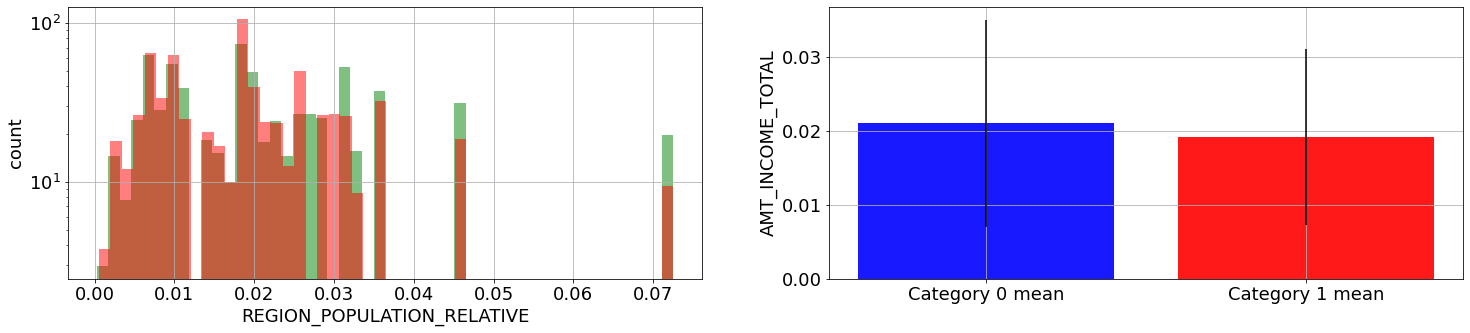

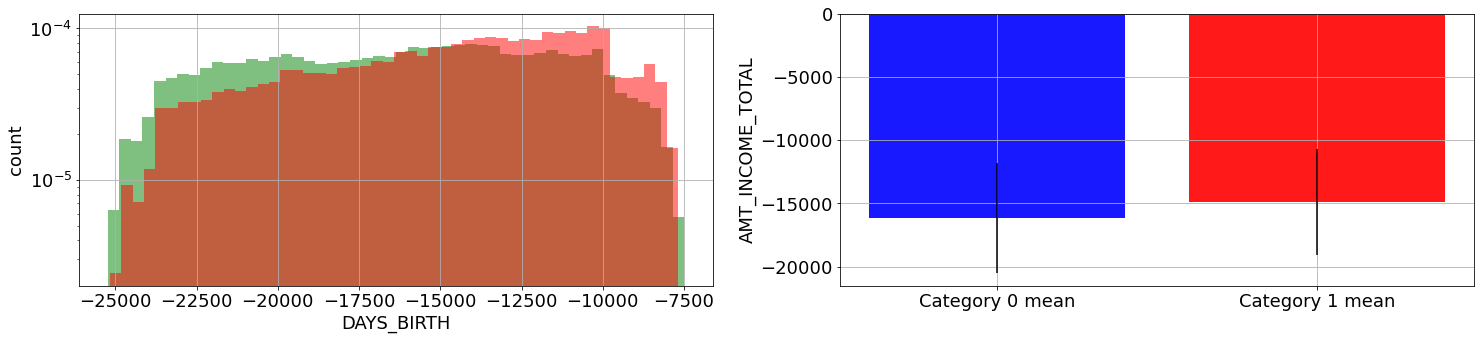

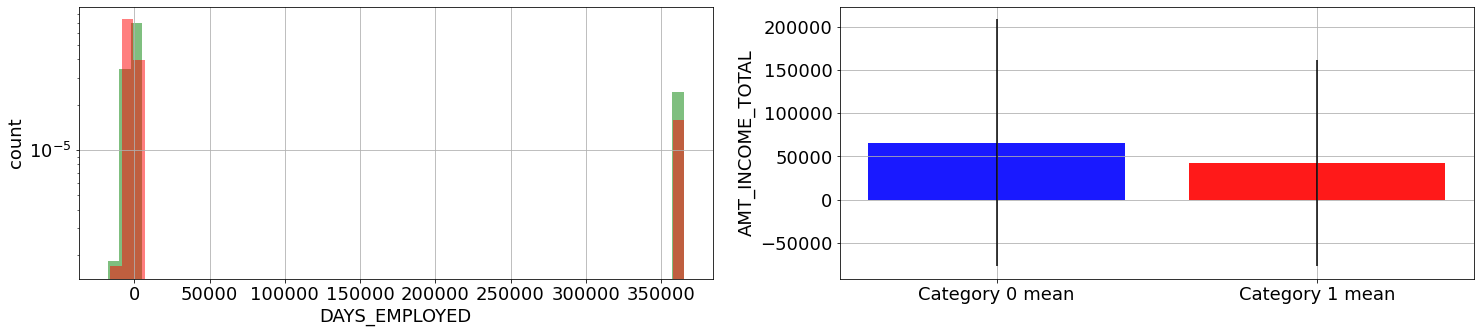

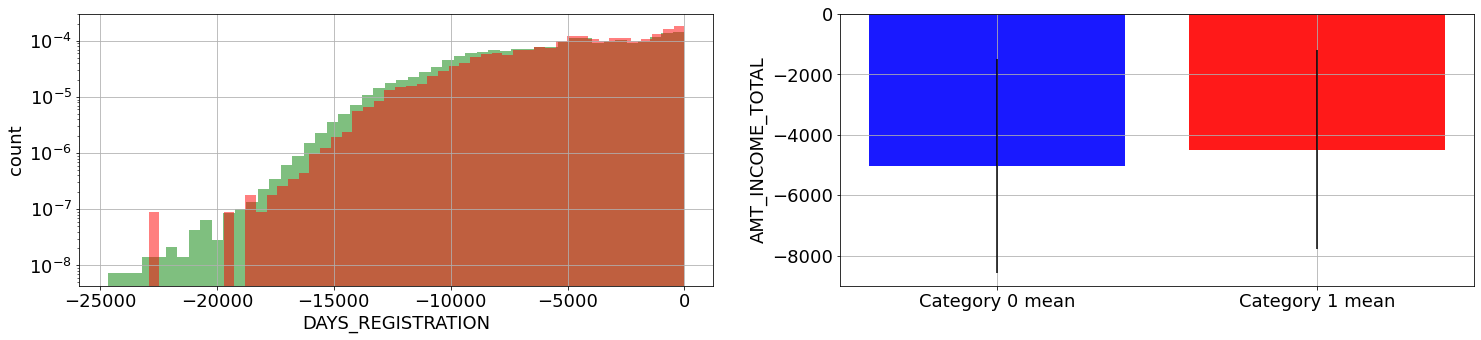

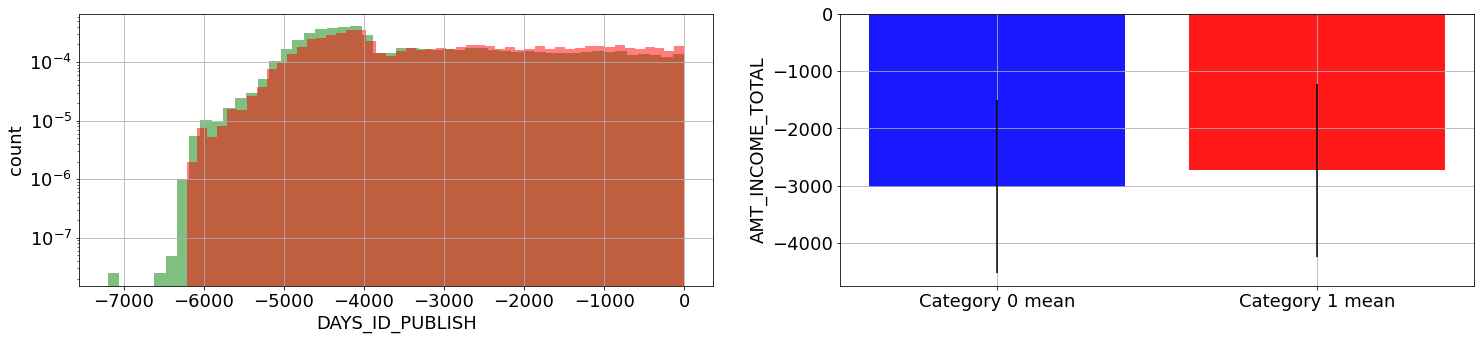

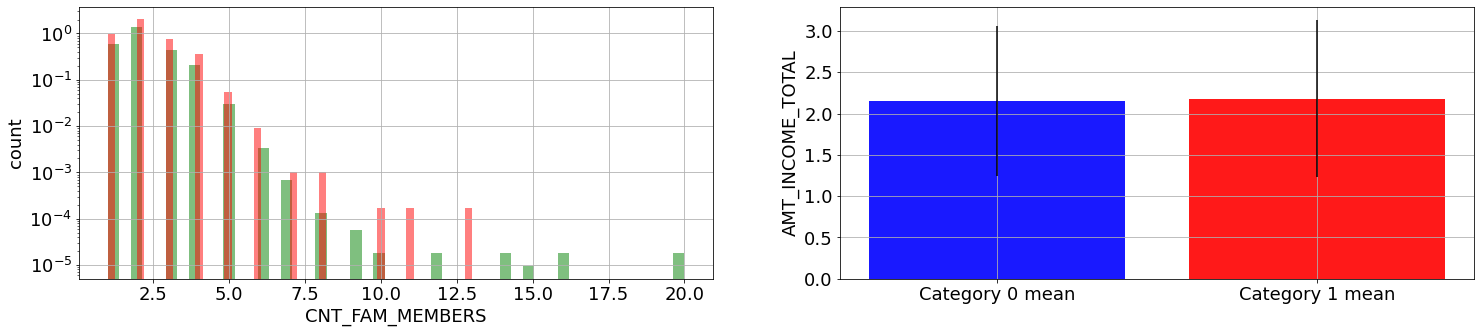

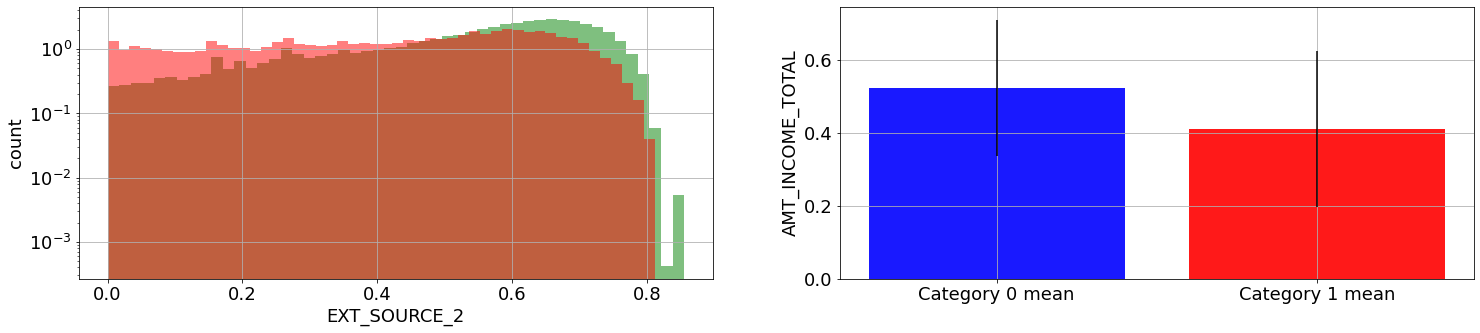

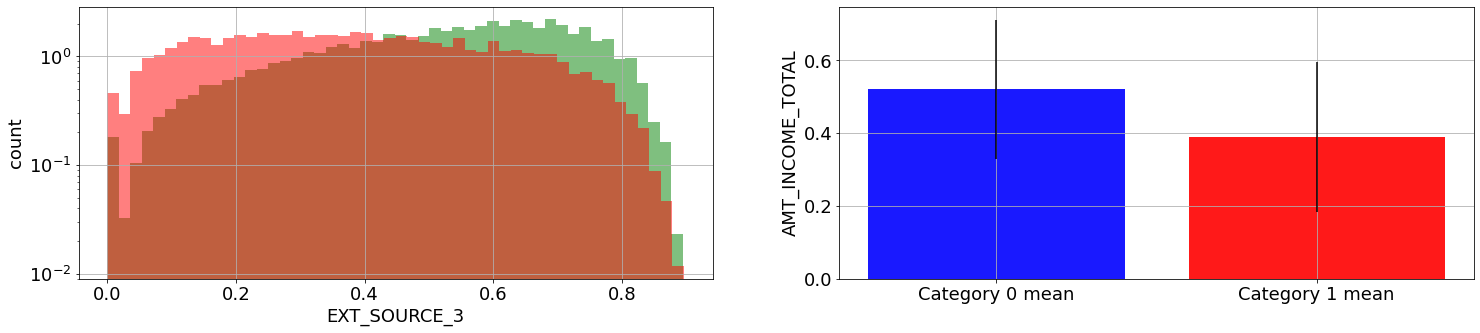

In [65]:
plot_hist_mean(X_train_0,X_train_1,X_train_0_desc,X_train_1_desc)

here it seems that 'bad clients' have an higher mean of children than the 'good' clients.
We keep this feature.
But if we already have the number of children, it seems useless to keep family members' number

In [66]:
# Percentage of client having more than 4 children in default payment
(X_train_1[X_train_1['CNT_CHILDREN'] > 4]).shape[0]/((X_train_0[X_train_0['CNT_CHILDREN'] > 4].shape[0]))*100

14.545454545454545

In [67]:
# Dropping on X_train_0
X_train_0.drop(['CNT_FAM_MEMBERS'], 
                axis = 1, inplace = True)

C:\Users\vanes\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
X_train_0.shape[1]

14

In [69]:
# Dropping on X_train_1
X_train_1.drop(['CNT_FAM_MEMBERS'], 
                axis = 1, inplace = True)

In [70]:
X_train_1.shape[1]

14

In [71]:
# Dropping on reduced_X_test
reduced_X_test.drop(['CNT_FAM_MEMBERS'], 
                axis = 1, inplace = True)

In [72]:
reduced_X_test.shape[1]

13

#########################################################################################################################

I mean we can't discriminate in function of relative population too. First of all it doesn't seem relevant and both means and studs are not significaant too.
Let's drop.


In [73]:
# Dropping on X_train_0
X_train_0.drop(['REGION_POPULATION_RELATIVE'], 
                axis = 1, inplace = True)

In [74]:
X_train_0.shape[1]

13

In [75]:
# Dropping on X_train_1
X_train_1.drop(['REGION_POPULATION_RELATIVE'], 
                axis = 1, inplace = True)

In [76]:
X_train_1.shape[1]

13

In [77]:
# Dropping on reduced_X_test
reduced_X_test.drop(['REGION_POPULATION_RELATIVE'], 
                axis = 1, inplace = True)

In [78]:
reduced_X_test.shape[1]

12

# 4) First final features analysis

In [79]:
# Training set
X_train_0.head(6)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   
5      100008       0             0           99000.0    490495.5   
6      100009       0             1          171000.0   1560726.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1      35698.5        1129500.0      -16765          -1188            -1186.0   
2       6750.0         135000.0      -19046           -225            -4260.0   
3      29686.5         297000.0      -19005          -3039            -9833.0   
4      21865.5         513000.0      -19932          -3038            -4311.0   
5      27517.5         454500.0      -16941          -1588            -4970.0   
6      41301.0        1395000.0      -13778          -3130            -1213.0   

   DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  
1             -291      0.622246           NaN  
2            -2531      0.555912      0.729567  
3            -2437      0.650442           NaN  
4            -3458      0.322738           NaN  
5             -477      0.354225      0.621226  
6             -619      0.724000      0.492060

In [80]:
# Creating new statistics frames
X_train_0_desc = X_train_0.describe()
X_train_1_desc = X_train_1.describe()

<ipython-input-25-f4357207a7c0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


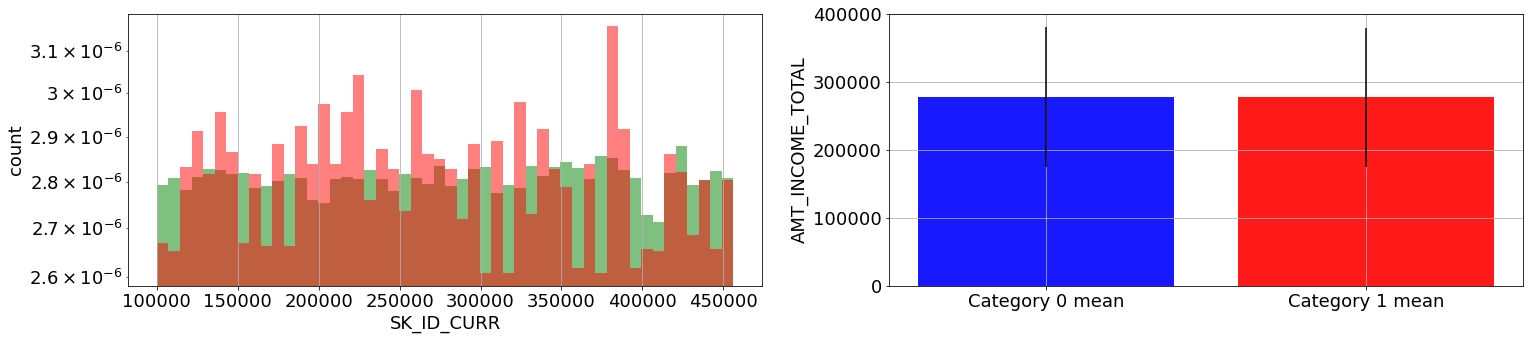

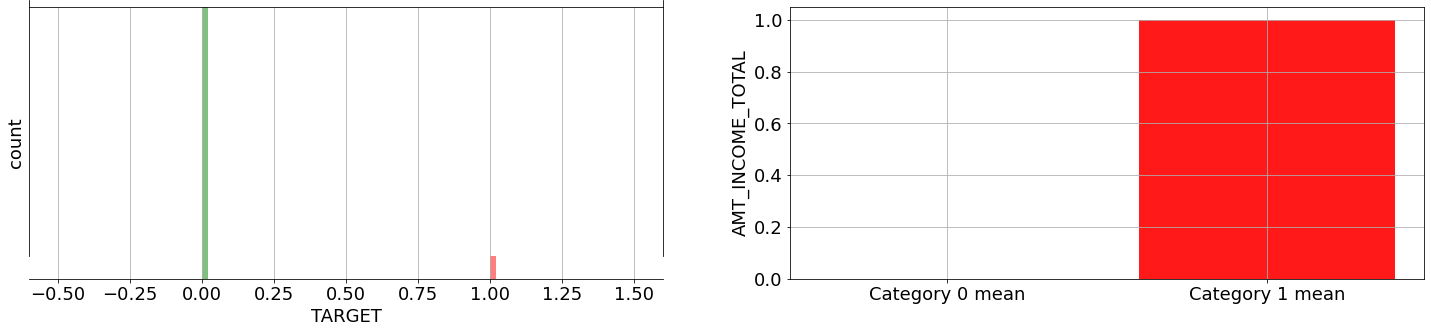

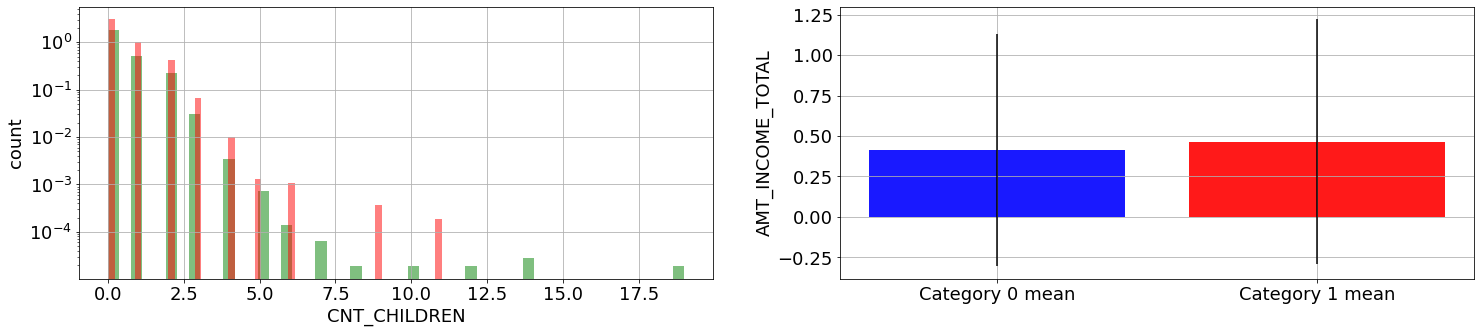

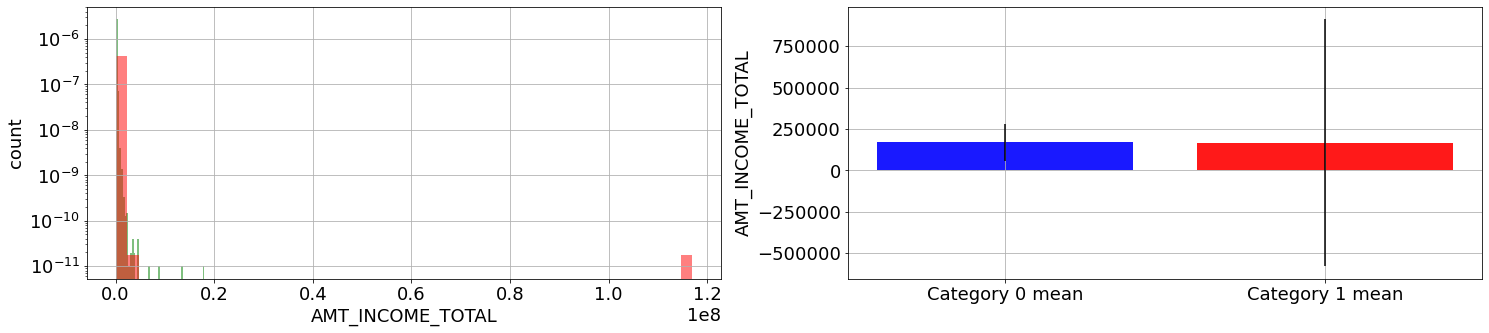

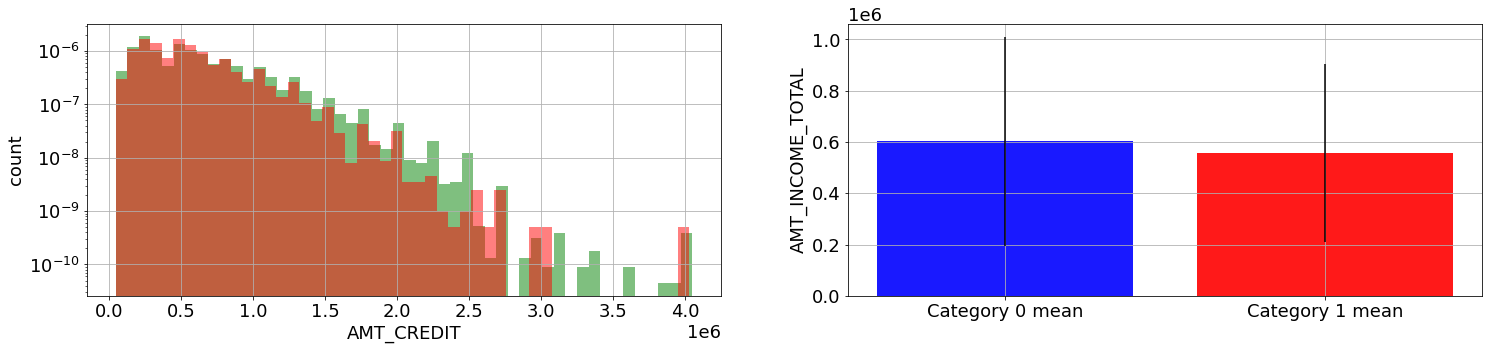

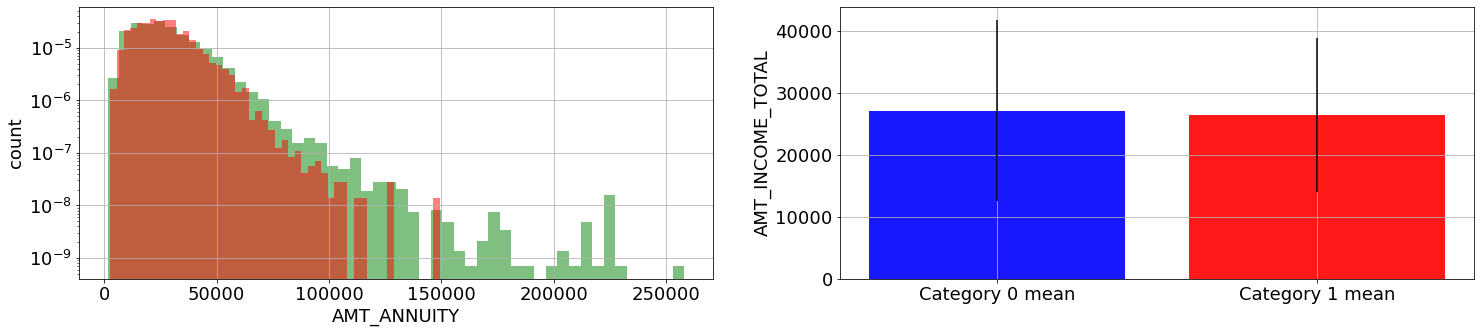

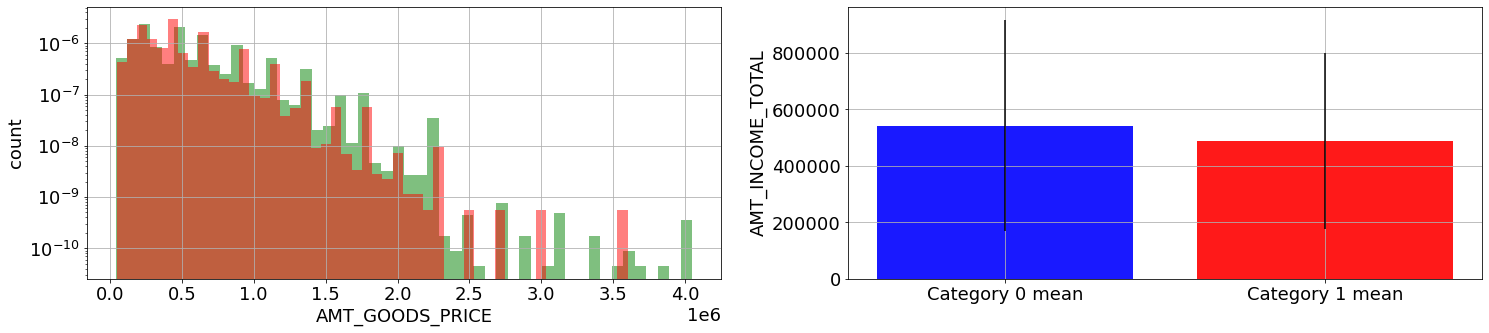

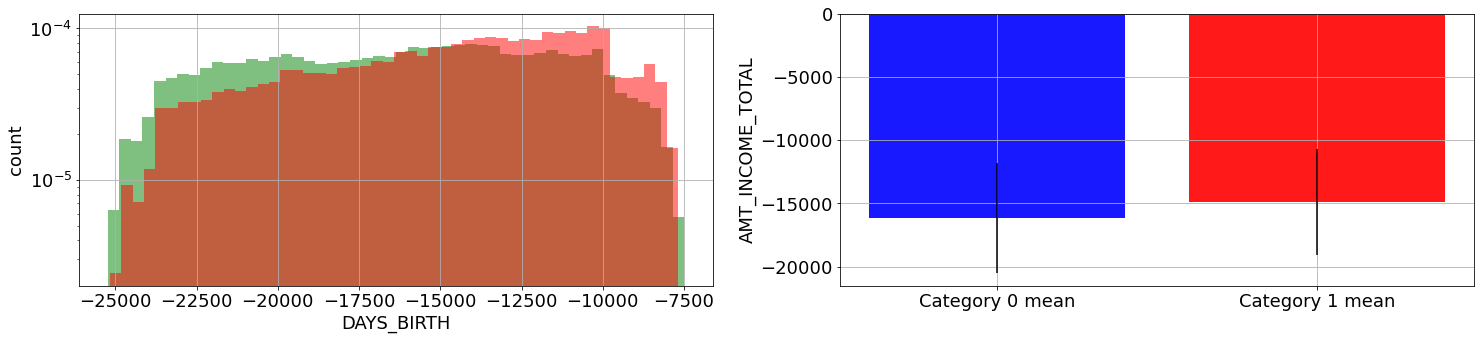

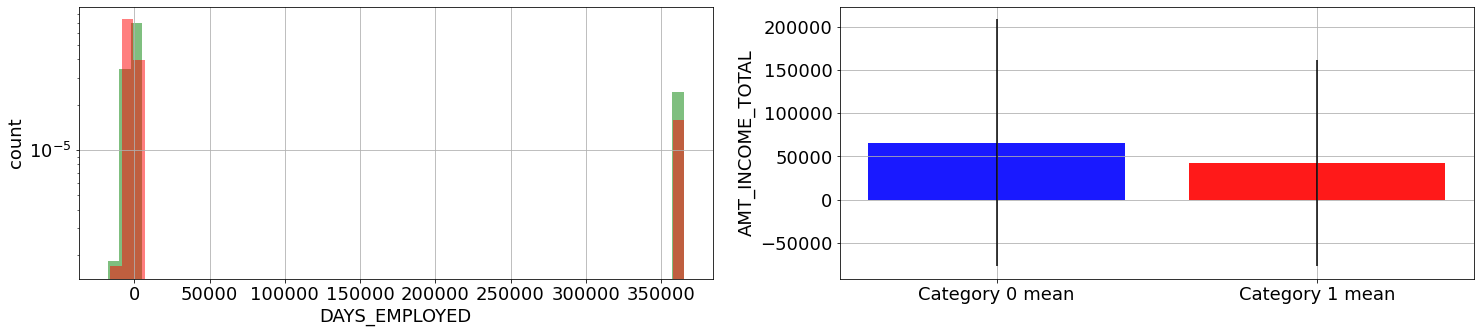

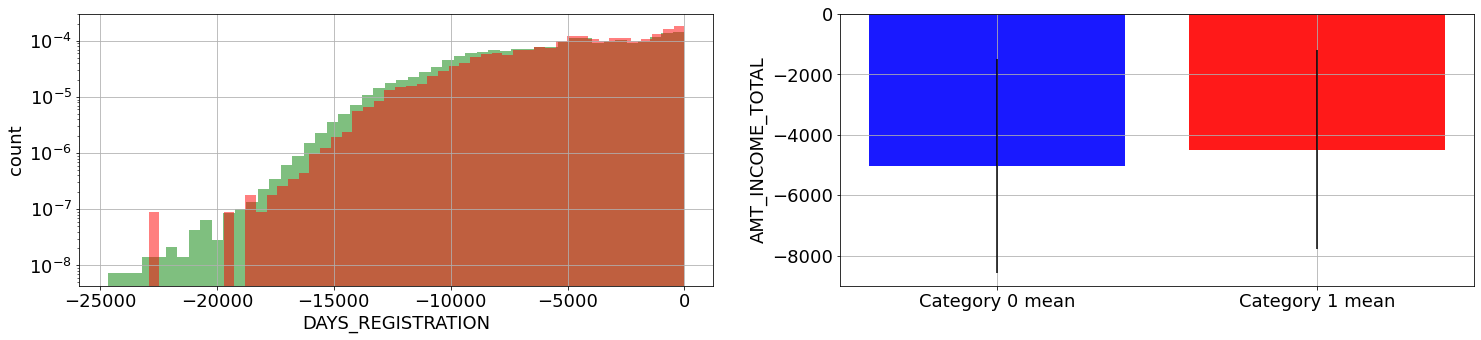

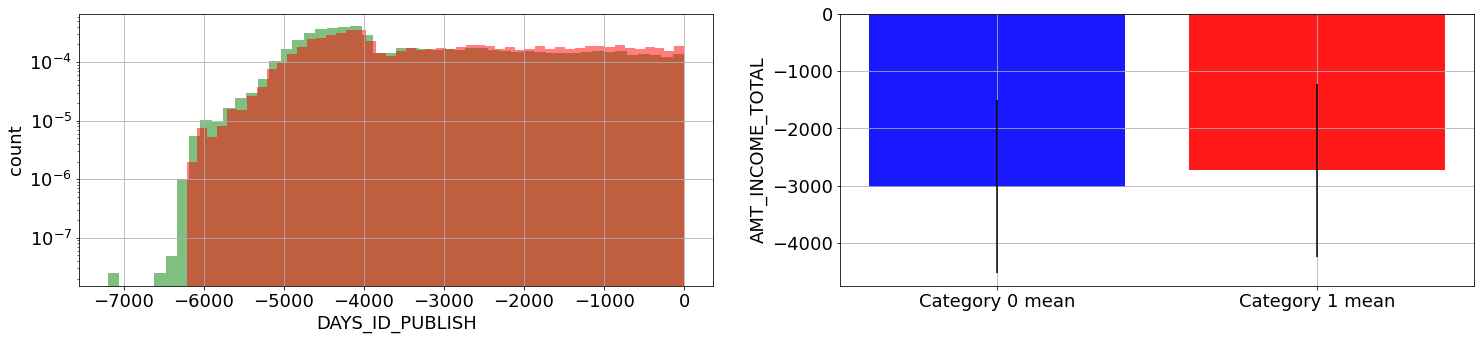

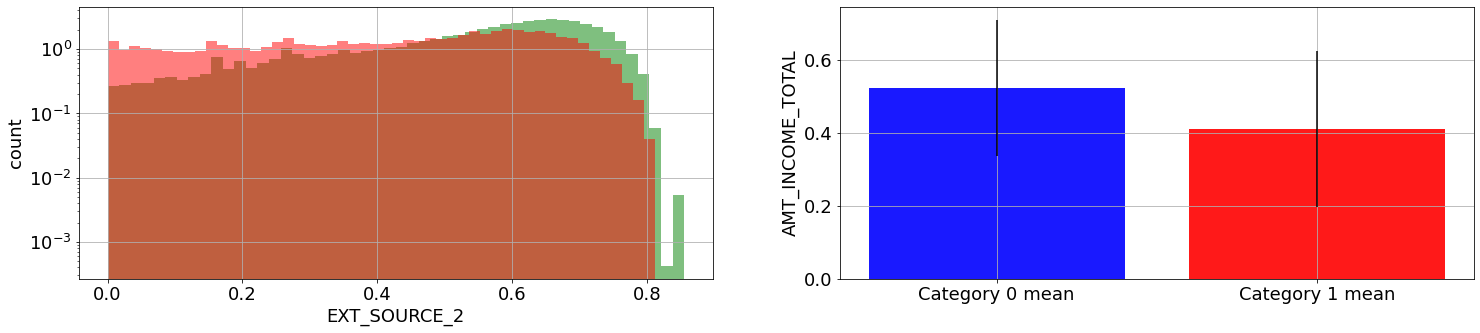

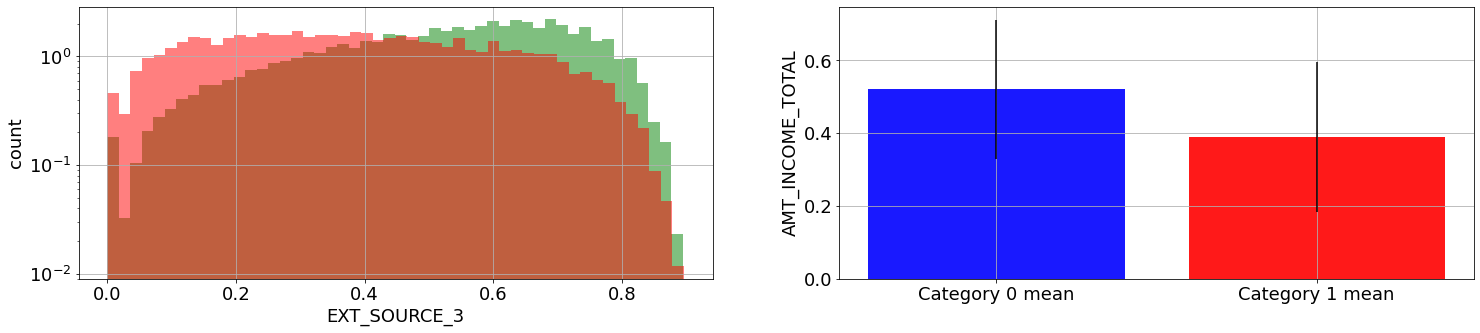

In [81]:
# Histograms of remaning features
plot_hist_mean(X_train_0,X_train_1,X_train_0_desc,X_train_1_desc)

In [82]:
X_train_0_desc

SK_ID_CURR    TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  282686.000000  282686.0  282686.000000      2.826860e+05  2.826860e+05   
mean   278244.744536       0.0       0.412946      1.690777e+05  6.026483e+05   
std    102825.776954       0.0       0.718843      1.104763e+05  4.068459e+05   
min    100003.000000       0.0       0.000000      2.565000e+04  4.500000e+04   
25%    189103.250000       0.0       0.000000      1.125000e+05  2.700000e+05   
50%    278362.500000       0.0       0.000000      1.485000e+05  5.177880e+05   
75%    367241.500000       0.0       1.000000      2.025000e+05  8.100000e+05   
max    456255.000000       0.0      19.000000      1.800009e+07  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  DAYS_EMPLOYED  \
count  282674.000000     2.824290e+05  282686.000000  282686.000000   
mean    27163.623349     5.427368e+05  -16138.176397   65696.146123   
std     14658.307178     3.737855e+05    4364.200856  142877.810161   
min      1615.500000     4.050000e+04  -25229.000000  -17912.000000   
25%     16456.500000     2.385000e+05  -19793.750000   -2813.000000   
50%     24876.000000     4.500000e+05  -15877.000000   -1235.000000   
75%     34749.000000     6.885000e+05  -12536.000000    -278.000000   
max    258025.500000     4.050000e+06   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2   EXT_SOURCE_3  
count      282686.000000    282686.000000  2.820780e+05  227398.000000  
mean        -5029.941065     -3017.219788  5.234787e-01       0.520969  
std          3538.464478      1506.614090  1.862767e-01       0.190465  
min        -24672.000000     -7197.000000  8.173617e-08       0.000527  
25%         -7550.000000     -4313.000000  4.097866e-01       0.385915  
50%         -4544.000000     -3295.000000  5.739047e-01       0.546023  
75%         -2045.000000     -1755.000000  6.677051e-01       0.673830  
max             0.000000         0.000000  8.549997e-01       0.893976

In [83]:
X_train_1_desc

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   24825.000000  24825.0  24825.000000      2.482500e+04  2.482500e+04   
mean   277449.167936      1.0      0.463807      1.656118e+05  5.577785e+05   
std    102383.123458      0.0      0.756903      7.466770e+05  3.464332e+05   
min    100002.000000      1.0      0.000000      2.565000e+04  4.500000e+04   
25%    189555.000000      1.0      0.000000      1.125000e+05  2.844000e+05   
50%    276291.000000      1.0      0.000000      1.350000e+05  4.975200e+05   
75%    366050.000000      1.0      1.000000      2.025000e+05  7.333155e+05   
max    456254.000000      1.0     11.000000      1.170000e+08  4.027680e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE    DAYS_BIRTH  DAYS_EMPLOYED  \
count   24825.000000     2.480400e+04  24825.000000   24825.000000   
mean    26481.744290     4.889724e+05 -14884.828077   42394.675448   
std     12450.676999     3.116365e+05   4192.844583  119484.634253   
min      2722.500000     4.500000e+04 -25168.000000  -16069.000000   
25%     17361.000000     2.385000e+05 -18037.000000   -2156.000000   
50%     25263.000000     4.500000e+05 -14282.000000   -1034.000000   
75%     32976.000000     6.750000e+05 -11396.000000    -379.000000   
max    149211.000000     3.600000e+06  -7678.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  
count       24825.000000     24825.000000  24773.000000  19148.000000  
mean        -4487.127009     -2732.099617      0.410935      0.390717  
std          3299.650241      1516.975313      0.213107      0.205810  
min        -22928.000000     -6207.000000      0.000005      0.000527  
25%         -6646.000000     -4119.000000      0.238568      0.223831  
50%         -4056.000000     -2797.000000      0.440381      0.379100  
75%         -1671.000000     -1392.000000      0.594190      0.553165  
max             0.000000         0.000000      0.811870      0.896010

### Abstract

Some features seem to discriminate our 2 categories, in a way relatively important:

- "Ext_source_2" : 
mean 0 = 0.52 vs mean 1 = 0.41 /
std 0 = 0.19 vs std 1 = 0.21

- "Ext_source_3" :
mean 0 = 0.52 vs mean 1 = 0.19 /
std 0 = 0.39 vs std 1 = 0.20

These 2 extern sources (extern ratings) are 2 features really relevant to distinguish both categories.
It is a pity that we don't know these 2 extern sources, neither their rating system... But we must keep it.

Two others features we didn't expect at this point, but discriminating too :

- "DAYS_REGISTRATION" : 
mean 0 = -5029.94 vs mean 1 = -4487.13 /
std 0 = 3538.46 vs std 1 = 3299.65

- "DAYS_ID_PUBLISH" : 
mean 0 = -3017.22 vs mean 1 = -2732.1 /
std 0 = 1506.61 vs std 1 = 1516.98

2 others features, but this time that we could expect for:

- "DAYS_BIRTH" : 
mean 0 = 16138.18 vs mean 1 = 14884.83 /
std 0 = 4364.2 vs std 1 = 4192.84

3 years and a half on average of difference between the 2 categories.

- "DAYS_EMPLOYED" : 
mean 0 = 65696.15 vs mean 1 = 42394.68 /
std 0 = 142877.81 vs std 1 = 119484.63

Here we've a problem... we have means too high and impossible to reach... So we'll see later the problem...

And finally we have 3 features which doesn't discriminate both categories, but very important :

- "AMT_INCOME_TOTAL"
- "AMT_CREDIT"
- "AMT_ANNUITY"
- "AMT_GOODS_PRICE"

## "Days_employed and outliers"

In [84]:
X_train_0[X_train_0['DAYS_EMPLOYED'] > 0].shape[0]

52384

In [85]:
X_train_1[X_train_1['DAYS_EMPLOYED'] > 0].shape[0]

2990

In [86]:
X_train_1.shape[0]

24825

In [87]:
X_train_0.shape[0]

282686

In [88]:
reduced_X_test[reduced_X_test['DAYS_EMPLOYED'] > 0].shape[0]

9274

In [89]:
reduced_X_test.shape[0]

48744

In [90]:
''' Clearly positive values don't make sens here, let's see the ratio if we drop'''
r0 = X_train_0[X_train_0['DAYS_EMPLOYED'] > 0].shape[0] / X_train_0.shape[0]*100
r1 = X_train_1[X_train_1['DAYS_EMPLOYED'] > 0].shape[0] / X_train_1.shape[0]*100
rtest = reduced_X_test[reduced_X_test['DAYS_EMPLOYED'] > 0].shape[0] / reduced_X_test.shape[0]*100

# Remaining values
new0 = X_train_0.shape[0] - X_train_0[X_train_0['DAYS_EMPLOYED'] > 0].shape[0]
new1 = X_train_1.shape[0] - X_train_1[X_train_1['DAYS_EMPLOYED'] > 0].shape[0]
newtest = reduced_X_test.shape[0] - reduced_X_test[reduced_X_test['DAYS_EMPLOYED'] > 0].shape[0] 

print ('Percentage of dropped values :')
print ('\n')
print('X_train_0 : {}%  remaining values : {}'.format(round(r0, 2), round(new0, 2)))
print('X_train_1 : {}%  remaining values : {}'.format(round(r1, 2), round(new1, 2)))
print('reduced_X_test : {}% remaining values : {}'.format(round(rtest, 2), round(newtest, 2)))

Percentage of dropped values :


X_train_0 : 18.53%  remaining values : 230302
X_train_1 : 12.04%  remaining values : 21835
reduced_X_test : 19.03% remaining values : 39470


In [91]:
# New DataFrames
X_train_0 = X_train_0[X_train_0['DAYS_EMPLOYED'] <= 0]
X_train_1 = X_train_1[X_train_1['DAYS_EMPLOYED'] <= 0]
reduced_X_test = reduced_X_test[reduced_X_test['DAYS_EMPLOYED'] <= 0]

In [92]:
# Check
print('Number of clients 0 : ',X_train_0.shape[0])
print('Number of clients 1 : ',X_train_1.shape[0])
print('Number of clients test : ',reduced_X_test.shape[0])

Number of clients 0 :  230302
Number of clients 1 :  21835
Number of clients test :  39470


### New statistics

In [93]:
X_train_0_desc = X_train_0.describe()
X_train_1_desc = X_train_1.describe()

In [94]:
X_train_0_desc

SK_ID_CURR    TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  230302.000000  230302.0  230302.000000      2.303020e+05  2.303020e+05   
mean   278159.213719       0.0       0.496696      1.764984e+05  6.164879e+05   
std    102858.253592       0.0       0.761316      1.154998e+05  4.114378e+05   
min    100003.000000       0.0       0.000000      2.565000e+04  4.500000e+04   
25%    188932.500000       0.0       0.000000      1.125000e+05  2.762775e+05   
50%    278200.500000       0.0       0.000000      1.575000e+05  5.212800e+05   
75%    367238.750000       0.0       1.000000      2.160000e+05  8.353800e+05   
max    456255.000000       0.0      19.000000      1.800009e+07  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  DAYS_EMPLOYED  \
count  230290.000000     2.300650e+05  230302.000000  230302.000000   
mean    27902.711060     5.551921e+05  -14843.289055   -2438.140133   
std     14834.015175     3.781501e+05    3665.574878    2372.409464   
min      1980.000000     4.050000e+04  -25200.000000  -17912.000000   
25%     16969.500000     2.475000e+05  -17643.000000   -3254.000000   
50%     25843.500000     4.500000e+05  -14671.000000   -1691.000000   
75%     35743.500000     7.020000e+05  -11855.000000    -789.000000   
max    258025.500000     4.050000e+06   -7489.000000       0.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2   EXT_SOURCE_3  
count      230302.000000    230302.000000  2.298430e+05  185379.000000  
mean        -4671.568185     -2819.261709  5.261109e-01       0.510968  
std          3264.517385      1515.106616  1.845068e-01       0.191719  
min        -22701.000000     -7197.000000  8.173617e-08       0.000527  
25%         -7010.000000     -4191.000000  4.166462e-01       0.372334  
50%         -4299.000000     -2917.500000  5.755616e-01       0.533482  
75%         -1869.000000     -1510.000000  6.682920e-01       0.665855  
max             0.000000         0.000000  8.549997e-01       0.893976

In [95]:
X_train_1_desc

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   21835.000000  21835.0  21835.000000      2.183500e+04  2.183500e+04   
mean   277644.539959      1.0      0.517701      1.697506e+05  5.577178e+05   
std    102366.207909      0.0      0.782114      7.956149e+05  3.460483e+05   
min    100002.000000      1.0      0.000000      2.700000e+04  4.500000e+04   
25%    189855.000000      1.0      0.000000      1.125000e+05  2.844000e+05   
50%    276404.000000      1.0      0.000000      1.440000e+05  4.959855e+05   
75%    366375.000000      1.0      1.000000      2.025000e+05  7.290000e+05   
max    456254.000000      1.0     11.000000      1.170000e+08  4.027680e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE    DAYS_BIRTH  DAYS_EMPLOYED  \
count   21835.000000     2.181600e+04  21835.000000    21835.00000   
mean    26859.040669     4.883834e+05 -13986.983055    -1814.91880   
std     12476.177108     3.107642e+05   3537.413871     1849.74065   
min      2844.000000     4.500000e+04 -25168.000000   -16069.00000   
25%     17732.250000     2.385000e+05 -16594.000000    -2380.50000   
50%     25578.000000     4.500000e+05 -13606.000000    -1230.00000   
75%     33394.500000     6.750000e+05 -11087.000000     -594.00000   
max    127507.500000     3.600000e+06  -7678.000000        0.00000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  
count       21835.000000     21835.000000  21790.000000  16862.000000  
mean        -4254.276712     -2604.226609      0.410950      0.383515  
std          3093.420621      1504.096024      0.212956      0.204458  
min        -22928.000000     -6207.000000      0.000005      0.000527  
25%         -6298.500000     -4019.000000      0.239129      0.217629  
50%         -3911.000000     -2598.000000      0.440461      0.370650  
75%         -1553.000000     -1281.000000      0.594009      0.542445  
max             0.000000         0.000000      0.811870      0.882530

In [96]:
# Other check
X_train_0[X_train_0['AMT_ANNUITY']>X_train_0['AMT_CREDIT']]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, EXT_SOURCE_2, EXT_SOURCE_3]
Index: []

In [97]:
# Other check
X_train_1[X_train_1['AMT_ANNUITY']>X_train_1['AMT_CREDIT']]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, EXT_SOURCE_2, EXT_SOURCE_3]
Index: []

In [98]:
# Other check
reduced_X_test[reduced_X_test['AMT_ANNUITY']>reduced_X_test['AMT_CREDIT']]

Empty DataFrame
Columns: [SK_ID_CURR, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, EXT_SOURCE_2, EXT_SOURCE_3]
Index: []

<ipython-input-25-f4357207a7c0>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vanes\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


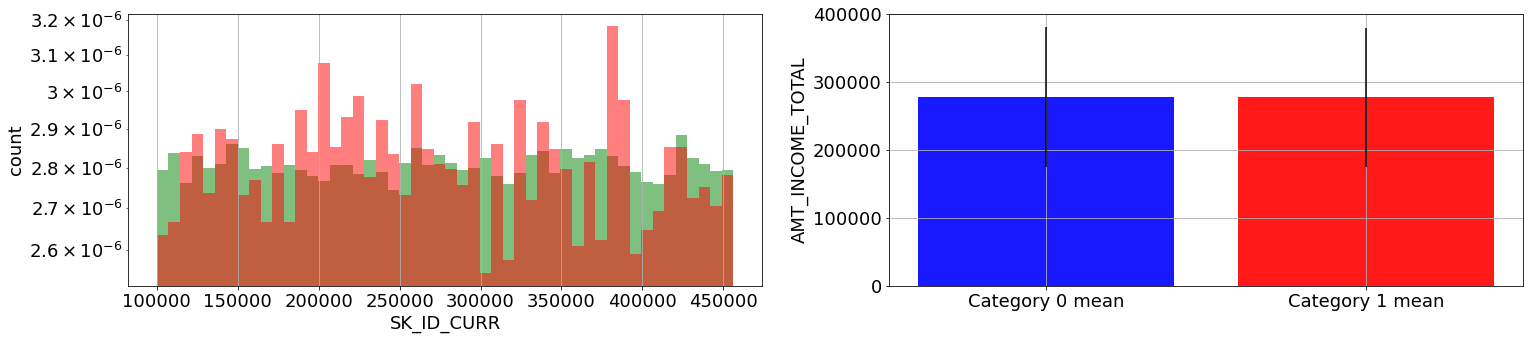

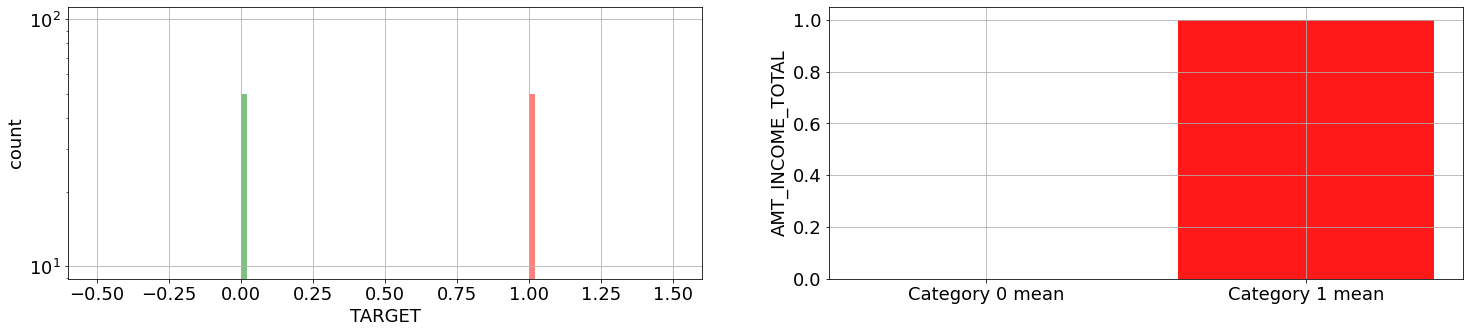

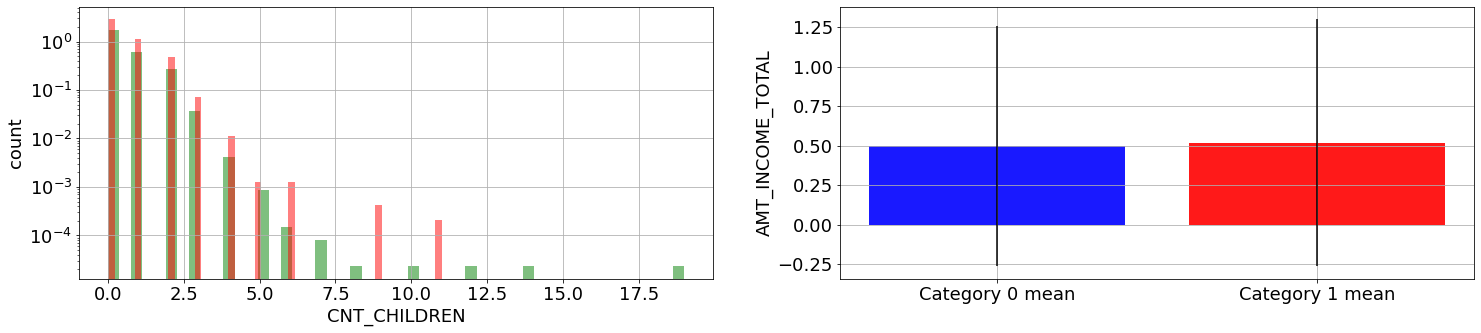

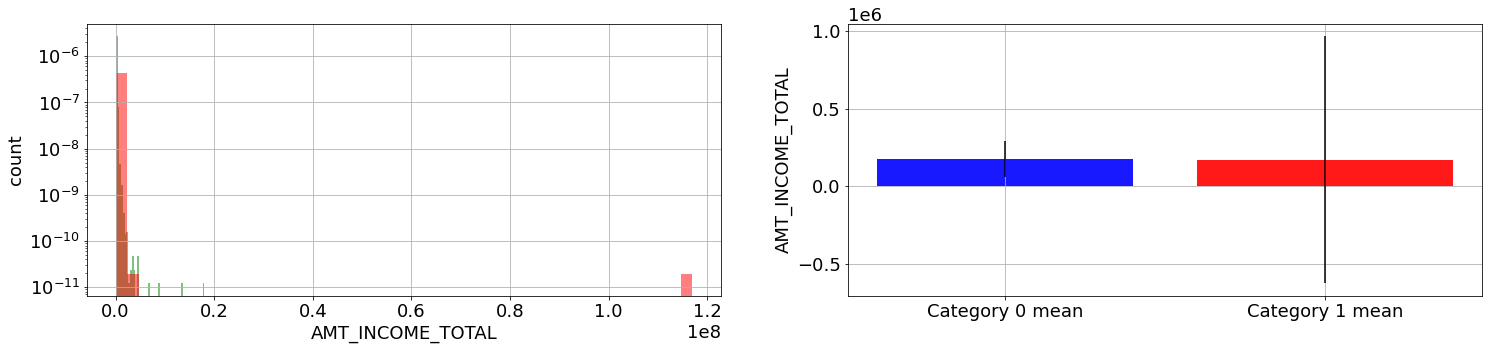

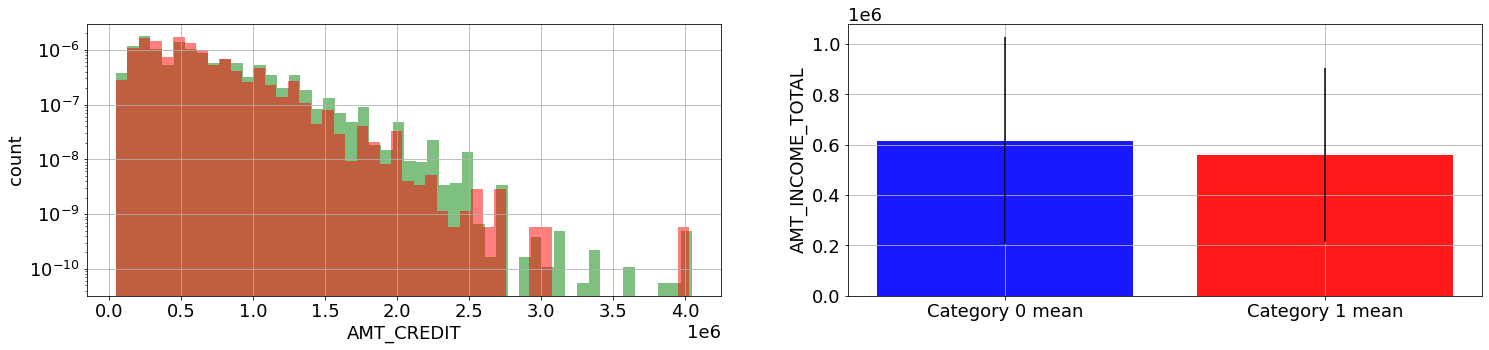

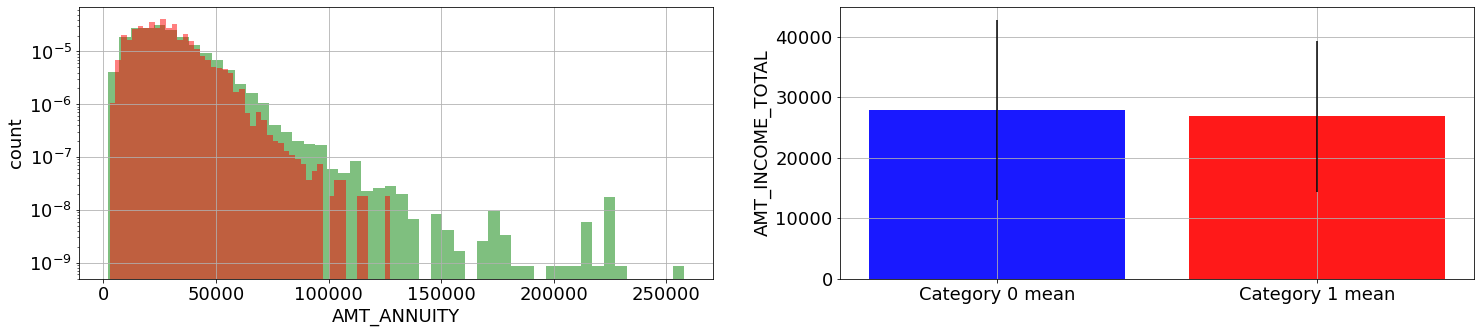

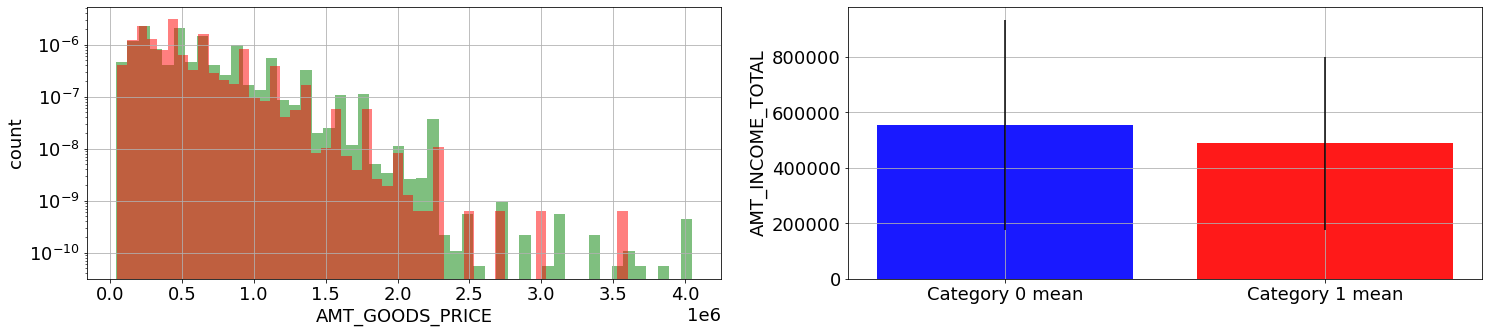

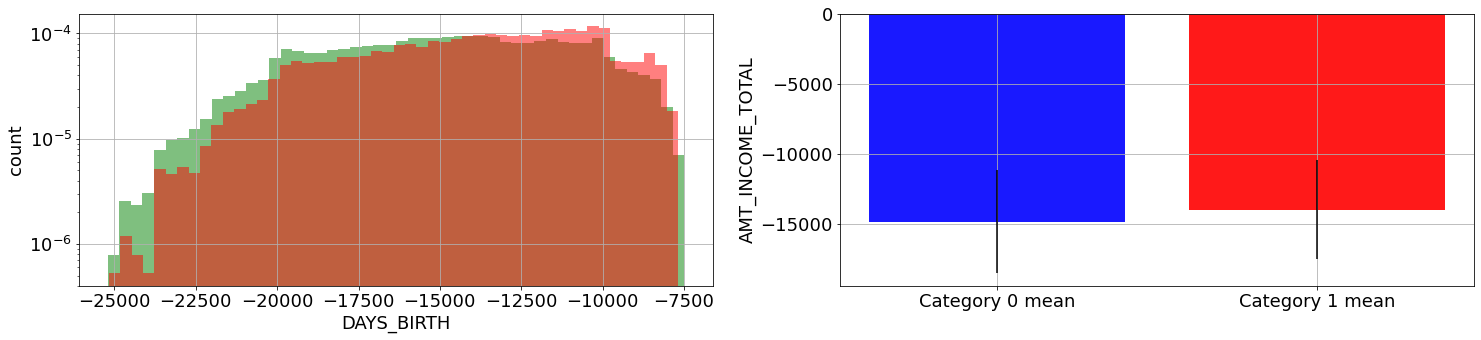

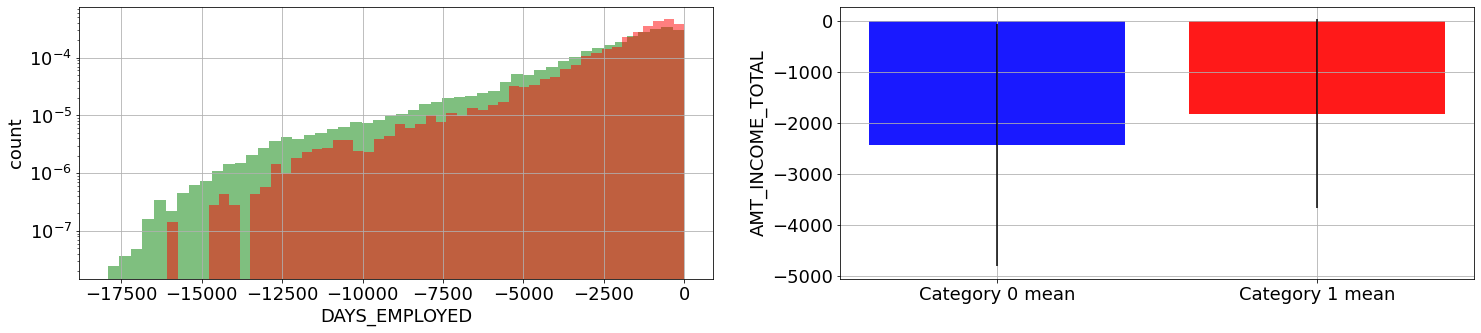

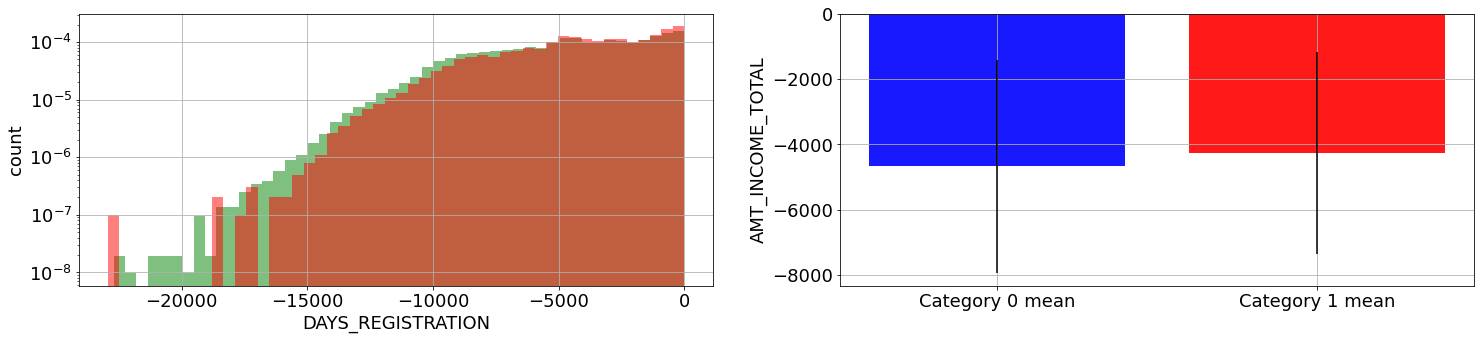

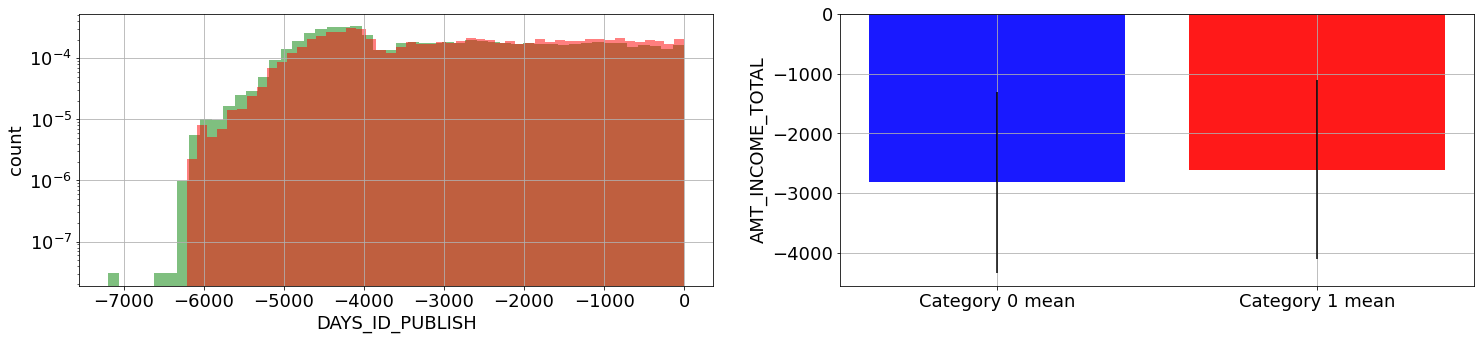

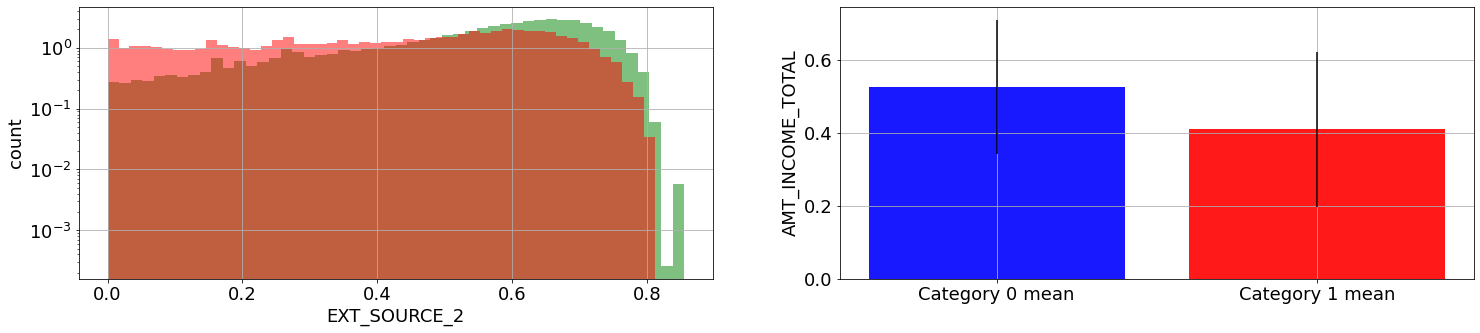

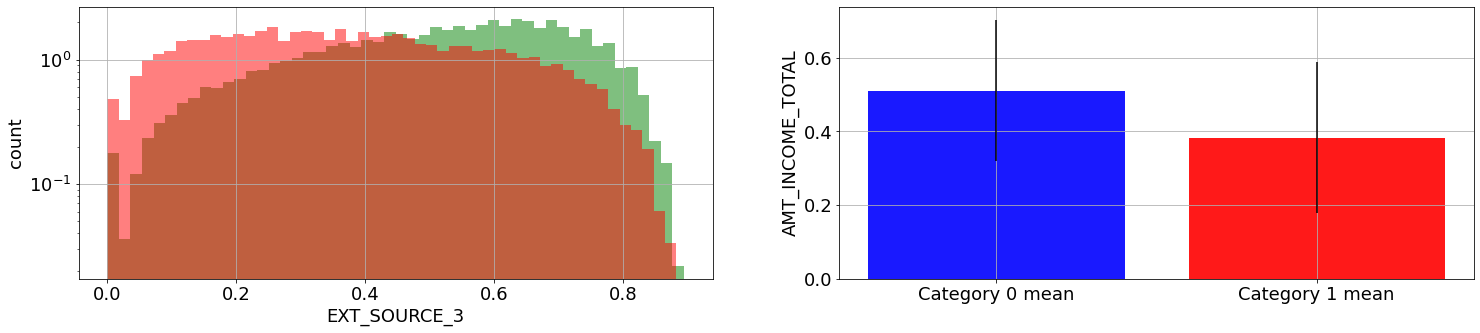

In [99]:
# Histograms of remaning features
plot_hist_mean(X_train_0,X_train_1,X_train_0_desc,X_train_1_desc)

It doesn't really change our statistics, but we've a cleaned data.
It seems we don't have outliers here. That's good.

# 5) Others DataFrames

a) Bureau

In [100]:
""" Max display on columns """

pd.set_option('display.max_columns', 17)
bureau.head(3)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

In [101]:
bureau.shape

(1716428, 17)

In [102]:
""" Max display on columns """

pd.set_option('display.max_columns', 17)
bureau.head(3)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN

In [103]:
bureau.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

The only interesting thing we learn with this DataFrame is that bureau almost never make prolongation.

### b) Bureau_balance

In [104]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

Nothing interesting.

### C) POS_CASH_balance

In [105]:
POS_CASH_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [106]:
POS_CASH_balance.shape

(10001358, 8)

Nothing interesting too.

### d) credit_card_balance

In [107]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  ...  CNT_DRAWINGS_ATM_CURRENT  \
0                         0.0  ...                       0.0   
1                         0.0  ...                       1.0   
2                         0.0  ...                       0.0   
3                         0.0  ...                       1.0   
4                         0.0  ...                       0.0   

   CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
0                     1                         0.0                       1.0   
1                     1                         0.0                       0.0   
2                     0                         0.0                       0.0   
3                     1                         0.0                       0.0   
4                     1                         0.0                       1.0   

   CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                       35.0                Active       0           0  
1                       69.0                Active       0           0  
2                       30.0                Active       0           0  
3                       10.0                Active       0           0  
4                      101.0                Active       0           0  

[5 rows x 23 columns]

In [108]:
""" Max display on columns """

pd.set_option('display.max_columns', 23)
credit_card_balance.head(7)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   
5     2646502      380010              -7    82903.815   
6     1079071      171320              -6   353451.645   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   
5                   270000                       0.0                   0.0   
6                   585000                   67500.0               67500.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   
5                         0.0                       0.0   
6                         0.0                       0.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   
5                 4449.105               3825.0                     3825.0   
6                14684.175              15750.0                    15750.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   
5                 80519.040      82773.315             82773.315   
6                345433.860     351881.145            351881.145   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   
5                       0.0                     0                         0.0   
6                       1.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   
5                       0.0                        2.0               Active   
6                       0.0                        6.0              

These features are relative to credit card using

### e) previous_application

In [109]:
""" Max display on columns """

pd.set_option('display.max_columns', 37)
previous_application.head(4)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0

In [110]:
data_lot_nan = previous_application[previous_application.columns[previous_application.isnull().mean(axis=0)>=0.3]]

In [111]:
# Dropping columns with lot of Nan
previous_application.drop(data_lot_nan, axis = 1, inplace = True)

In [112]:
previous_application.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### Trying to understand reasons of refuse

In [113]:
# Data_refused
refused = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Refused']
# Data_approved
approved = previous_application[previous_application['NAME_CONTRACT_STATUS'] == 'Approved']

In [114]:
ref = refused.dropna()
app = approved.dropna()

In [115]:
app.shape

(993938, 26)

In [116]:
ref.shape

(240969, 26)

In [117]:
ref_describe = ref.describe()
app_describe = app.describe()

<ipython-input-118-6a223fb39635>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


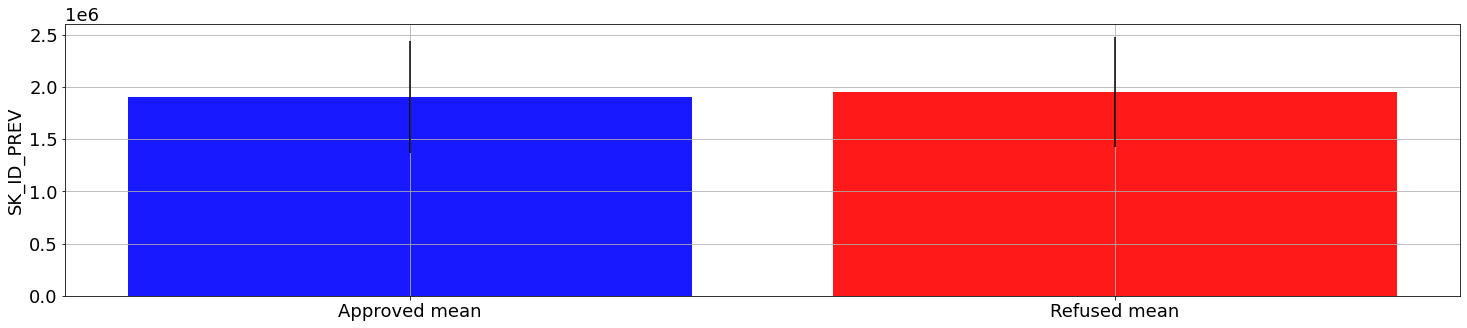

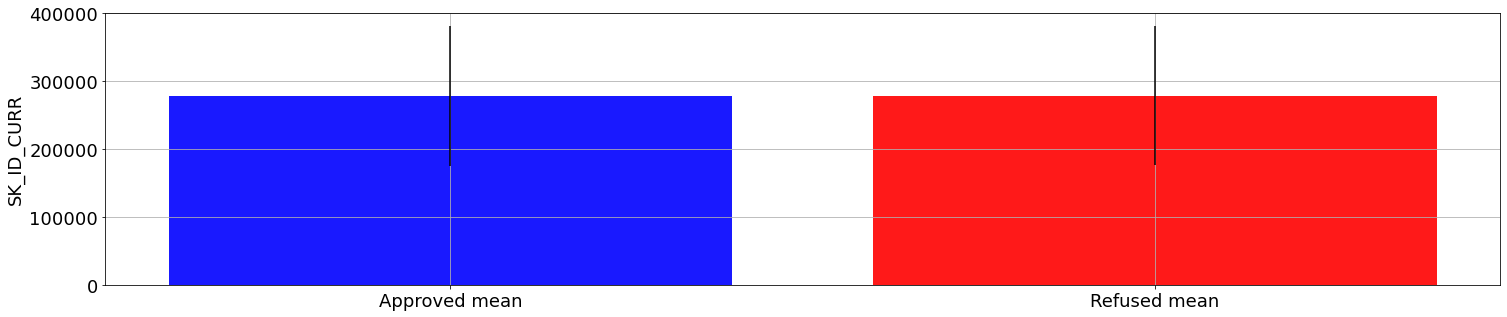

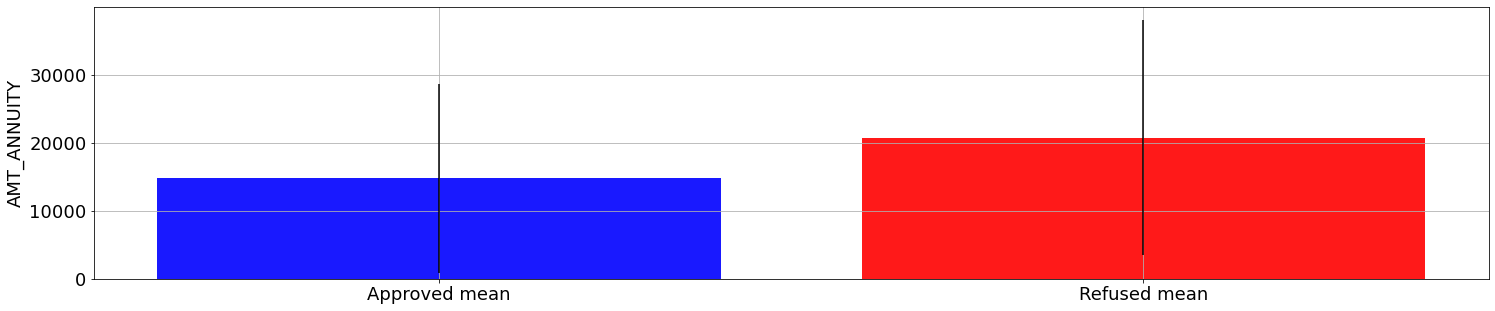

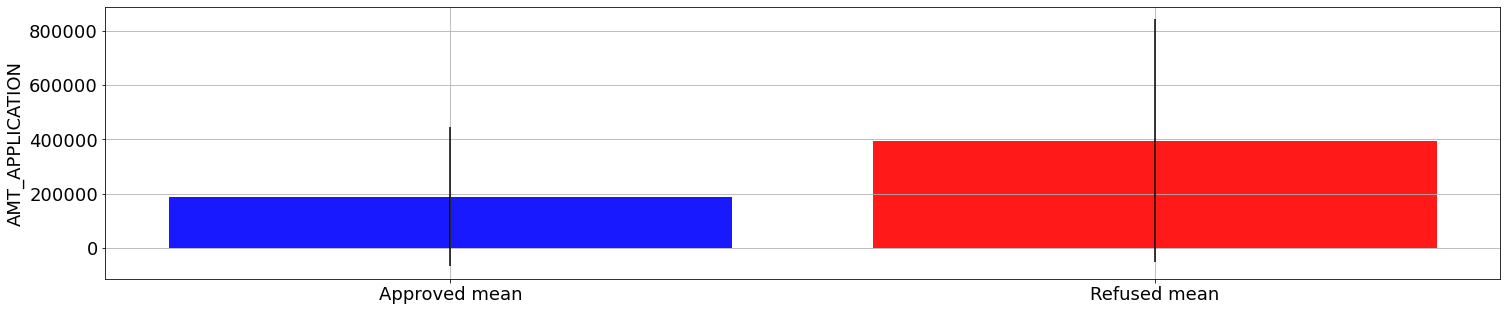

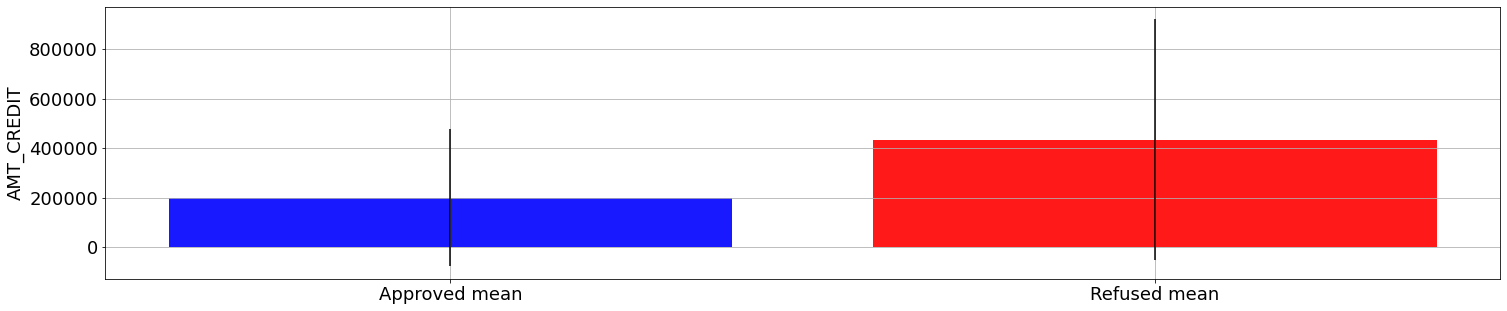

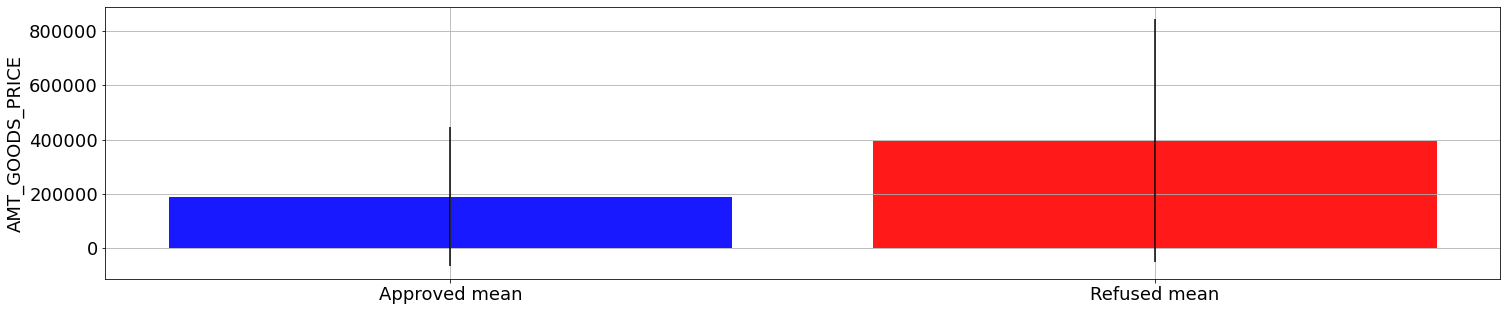

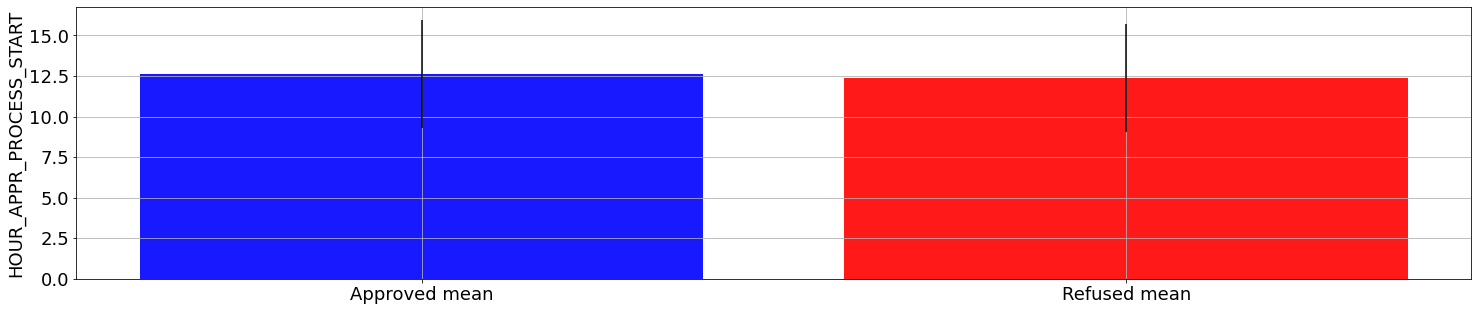

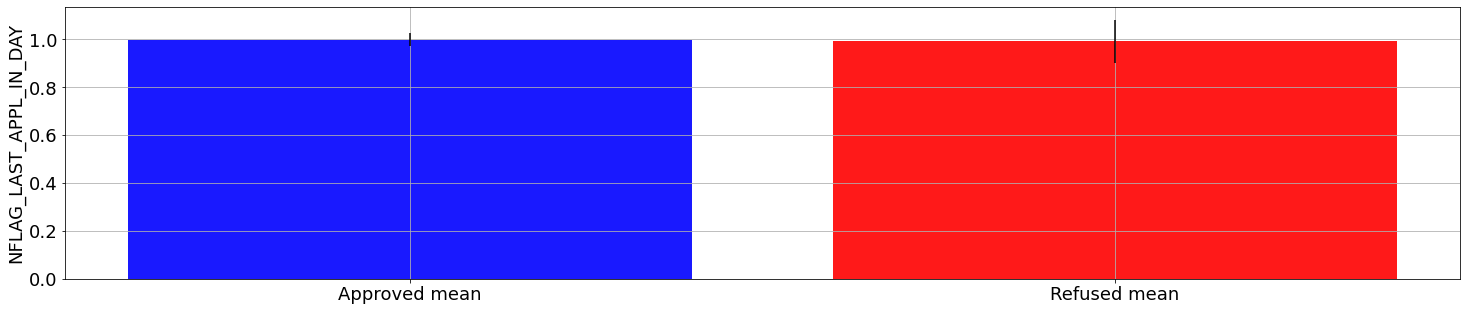

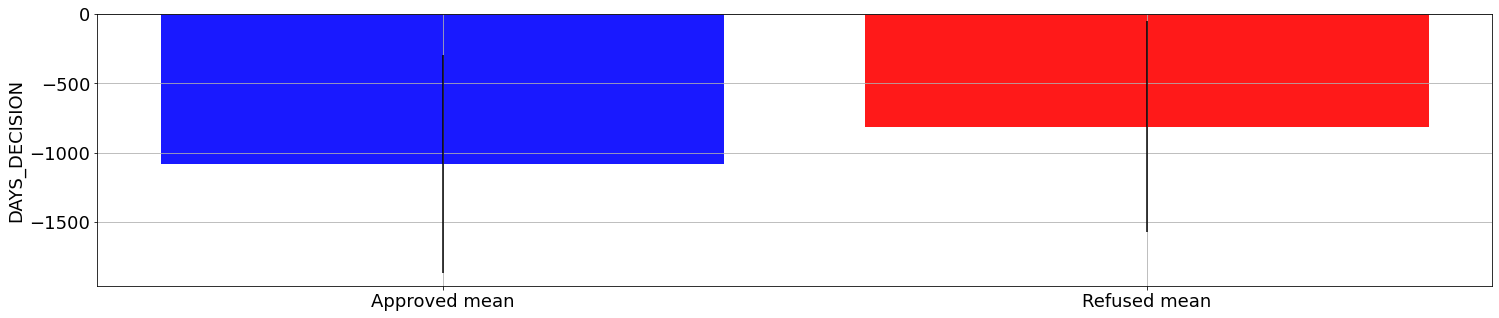

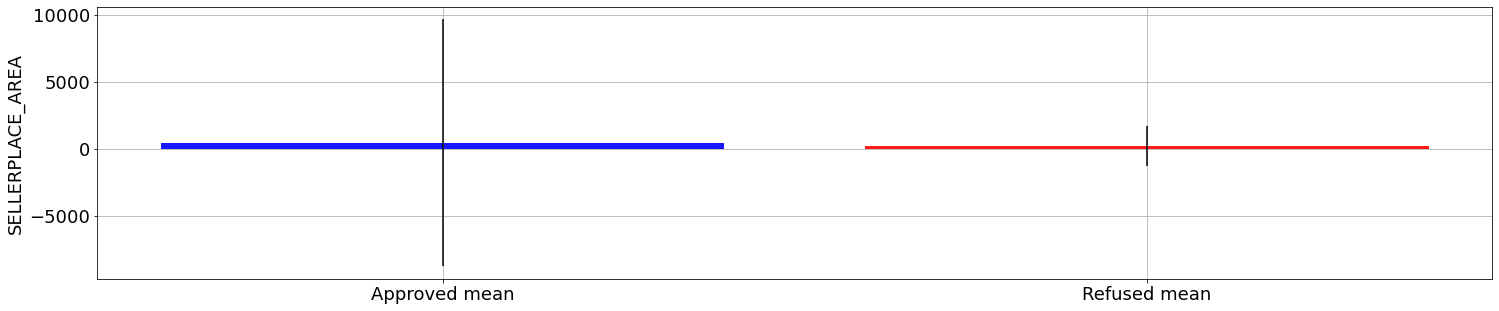

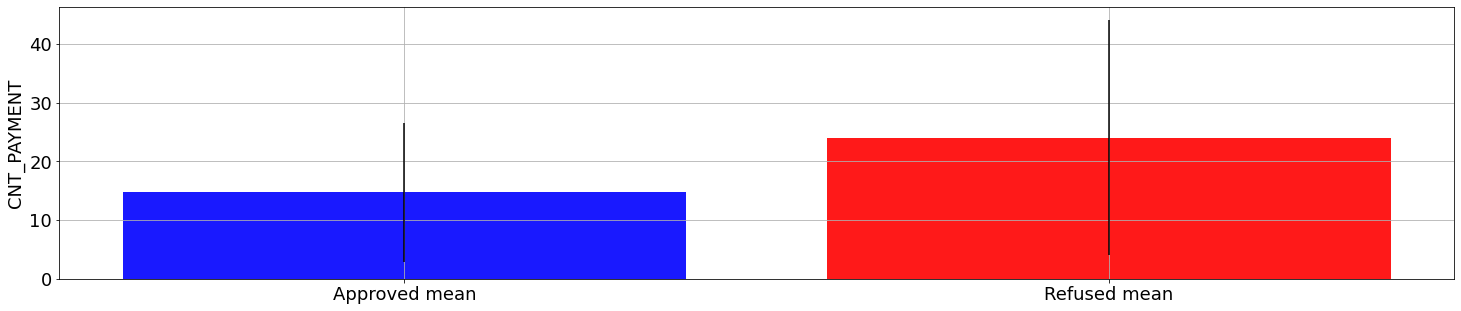

In [118]:
for column in app_describe.columns:

    # 2 columns for figure
    fig, ax = plt.subplots(ncols= 1, figsize=(25,5),facecolor='w')
    
    plt.rcParams["font.size"] = 18

    
    
    # Grid
    ax.grid(True)

    ax.set_ylabel(str(column))

    # Plotting means and stud with yerr
    x0 = 'Approved mean'
    x1 = 'Refused mean'

    ax.bar([x0, x1] ,[app_describe[column]['mean'],ref_describe[column]['mean']], 
            yerr = [app_describe[column]['std'],ref_describe[column]['std']], color = ['blue', 'red'], alpha = 0.9)
    fig.show()

An interesting thing we can notice :
'amount_annuity', 'amount_application', 'amount_credit' and 'amount_good_price' are widely higher for 'refused' credit than for 'approved' credit.
It confirms that these features are really important for bureau credit.


Here we want to know the maximum sum of credit accepted.

In [119]:
app_describe

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  9.939380e+05  993938.000000  993938.000000     9.939380e+05   
mean   1.903439e+06  278230.145163   14766.647884     1.883484e+05   
std    5.356030e+05  102800.972247   13928.884157     2.561818e+05   
min    1.000001e+06  100001.000000       0.000000     0.000000e+00   
25%    1.434969e+06  189225.000000    5940.157500     4.702500e+04   
50%    1.896362e+06  278461.000000   10429.695000     9.670950e+04   
75%    2.368839e+06  367279.000000   18222.120000     2.068954e+05   
max    2.843499e+06  456255.000000  393868.665000     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  9.939380e+05     9.939380e+05            993938.000000   
mean   1.996247e+05     1.883484e+05                12.626337   
std    2.774585e+05     2.561818e+05                 3.324099   
min    0.000000e+00     0.000000e+00                 0.000000   
25%    4.668750e+04     4.702500e+04                10.000000   
50%    9.882000e+04     9.670950e+04                12.000000   
75%    2.203020e+05     2.068954e+05                15.000000   
max    4.509688e+06     5.850000e+06                23.000000   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  
count           993938.000000  993938.000000      9.939380e+05  993938.000000  
mean                 0.999329   -1081.331870      4.499903e+02      14.730671  
std                  0.025896     783.017831      9.204526e+03      11.845811  
min                  0.000000   -2922.000000     -1.000000e+00       0.000000  
25%                  1.000000   -1613.000000     -1.000000e+00       6.000000  
50%                  1.000000    -845.000000      3.600000e+01      12.000000  
75%                  1.000000    -446.000000      1.670000e+02      18.000000  
max                  1.000000      -1.000000      4.000000e+06      84.000000

In [120]:
app_describe['AMT_APPLICATION']['max']

5850000.0

### f) installment_payments

In [121]:
""" Max display on columns """

pd.set_option('display.max_columns', 37)
installments_payments.head(4)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130

# Final features

X_train_0, X_train_1 and reduced_X_test are our final DataFrames

In [122]:
X_train_0.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   
5      100008       0             0           99000.0    490495.5   

   AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1      35698.5        1129500.0      -16765          -1188            -1186.0   
2       6750.0         135000.0      -19046           -225            -4260.0   
3      29686.5         297000.0      -19005          -3039            -9833.0   
4      21865.5         513000.0      -19932          -3038            -4311.0   
5      27517.5         454500.0      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3  
1             -291      0.622246           NaN  
2            -2531      0.555912      0.729567  
3            -2437      0.650442           NaN  
4            -3458      0.322738           NaN  
5             -477      0.354225      0.621226

In [123]:
X_train_0.to_csv('/Users/vanes/OneDrive/Documents/Python Scripts/credit_final.csv')

## 1) Transforming / Creating new features

"DAYS_BIRTH"

In [124]:
# Negative values for ages are not simple to use
X_train_0['DAYS_BIRTH']=abs(X_train_0['DAYS_BIRTH'])
X_train_1['DAYS_BIRTH']=abs(X_train_1['DAYS_BIRTH'])
reduced_X_test['DAYS_BIRTH']=abs(reduced_X_test['DAYS_BIRTH'])

In [125]:
# Converting in years
X_train_0['DAYS_BIRTH']= X_train_0['DAYS_BIRTH'] / 365
X_train_1['DAYS_BIRTH']= X_train_1['DAYS_BIRTH'] / 365
reduced_X_test['DAYS_BIRTH']= reduced_X_test['DAYS_BIRTH'] / 365

Text(0.5, 1.0, 'Distribution of Ages')

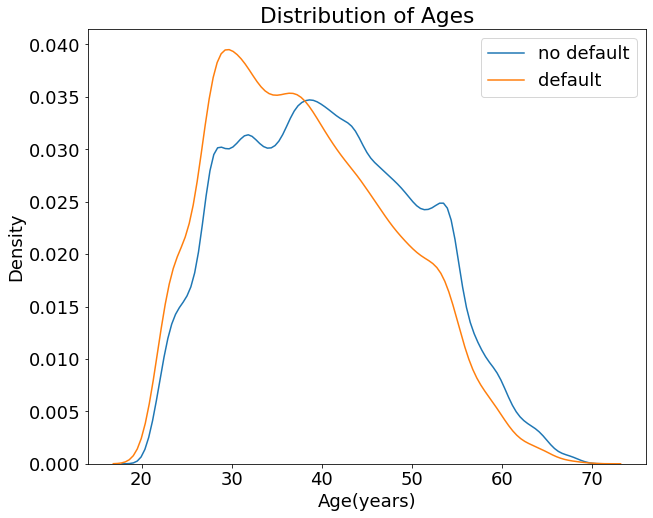

In [126]:
plt.figure(figsize=(10,8))


sns.kdeplot(X_train_0['DAYS_BIRTH'],label='no default')

 
sns.kdeplot(X_train_1['DAYS_BIRTH'],label='default')

plt.xlabel('Age(years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')


Here it could be better to categorize ages for ML

In [127]:
X_train_0['AGE']=pd.cut(X_train_0['DAYS_BIRTH'],bins=np.linspace(20,70,num=11))
X_train_1['AGE']=pd.cut(X_train_1['DAYS_BIRTH'],bins=np.linspace(20,70,num=11))
reduced_X_test['AGE']=pd.cut(reduced_X_test['DAYS_BIRTH'],bins=np.linspace(20,70,num=11))

In [128]:
# Check
X_train_0['AGE']

1         (45.0, 50.0]
2         (50.0, 55.0]
3         (50.0, 55.0]
4         (50.0, 55.0]
5         (45.0, 50.0]
              ...     
307503    (30.0, 35.0]
307504    (45.0, 50.0]
307506    (25.0, 30.0]
307508    (40.0, 45.0]
307510    (45.0, 50.0]
Name: AGE, Length: 230302, dtype: category
Categories (10, interval[float64]): [(20.0, 25.0] < (25.0, 30.0] < (30.0, 35.0] < (35.0, 40.0] ... (50.0, 55.0] < (55.0, 60.0] < (60.0, 65.0] < (65.0, 70.0]]

In [129]:
# Let's see our cut on all trainset
reduced_X_train['DAYS_BIRTH']=abs(reduced_X_train['DAYS_BIRTH'])
reduced_X_train['DAYS_BIRTH']= reduced_X_train['DAYS_BIRTH'] / 365
reduced_X_train['AGE']=pd.cut(reduced_X_train['DAYS_BIRTH'],bins=np.linspace(20,70,num=11))

In [130]:
# Grouping to get means
age_groups  = reduced_X_train.groupby('AGE').mean()

Text(0.5, 1.0, 'Default payment by Age Group')

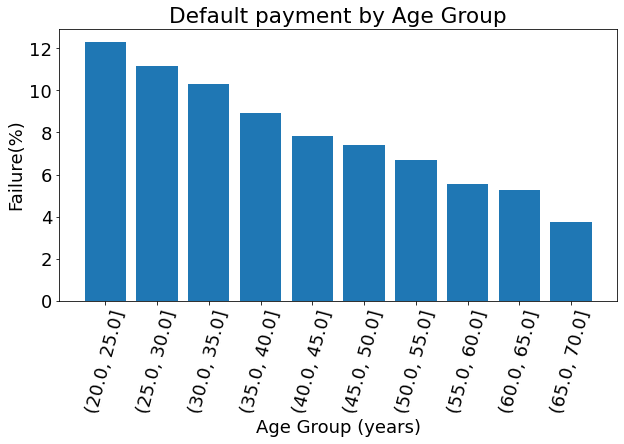

In [131]:
plt.figure(figsize=(10,5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure(%)')
plt.title('Default payment by Age Group')


### "DAYS_EMPLOYED"

In [132]:
# Negative values for days_employed are not simple to use
X_train_0['DAYS_EMPLOYED']=abs(X_train_0['DAYS_EMPLOYED'])
X_train_1['DAYS_EMPLOYED']=abs(X_train_1['DAYS_EMPLOYED'])
reduced_X_test['DAYS_EMPLOYED']=abs(reduced_X_test['DAYS_EMPLOYED'])

### Creating New features

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
- GOODS_PERCENT_CREDIT : the percentage for credit for goods

In [133]:
X_train_0['CREDIT_INCOME_PERCENT'] = X_train_0['AMT_CREDIT'] / X_train_0['AMT_INCOME_TOTAL']
X_train_0['ANNUITY_INCOME_PERCENT'] = X_train_0['AMT_ANNUITY'] / X_train_0['AMT_INCOME_TOTAL']
X_train_0['CREDIT_ANNUITY_PERCENT'] = X_train_0['AMT_ANNUITY'] / X_train_0['AMT_CREDIT']
X_train_0['CREDIT_GOOD_PERCENT'] = X_train_0['AMT_CREDIT'] / X_train_0['AMT_GOODS_PRICE']

In [134]:
# X_train_1
X_train_1['CREDIT_INCOME_PERCENT'] = X_train_1['AMT_CREDIT'] / X_train_1['AMT_INCOME_TOTAL']
X_train_1['ANNUITY_INCOME_PERCENT'] = X_train_1['AMT_ANNUITY'] / X_train_1['AMT_INCOME_TOTAL']
X_train_1['CREDIT_ANNUITY_PERCENT'] = X_train_1['AMT_ANNUITY'] / X_train_1['AMT_CREDIT']
X_train_1['CREDIT_GOOD_PERCENT'] = X_train_1['AMT_CREDIT'] / X_train_1['AMT_GOODS_PRICE']

In [135]:
# reduced_X_test
reduced_X_test['CREDIT_INCOME_PERCENT'] = reduced_X_test['AMT_CREDIT'] / reduced_X_test['AMT_INCOME_TOTAL']
reduced_X_test['ANNUITY_INCOME_PERCENT'] = reduced_X_test['AMT_ANNUITY'] / reduced_X_test['AMT_INCOME_TOTAL']
reduced_X_test['CREDIT_ANNUITY_PERCENT'] = reduced_X_test['AMT_ANNUITY'] / reduced_X_test['AMT_CREDIT']
reduced_X_test['CREDIT_GOOD_PERCENT'] = reduced_X_test['AMT_CREDIT'] / reduced_X_test['AMT_GOODS_PRICE']

### "DAYS_REGISTRATION"

In [136]:
# Negative values for DAYS_REGISTRATION are not simple to use
X_train_0['DAYS_REGISTRATION']=abs(X_train_0['DAYS_REGISTRATION'])
X_train_1['DAYS_REGISTRATION']=abs(X_train_1['DAYS_REGISTRATION'])
reduced_X_test['DAYS_REGISTRATION']=abs(reduced_X_test['DAYS_REGISTRATION'])

### "DAYS_ID_PUBLISH"

In [137]:
# Negative values for DAYS_REGISTRATION are not simple to use
X_train_0['DAYS_ID_PUBLISH']= abs(X_train_0['DAYS_ID_PUBLISH'])
X_train_1['DAYS_ID_PUBLISH']= abs(X_train_1['DAYS_ID_PUBLISH'])
reduced_X_test['DAYS_ID_PUBLISH']= abs(reduced_X_test['DAYS_ID_PUBLISH'])

In [138]:
X_train_0.shape

(230302, 18)

In [139]:
X_train_1.shape

(21835, 18)

In [140]:
reduced_X_test.shape

(39470, 17)

In [141]:
# Dropping days_birth because we've categorized ages
X_train_0.drop(['DAYS_BIRTH'], axis = 1, inplace = True)
X_train_1.drop(['DAYS_BIRTH'], axis = 1, inplace = True)
reduced_X_test.drop(['DAYS_BIRTH'], axis = 1, inplace = True)

In [142]:
""" Max display on columns """

pd.set_option('display.max_columns', 17)
X_train_0.head(4)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1      35698.5        1129500.0           1188             1186.0   
2       6750.0         135000.0            225             4260.0   
3      29686.5         297000.0           3039             9833.0   
4      21865.5         513000.0           3038             4311.0   

   DAYS_ID_PUBLISH  EXT_SOURCE_2  EXT_SOURCE_3           AGE  \
1              291      0.622246           NaN  (45.0, 50.0]   
2             2531      0.555912      0.729567  (50.0, 55.0]   
3             2437      0.650442           NaN  (50.0, 55.0]   
4             3458      0.322738           NaN  (50.0, 55.0]   

   CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_ANNUITY_PERCENT  \
1               4.790750                0.132217                0.027598   
2               2.000000                0.100000                0.050000   
3               2.316167                0.219900                0.094941   
4               4.222222                0.179963                0.042623   

   CREDIT_GOOD_PERCENT  
1             1.145199  
2             1.000000  
3             1.052803  
4             1.000000

## NEW STATISTICS

In [143]:
ref_describe = X_train_1.describe()
app_describe = X_train_0.describe()

<ipython-input-144-6a223fb39635>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


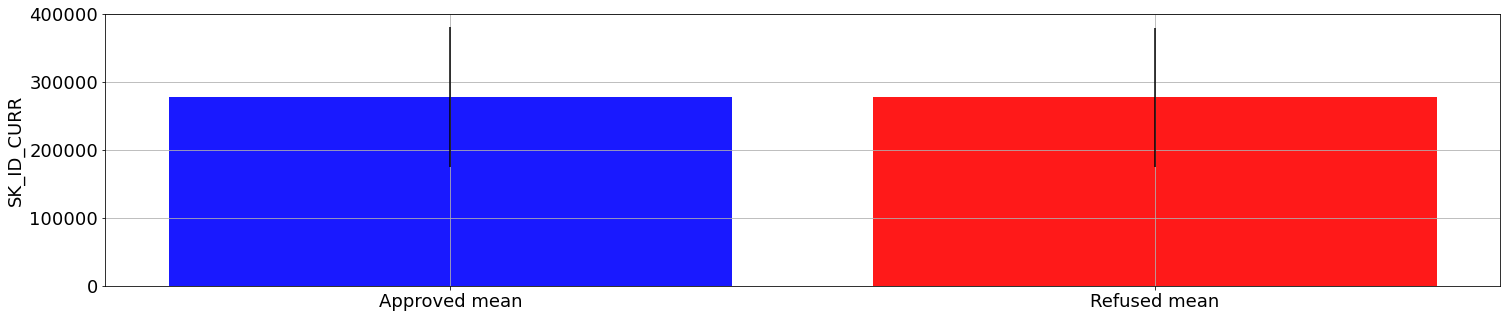

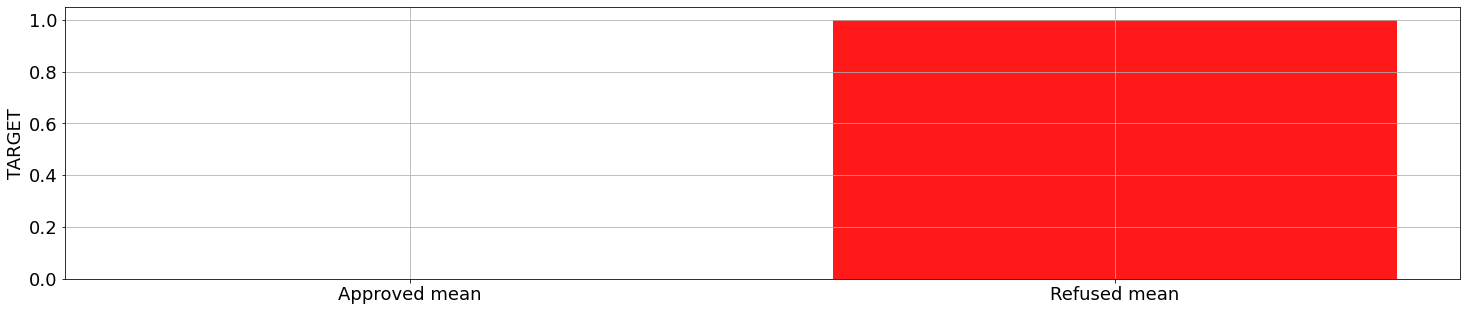

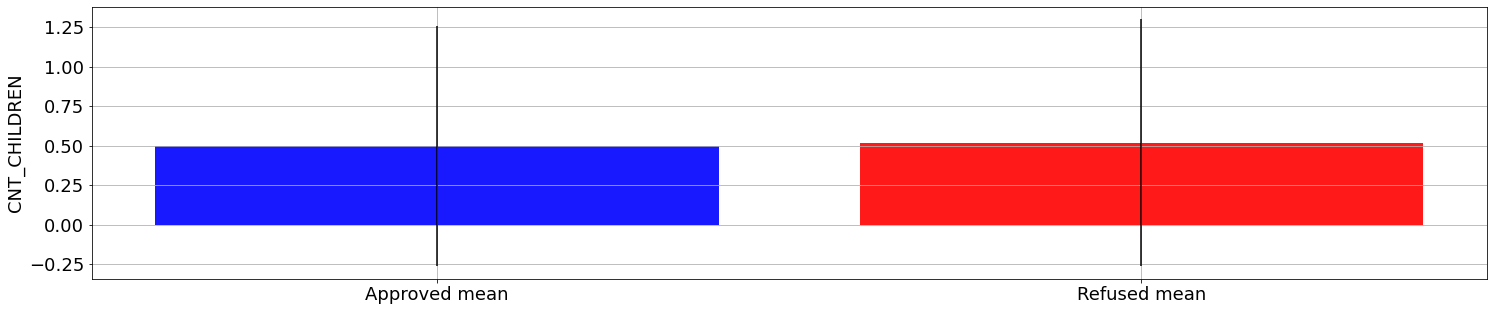

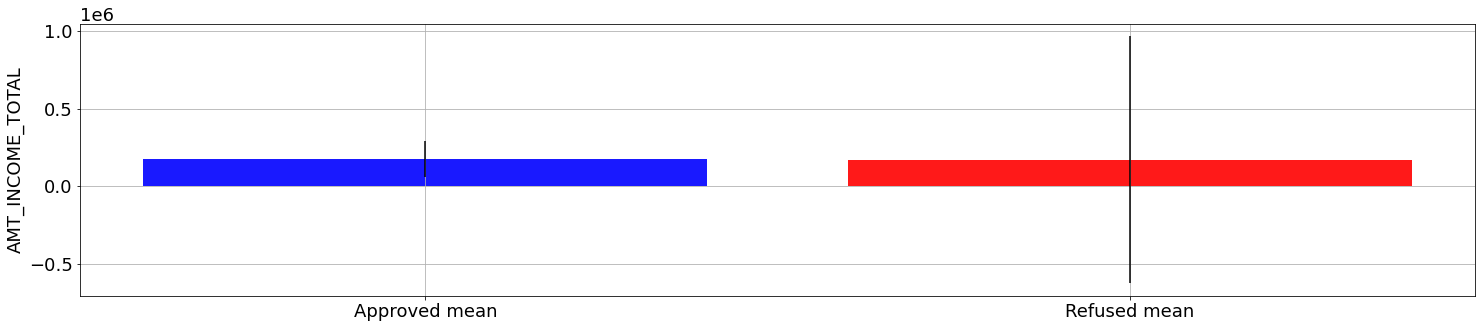

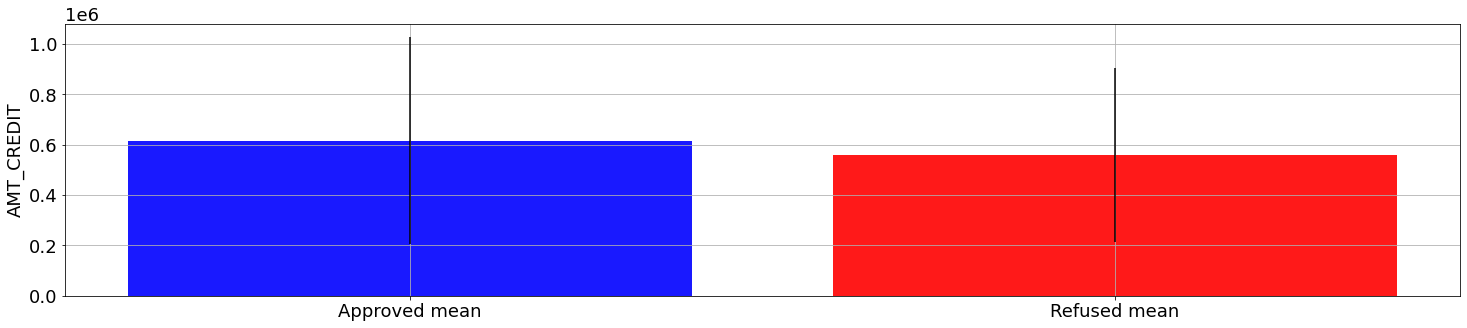

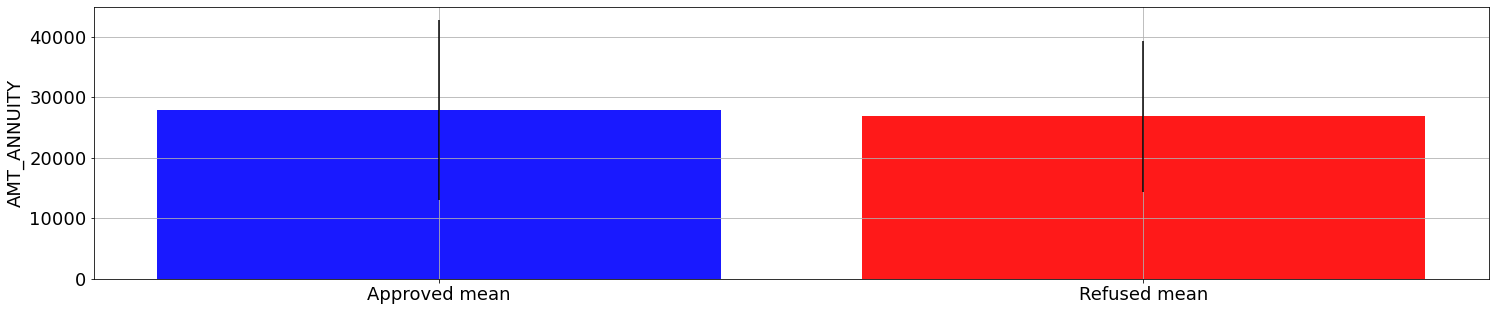

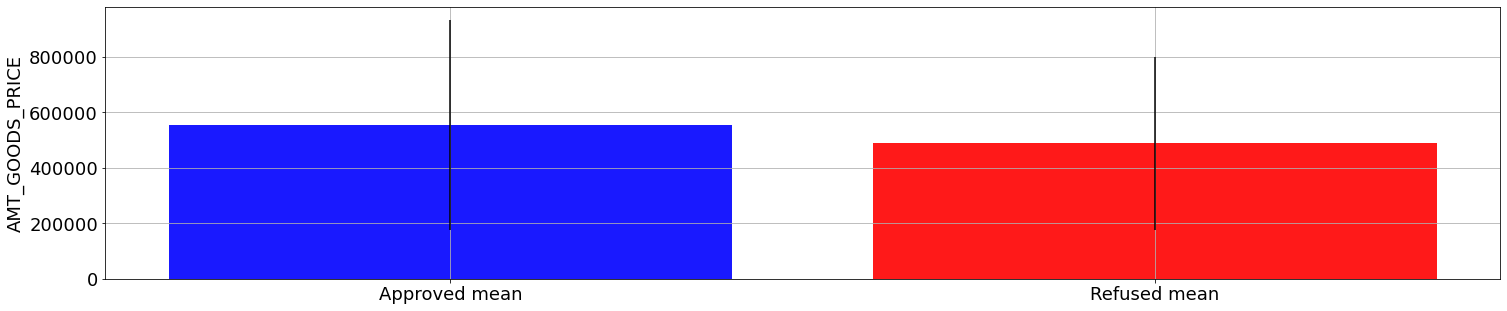

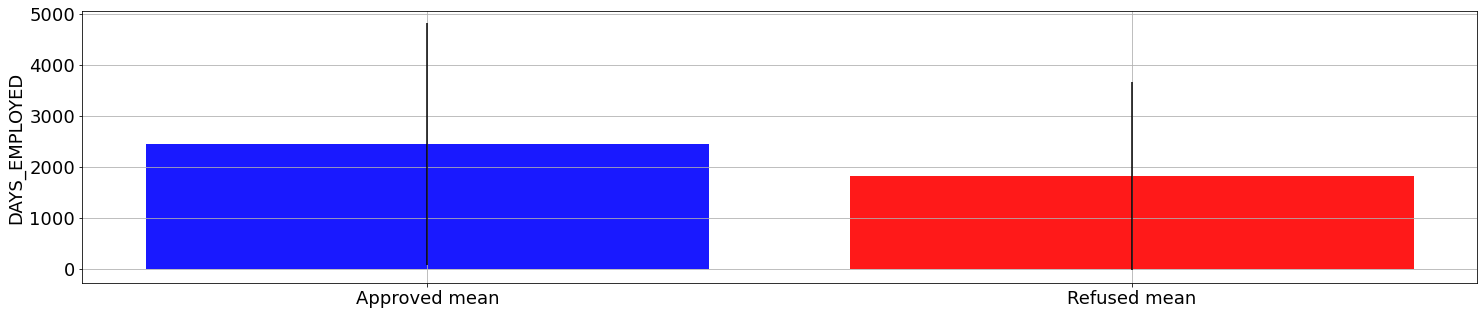

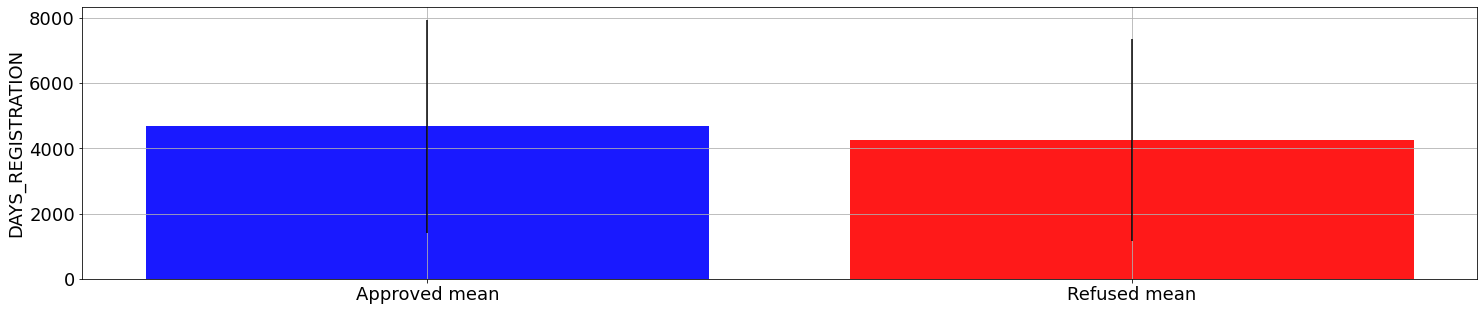

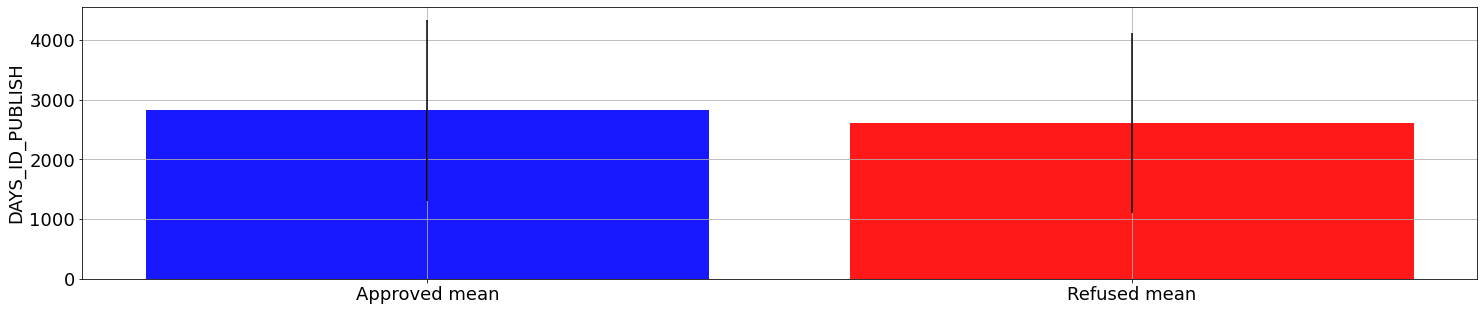

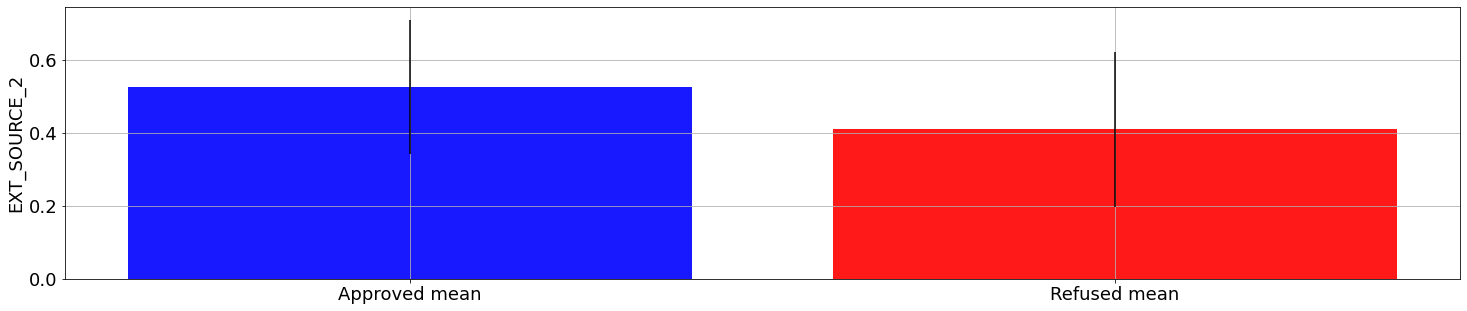

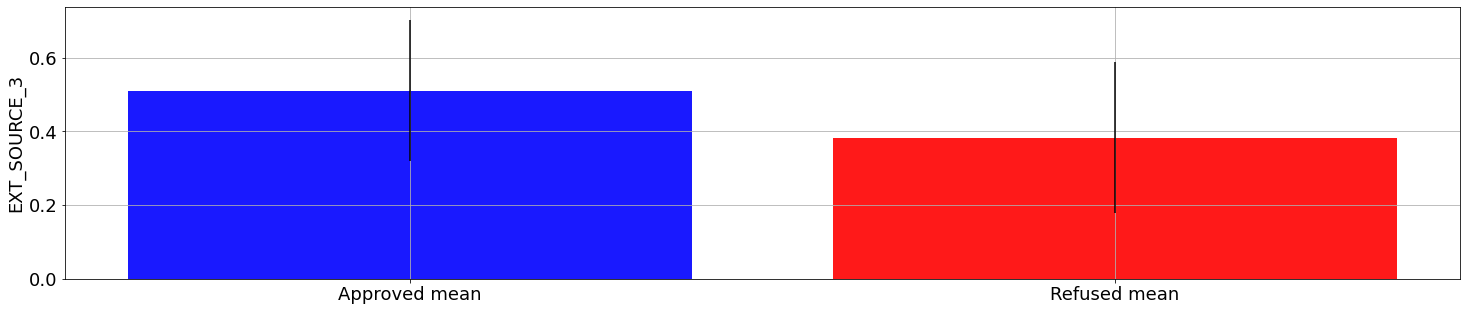

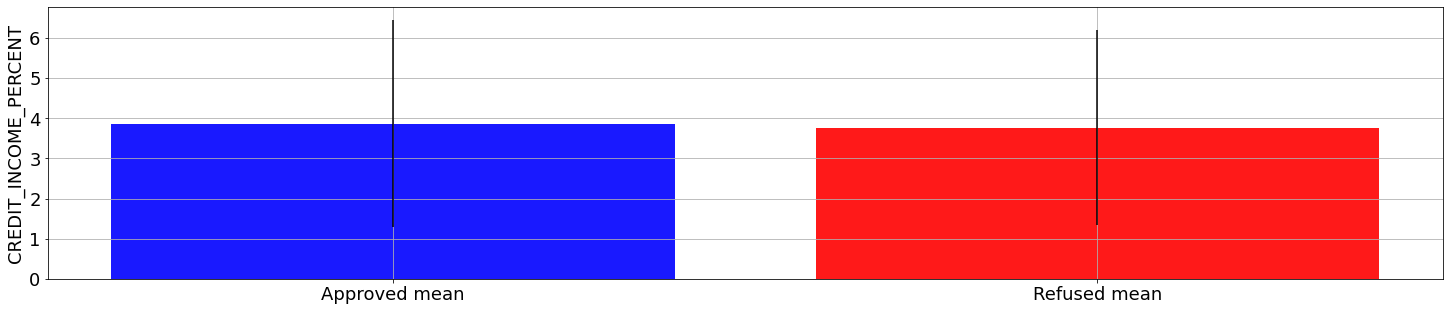

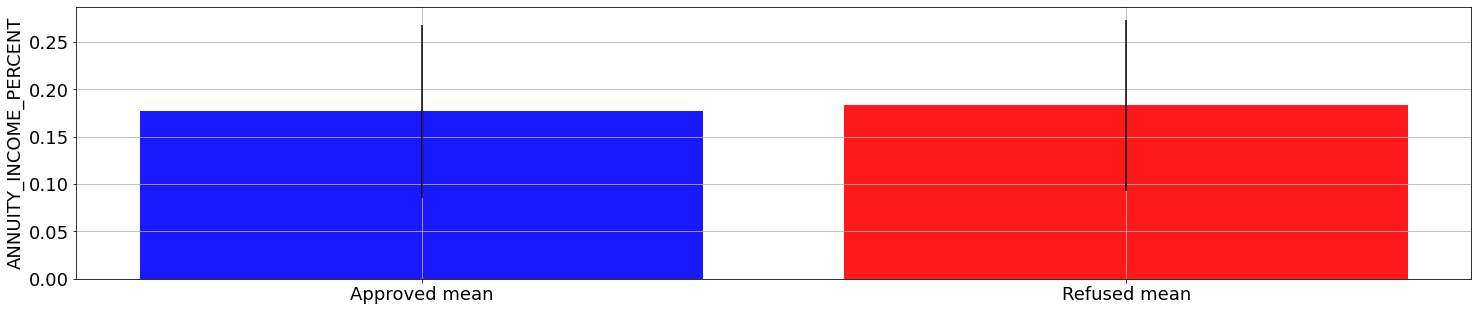

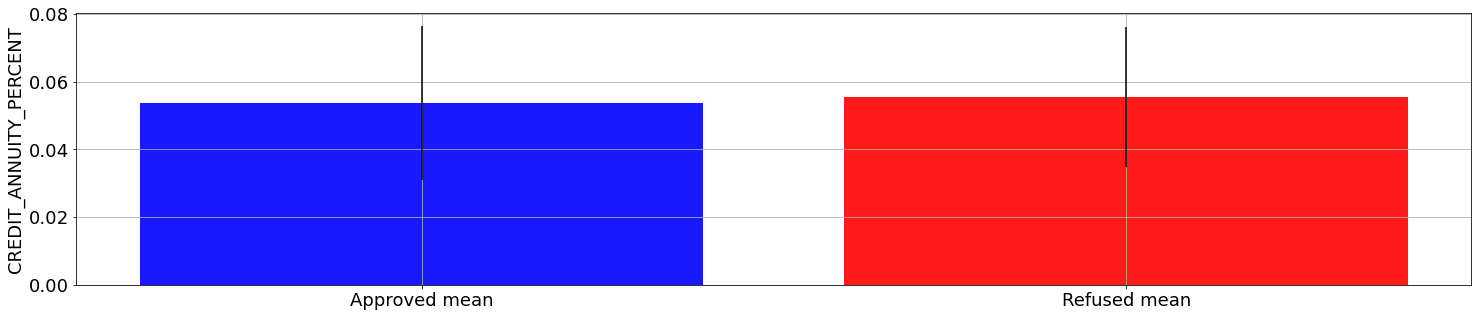

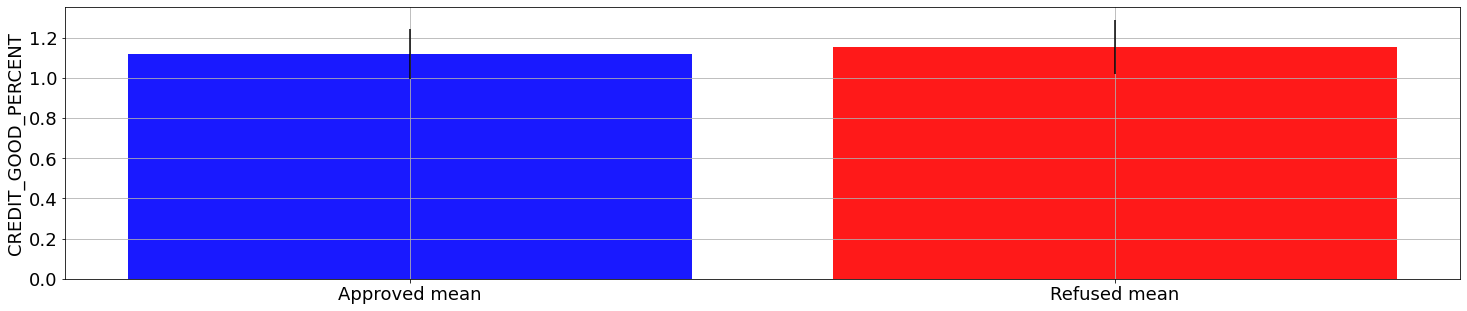

In [144]:
for column in app_describe.columns:

    # 2 columns for figure
    fig, ax = plt.subplots(ncols= 1, figsize=(25,5),facecolor='w')
    
    plt.rcParams["font.size"] = 18

    
    
    # Grid
    ax.grid(True)

    ax.set_ylabel(str(column))

    # Plotting means and stud with yerr
    x0 = 'Approved mean'
    x1 = 'Refused mean'

    ax.bar([x0, x1] ,[app_describe[column]['mean'],ref_describe[column]['mean']], 
            yerr = [app_describe[column]['std'],ref_describe[column]['std']], color = ['blue', 'red'], alpha = 0.9)
    fig.show()

## NAN

In [145]:
''' Function which prints number of missing values and percentage per column'''
def missing_values_table(df):
    # Nan count
    mis_val=df.isnull().sum()
    
    # Percentage of nans
    mis_val_percent=100*df.isnull().sum()/len(df)
    
    # Creating a new table
    mis_val_table=pd.concat([mis_val, mis_val_percent],axis=1)
    
    # Renaming
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})

    # 
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)

    
    return mis_val_table_ren_columns

In [146]:
missing_values_table(X_train_0)

Missing Values  % of Total Values
EXT_SOURCE_3                     44923               19.5
EXT_SOURCE_2                       459                0.2
AMT_GOODS_PRICE                    237                0.1
CREDIT_GOOD_PERCENT                237                0.1
AMT_ANNUITY                         12                0.0
ANNUITY_INCOME_PERCENT              12                0.0
CREDIT_ANNUITY_PERCENT              12                0.0

In [147]:
missing_values_table(X_train_1)

Missing Values  % of Total Values
EXT_SOURCE_3                   4973               22.8
EXT_SOURCE_2                     45                0.2
AMT_GOODS_PRICE                  19                0.1
CREDIT_GOOD_PERCENT              19                0.1

In [148]:
missing_values_table(reduced_X_test)

Missing Values  % of Total Values
EXT_SOURCE_3                      7115               18.0
AMT_ANNUITY                         21                0.1
ANNUITY_INCOME_PERCENT              21                0.1
CREDIT_ANNUITY_PERCENT              21                0.1
EXT_SOURCE_2                         7                0.0

In [149]:
X_train_0_cleaned = X_train_0.dropna()
X_train_1_cleaned = X_train_1.dropna()
reduced_X_test_cleaned = reduced_X_test.dropna()

In [150]:
print('number remaining if we drop nans : ')
print('\n')
print('X_train_0 : {}      X_train_1 : {}     reduced_X_test : {}'.format(X_train_0_cleaned.shape[0]-1, X_train_1_cleaned.shape[0]-1,reduced_X_test_cleaned.shape[0]-1))


number remaining if we drop nans : 


X_train_0 : 184900      X_train_1 : 16817     reduced_X_test : 32336


## X_train / concatenate both

In [151]:
X_train = pd.concat([X_train_0, X_train_1])

In [152]:
# Dropping Nans
X_train.dropna(inplace = True)

In [153]:
# Dropping Nans
reduced_X_test.dropna(inplace = True)

## FINAL STATS

In [154]:
X_train0 = X_train[X_train['TARGET']==0]

In [155]:
X_train1 =  X_train[X_train['TARGET']==1]

In [156]:
# Describe
X_train0_describe = X_train0.describe()
X_train1_describe = X_train1.describe()

<ipython-input-157-09ac0c98b535>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


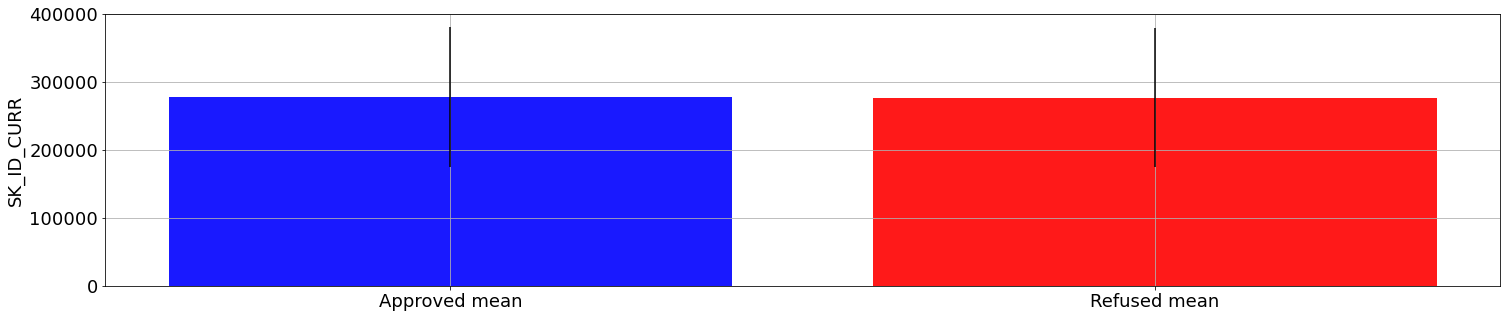

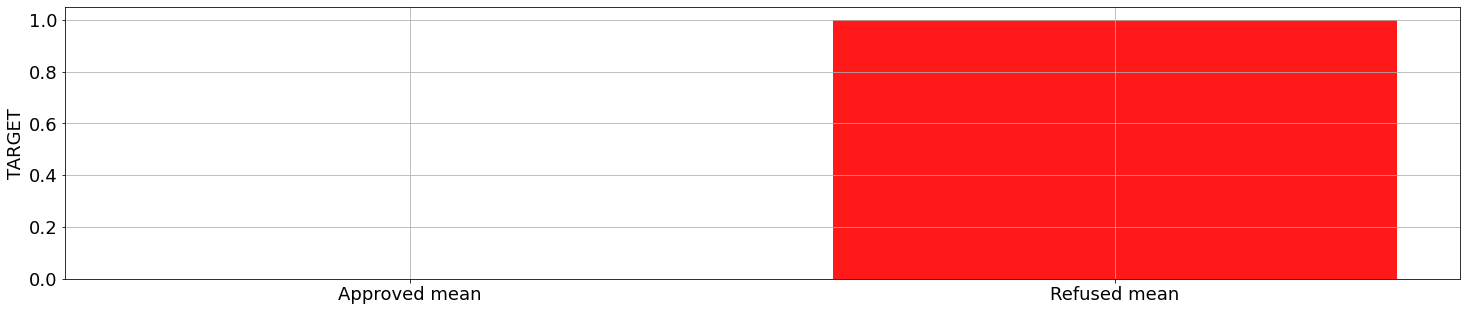

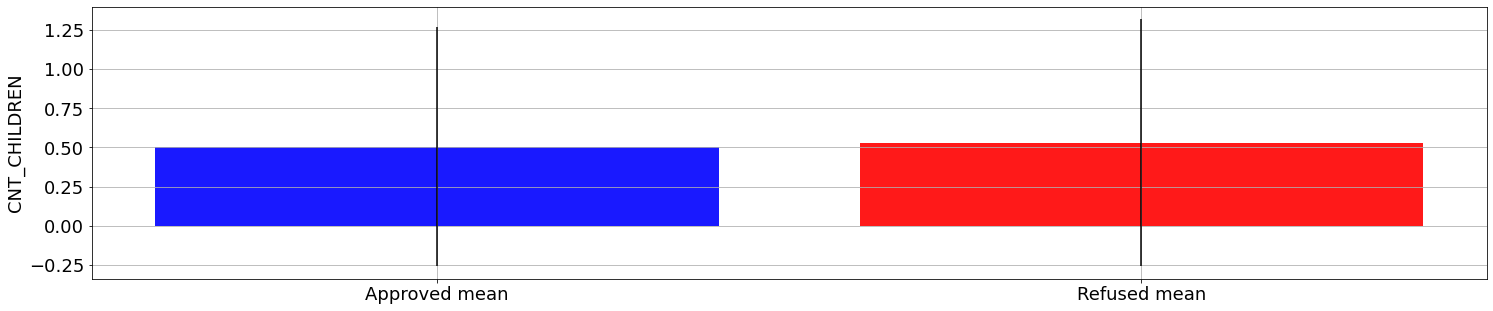

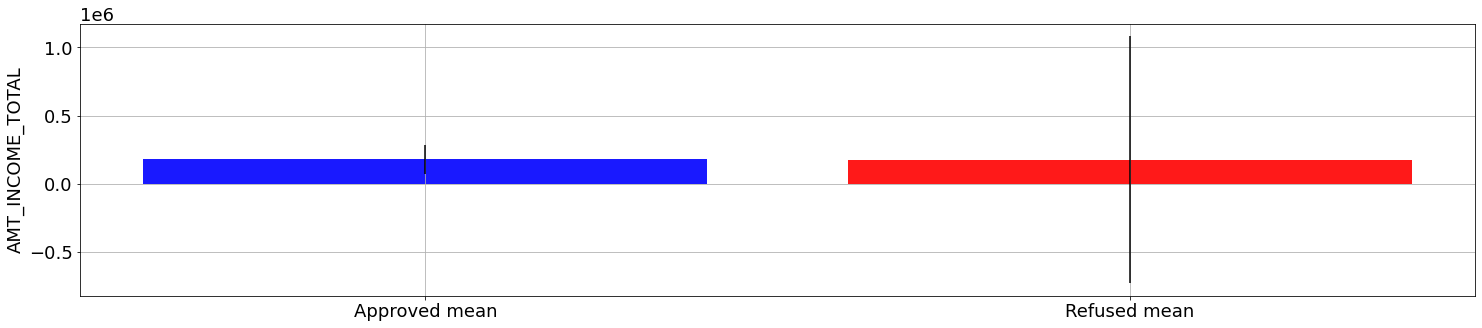

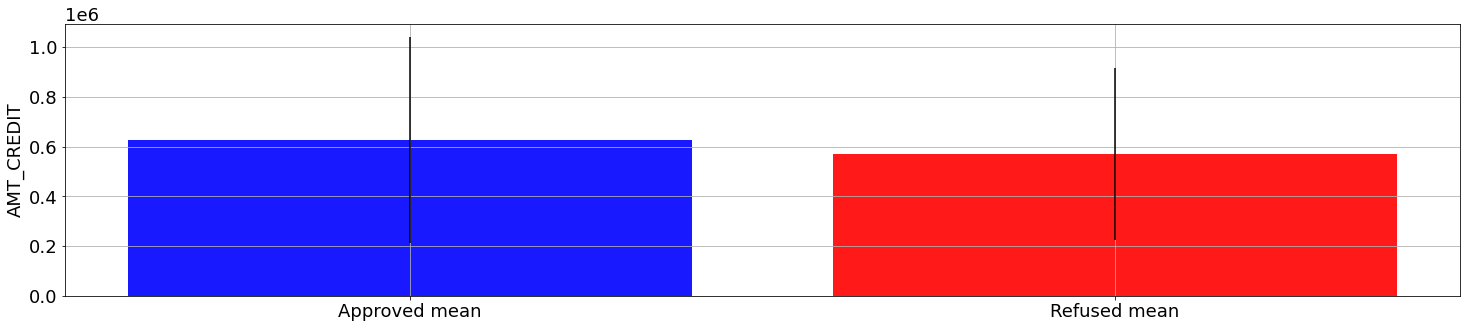

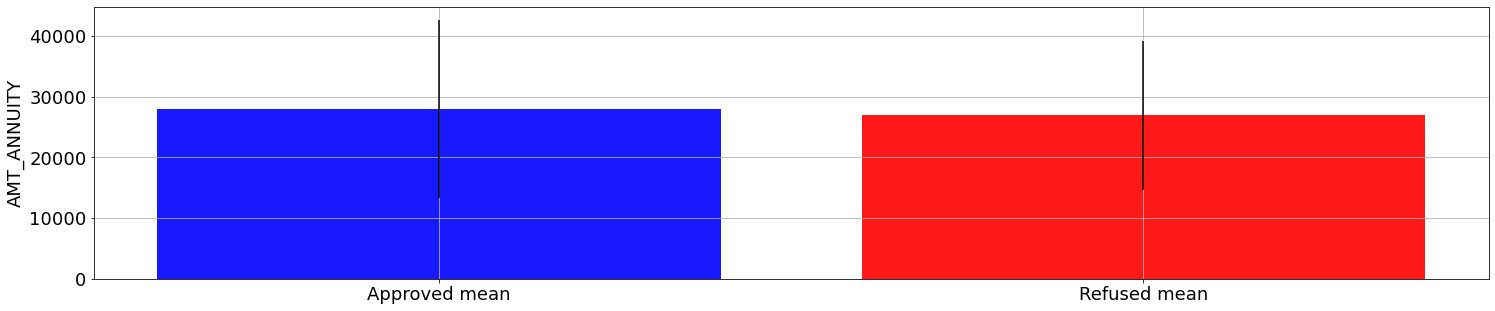

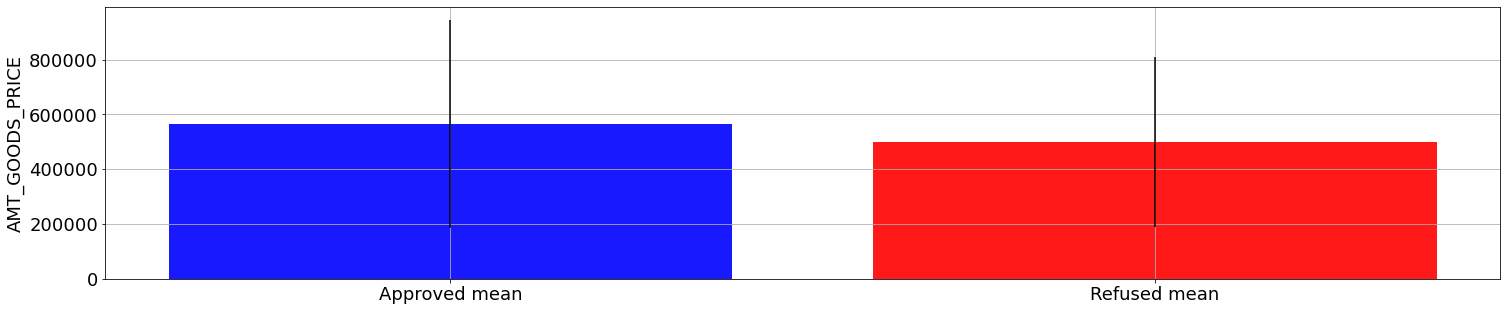

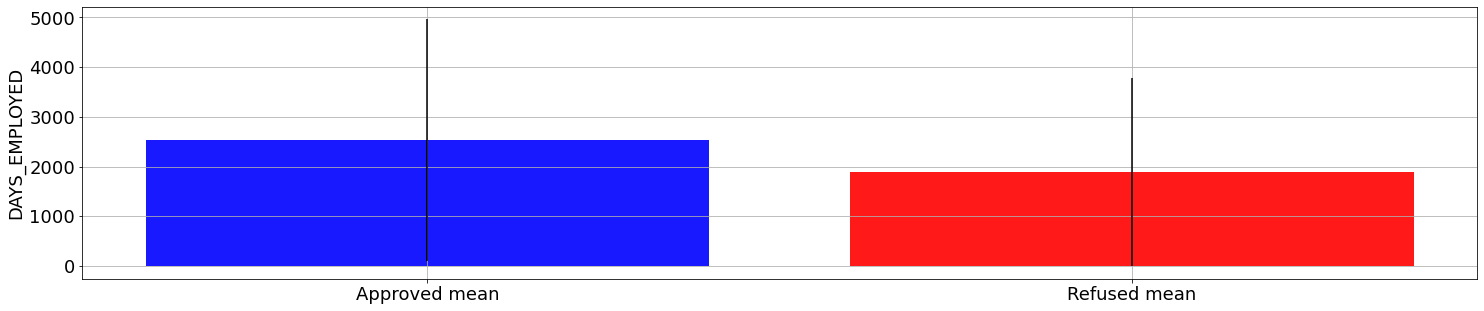

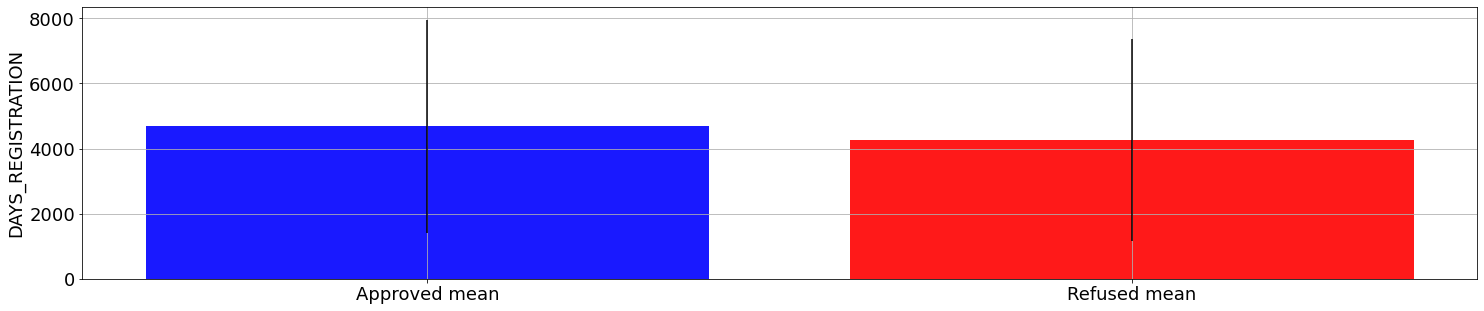

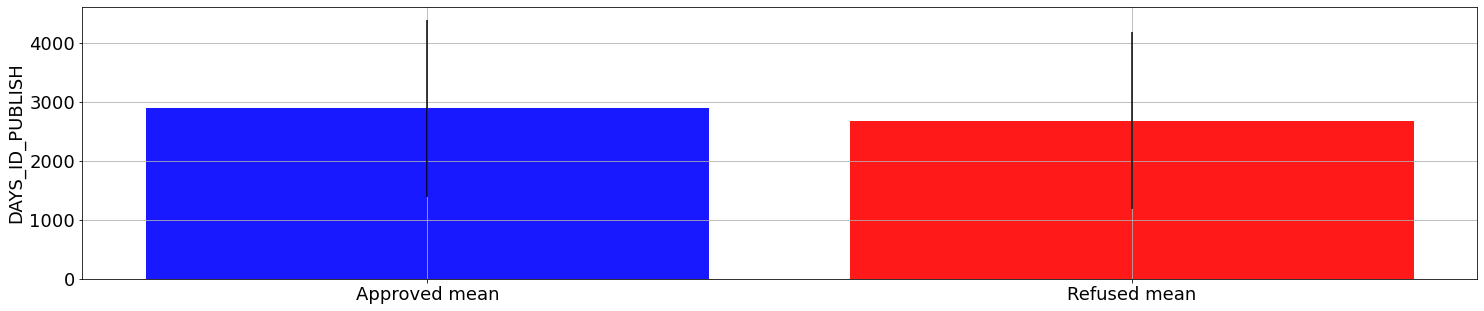

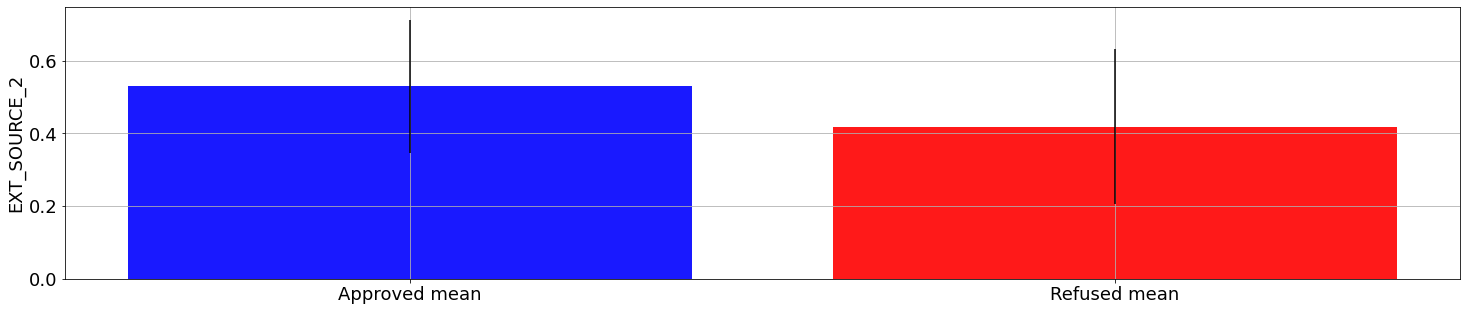

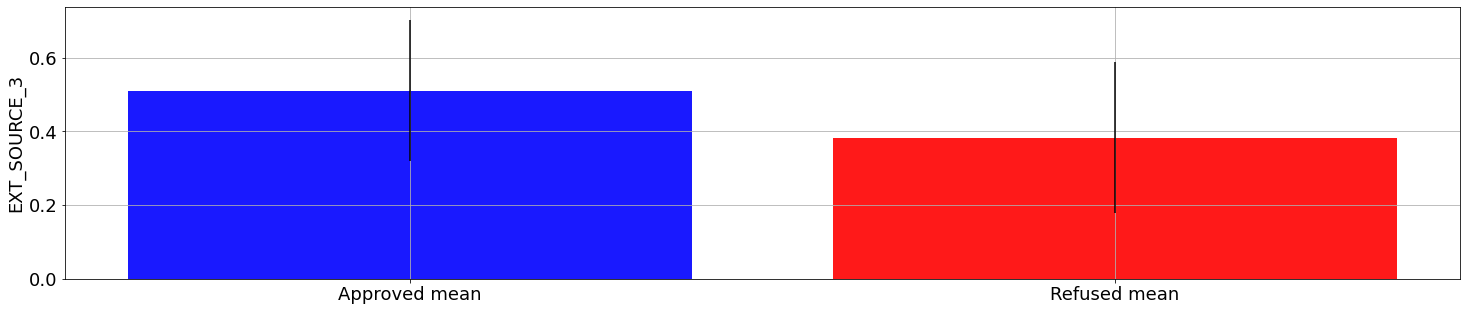

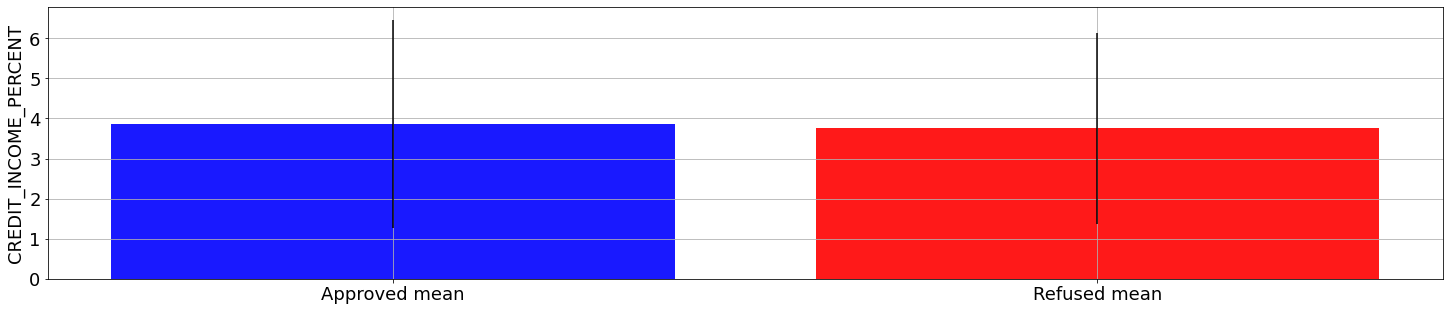

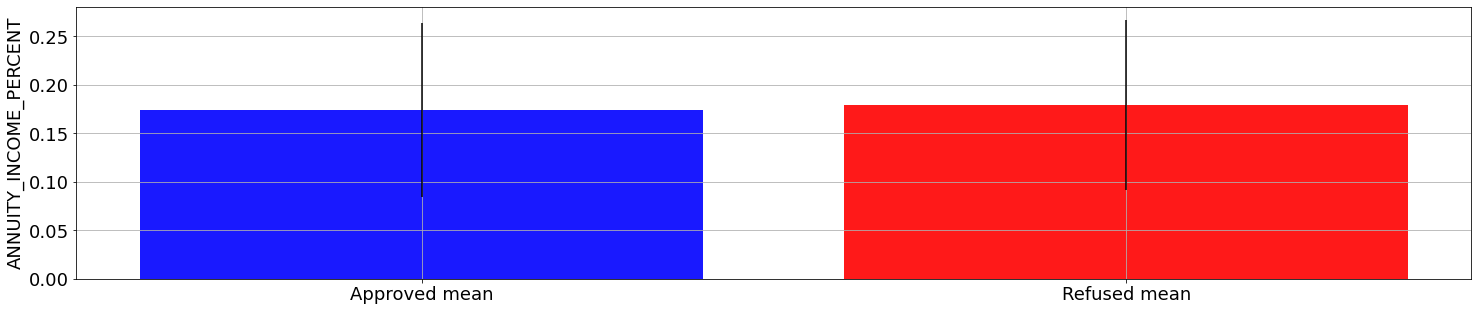

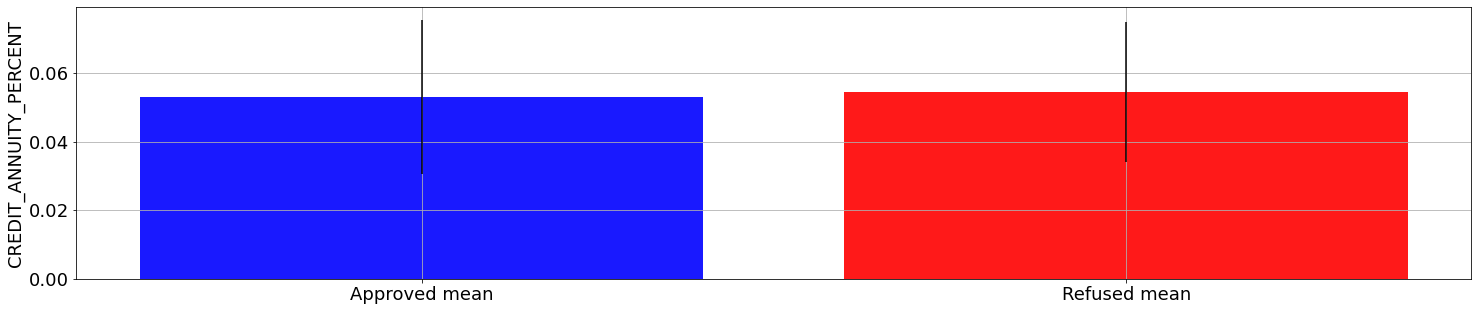

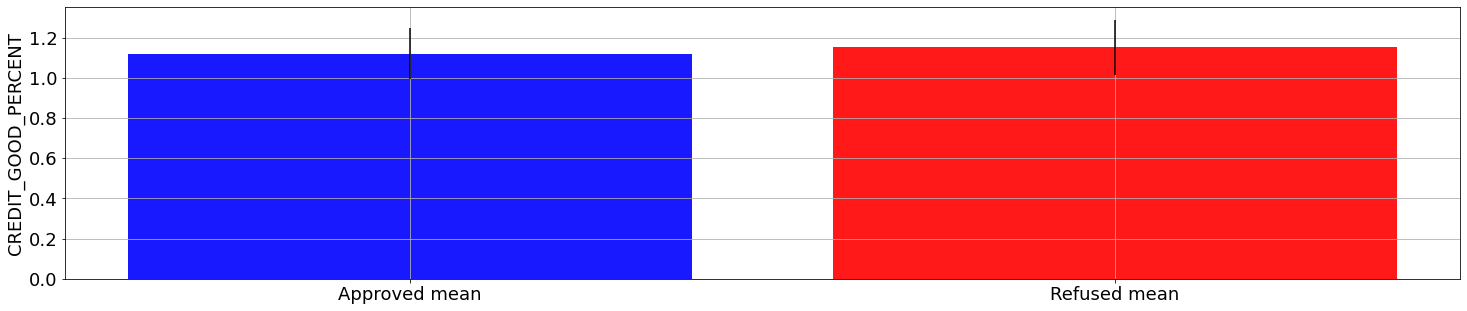

In [157]:
for column in X_train0_describe.columns:

    # 2 columns for figure
    fig, ax = plt.subplots(ncols= 1, figsize=(25,5),facecolor='w')
    
    plt.rcParams["font.size"] = 18

    
    
    # Grid
    ax.grid(True)

    ax.set_ylabel(str(column))

    # Plotting means and stud with yerr
    x0 = 'Approved mean'
    x1 = 'Refused mean'

    ax.bar([x0, x1] ,[X_train0_describe[column]['mean'],X_train1_describe[column]['mean']], 
            yerr = [X_train0_describe[column]['std'],X_train1_describe[column]['std']], color = ['blue', 'red'], alpha = 0.9)
    fig.show()

In [158]:
# Dropping SK_ID_CURR
X_train.drop(['SK_ID_CURR'], axis = 1, inplace = True)
reduced_X_test.drop(['SK_ID_CURR'], axis = 1, inplace = True)

In [159]:
X_train.to_csv('/Users/vanes/OneDrive/Documents/Python Scripts/X_train_credit.csv')

In [160]:
reduced_X_test.to_csv('/Users/vanes/OneDrive/Documents/Python Scripts/X_test_credit.csv')